In [167]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv("/bdata/usrdata/zjx/monitor_test/selforacle_rebuild/tcp_tp_fn_bev.csv")

# 统计 aggregation_method 为 'max' 的数量
max_count = (df["aggregation_method"] == "max").sum()

# 统计 aggregation_method 为 'max' 且 false_negative_windows 为 1 的数量
filtered_count = ((df["aggregation_method"] == "max") & (df["false_negative_windows"] == 1)).sum()

print("aggregation_method 为 'max' 的总数:", max_count)
print("aggregation_method 为 'max' 且 false_negative_windows 为 1 的数量:", filtered_count)
print("FN is", filtered_count/max_count)

aggregation_method 为 'max' 的总数: 90
aggregation_method 为 'max' 且 false_negative_windows 为 1 的数量: 48
FN is 0.5333333333333333


In [5]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv("/bdata/usrdata/zjx/monitor_test/selforacle_rebuild/tcp_tp_fn_bev_no_limitation_attack_1.csv")

# 统计 aggregation_method 为 'max' 的数量
max_count = (df["aggregation_method"] == "max").sum()

# 统计 aggregation_method 为 'max' 且 false_negative_windows 为 1 的数量
filtered_count = ((df["aggregation_method"] == "max") & (df["false_negative_windows"] == 1) ).sum()

print("aggregation_method 为 'max' 的总数:", max_count)
print("aggregation_method 为 'max' 且 false_negative_windows 为 1 的数量:", filtered_count)
print("FN is", filtered_count/max_count)


aggregation_method 为 'max' 的总数: 192
aggregation_method 为 'max' 且 false_negative_windows 为 1 的数量: 103
FN is 0.5364583333333334


In [6]:
def get_next_velocity(v0, a, t):
    """
    计算下一时刻的速度
    :param v0: 当前速度 (m/s)
    :param a: 加速度 (m/s^2)
    :param t: 时间间隔 (s)
    :return: 下一时刻的速度 (m/s)
    """
    return v0 + a * t
# 示例：当前速度 10 m/s，加速度 2 m/s²，时间间隔 1 秒
v0 = 0.23464198410511017  # m/s
a = 0.3575206995010376  #
speed = get_next_velocity(v0, a, 0.1)
print(speed)

0.27039405405521394


In [7]:
def compute_longitudinal_safe_distance(speed, reaction_time=0.001, friction=0.5, gravity=9.81, vehicle_length = 4.8):
    """
    计算纵向安全包络（前后安全距离）
    
    参数:
        speed (float): 车辆当前速度 (m/s)
        reaction_time (float): 反应时间 (s)
        friction (float): 路面摩擦系数
        gravity (float): 重力加速度 (m/s^2)
        
    返回:
        safe_distance (float): 纵向安全包络距离 (m)
    """
    braking_distance = (speed ** 2) / (2 * friction * gravity)
    reaction_distance = speed * reaction_time
    safe_distance = braking_distance + reaction_distance + vehicle_length
    return safe_distance

# 计算横向安全包络
def compute_lateral_safe_distance(speed, vehicle_width=2.16, turn_radius=3.68):
    """
    计算横向安全包络（侧向安全距离）
    
    参数:
        vehicle_width (float): 车辆宽度 (m)
        speed (float): 车辆当前速度 (m/s)
        turn_radius (float): 车辆的最小转弯半径 (m)
        
    返回:
        lateral_safe_distance (float): 横向安全包络距离 (m)
    """
    lateral_offset = (speed ** 2) / (2 * turn_radius)  # 侧向偏移量
    return vehicle_width + 2 * lateral_offset

In [8]:
import os
import json

# 指定目标文件夹
record_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep0_Town06_FreeRide_1_None_03_11_20_09_50/record"
Key_frame = []
# 获取所有 JSON 文件，并按文件名排序
json_files = sorted([f for f in os.listdir(record_dir) if f.endswith(".json")])

# 逐个读取并解析 JSON 文件
for json_file in json_files:
    file_path = os.path.join(record_dir, json_file)
    try:
        with open(file_path, "r") as f:
            data = json.load(f)
            # print(f"文件: {json_file}\n数据: {json.dumps(data, indent=4)}\n")
    except Exception as e:
        print(f"读取 {json_file} 失败: {e}")
    
    npc1_lateral_distance = data["npc1"]["lateral_distance"]
    npc1_longitudinal_distance = data["npc1"]["longitudinal_distance"]
    npc2_lateral_distance = data["npc2"]["lateral_distance"]
    npc2_longitudinal_distance = data["npc2"]["longitudinal_distance"]
    ego_speed = data["ego_vehicle"]["speed"]
    longitudinal_safe_distance = compute_longitudinal_safe_distance(ego_speed)
    lateral_safe_distance = compute_lateral_safe_distance(ego_speed)
    print(lateral_safe_distance, longitudinal_safe_distance)
    if longitudinal_safe_distance > npc1_longitudinal_distance or longitudinal_safe_distance > npc2_longitudinal_distance or lateral_safe_distance > npc1_lateral_distance or lateral_safe_distance > npc2_lateral_distance:
        Key_frame.append(json_file)

print(Key_frame)
print(len(Key_frame))


FileNotFoundError: [Errno 2] No such file or directory: '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep0_Town06_FreeRide_1_None_03_11_20_09_50/record'

In [ ]:
import os
import json

# 指定目标文件夹
record_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep0_Town06_FreeRide_1_None_03_11_20_09_50/record"

# 获取所有 JSON 文件，并按文件名排序
# json_files = sorted([f for f in os.listdir(record_dir) if f.endswith(".json")])

# 存储 action 变更序列
action_sequence_npc1 = []
last_action_npc1 = None
action_sequence_npc2 = []
last_action_npc2 = None
action_change_frame = set()
# 逐个读取并解析 JSON 文件
for json_file in Key_frame:
    file_path = os.path.join(record_dir, json_file)
    try:
        with open(file_path, "r") as f:
            data = json.load(f)
            current_npc1_action = data["npc1"]["action"]
            # 如果 action 变化了，就记录新的 action
            if current_npc1_action != last_action_npc1:
                action_sequence_npc1.append(current_npc1_action)
                last_action_npc1 = current_npc1_action
                action_change_frame.add(file_path)
            current_npc2_action = data["npc2"]["action"]
            # 如果 action 变化了，就记录新的 action
            if current_npc2_action != last_action_npc2:
                action_sequence_npc2.append(current_npc2_action)
                last_action_npc2 = current_npc2_action
                action_change_frame.add(file_path)
    except Exception as e:
        print(f"读取 {json_file} 失败: {e}")
action_change_frame = sorted(action_change_frame)
# 输出 action 变化序列
print("Action 变化序列:", action_sequence_npc1)
print("Action 变化序列:", action_sequence_npc2)
print("all action 变化序列:", action_change_frame)
print(len(action_change_frame))


Action 变化序列: [0, 2, 0, 2, 3, 0, 1, 0]
Action 变化序列: [1, 3, 2, 0, 3, 2, 0, 1, 2, 3, 0]
all action 变化序列: ['/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep0_Town06_FreeRide_1_None_03_11_20_09_50/record/0000.json', '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep0_Town06_FreeRide_1_None_03_11_20_09_50/record/0037.json', '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep0_Town06_FreeRide_1_None_03_11_20_09_50/record/0059.json', '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep0_Town06_FreeRide_1_None_03_11_20_09_50/record/0061.json', '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep0_Town06_FreeRide_1_None_03_11_20_09_50/record/0108.json', '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773

知识图谱中的关系:
(npc1) -[higher_speed_than]-> (ego_vehicle)
(npc2) -[higher_speed_than]-> (ego_vehicle)


/home/zjx/.conda/envs/b2d_zoo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36710 (\N{CJK UNIFIED IDEOGRAPH-8F66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zjx/.conda/envs/b2d_zoo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36742 (\N{CJK UNIFIED IDEOGRAPH-8F86}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zjx/.conda/envs/b2d_zoo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zjx/.conda/envs/b2d_zoo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zjx/.conda/envs/b2d_zoo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED I

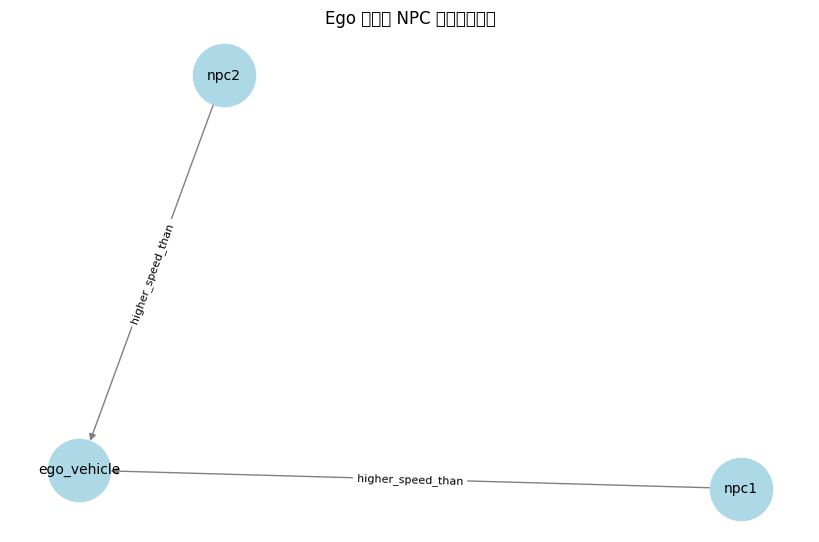

In [ ]:
import networkx as nx

# 定义数据
data = {
    "npc1": {
        "lane": -4,
        "change_lane_number": "right",
        "left_right_lane": 1,
        "lateral_distance": -3.75,
        "longitudinal_distance": 9.99,
        "lane_angle": 0.0,
        "speed": 1.96,
        "action": []
    },
    "npc2": {
        "lane": -7,
        "change_lane_number": "left",
        "left_right_lane": 2,
        "lateral_distance": 6.75,
        "longitudinal_distance": -9.99,
        "lane_angle": 0.0,
        "speed": 1.96,
        "action": []
    },
    "ego_vehicle": {
        "lane": -5,
        "speed": 0.17,
        "acceleration": 0.64
    }
}

# 创建知识图谱
G = nx.DiGraph()

# 添加实体（车辆）
for entity in data.keys():
    G.add_node(entity, type="Vehicle")

# 定义关系提取函数
def extract_relations(npc_name, npc_data, ego_data):
    relations = []
    
    # 位置关系
    if npc_data["longitudinal_distance"] > 0:
        relations.append((npc_name, "is_ahead_of", "ego_vehicle"))
    else:
        relations.append((npc_name, "is_behind", "ego_vehicle"))

    if npc_data["lateral_distance"] > 0:
        relations.append((npc_name, "is_left_of", "ego_vehicle"))
    else:
        relations.append((npc_name, "is_right_of", "ego_vehicle"))

    # 换道行为
    if npc_data["change_lane_number"] == "right":
        relations.append((npc_name, "changing_lane_right", "ego_vehicle"))
    elif npc_data["change_lane_number"] == "left":
        relations.append((npc_name, "changing_lane_left", "ego_vehicle"))

    # 速度比较
    if npc_data["speed"] > ego_data["speed"]:
        relations.append((npc_name, "higher_speed_than", "ego_vehicle"))

    return relations

# 添加关系
for npc_name, npc_data in data.items():
    if npc_name != "ego_vehicle":
        relations = extract_relations(npc_name, npc_data, data["ego_vehicle"])
        for sub, pred, obj in relations:
            G.add_edge(sub, obj, relation=pred)

# 打印图结构
print("知识图谱中的关系:")
for u, v, d in G.edges(data=True):
    print(f"({u}) -[{d['relation']}]-> ({v})")

# 可视化（需要 matplotlib）
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G)
edge_labels = {(u, v): d['relation'] for u, v, d in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Ego 车辆与 NPC 关系知识图谱")
plt.show()


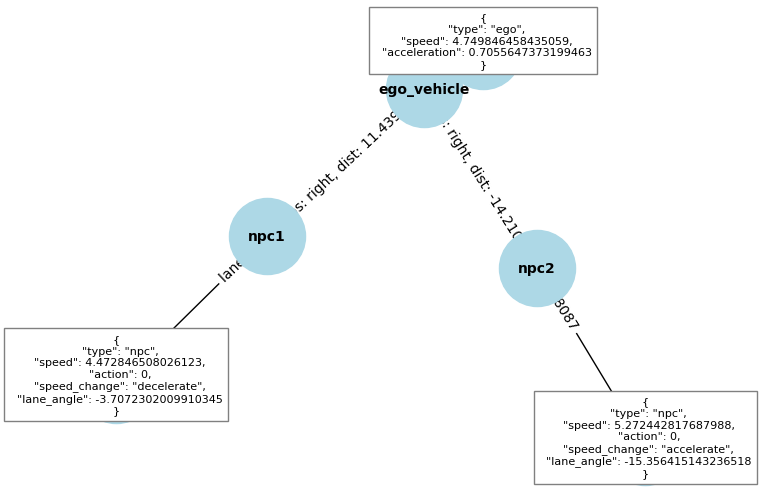

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 原始 JSON 数据
data = {
    "npc1": {
        "lane": -4,
        "change_lane_number": "right",
        "left_right_lane": 1,
        "lateral_distance": -3.5901781967747257,
        "longitudinal_distance": 11.43965650947364,
        "lane_angle": -3.7072302009910345,
        "speed": 4.472846508026123,
        "speed_change": "decelerate",
        "action": 0
    },
    "npc2": {
        "lane": -4,
        "change_lane_number": "right",
        "left_right_lane": 1,
        "lateral_distance": -3.4423834255516534,
        "longitudinal_distance": -14.210900993928087,
        "lane_angle": -15.356415143236518,
        "speed": 5.272442817687988,
        "speed_change": "accelerate",
        "action": 0
    },
    "ego_vehicle": {
        "lane": -5,
        "speed": 4.749846458435059,
        "acceleration": 0.7055647373199463
    }
}

# 提取实体关系图
def extract_relationship_graph(data):
    entities = {
        "npc1": {
            "type": "npc",
            "speed": data["npc1"]["speed"],
            "action": data["npc1"]["action"],
            "speed_change": data["npc1"]["speed_change"],
            "lane_angle": data["npc1"]["lane_angle"]
        },
        "npc2": {
            "type": "npc",
            "speed": data["npc2"]["speed"],
            "action": data["npc2"]["action"],
            "speed_change": data["npc2"]["speed_change"],
            "lane_angle": data["npc2"]["lane_angle"]
        },
        "ego_vehicle": {
            "type": "ego",
            "speed": data["ego_vehicle"]["speed"],
            "acceleration": data["ego_vehicle"]["acceleration"]
        }
    }

    relationships = [
        {
            "from": "npc1",
            "to": "ego_vehicle",
            "lane_difference": abs(data["npc1"]["lane"] - data["ego_vehicle"]["lane"]),
            "relative_position": "right" if data["npc1"]["left_right_lane"] > 0 else "left",
            "lateral_distance": data["npc1"]["lateral_distance"],
            "longitudinal_distance": data["npc1"]["longitudinal_distance"]
        },
        {
            "from": "npc2",
            "to": "ego_vehicle",
            "lane_difference": abs(data["npc2"]["lane"] - data["ego_vehicle"]["lane"]),
            "relative_position": "right" if data["npc2"]["left_right_lane"] > 0 else "left",
            "lateral_distance": data["npc2"]["lateral_distance"],
            "longitudinal_distance": data["npc2"]["longitudinal_distance"]
        }
    ]

    return {"entities": entities, "relationships": relationships}

# 绘制关系图
def draw_graph(graph_data):
    G = nx.DiGraph()

    # 添加节点
    for entity in graph_data["entities"]:
        G.add_node(entity)

    # 添加边和属性
    for rel in graph_data["relationships"]:
        G.add_edge(
            rel["from"], 
            rel["to"], 
            label=f"lane_diff: {rel['lane_difference']}, pos: {rel['relative_position']}, dist: {rel['longitudinal_distance']}"
        )

    # 添加属性节点
    for entity, attributes in graph_data["entities"].items():
        attr_node = f"{entity}_attr"
        G.add_node(attr_node, label=json.dumps(attributes, indent=2))
        G.add_edge(entity, attr_node)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'label')
    node_labels = {node: node if not node.endswith("_attr") else '' for node in G.nodes()}

    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # 显示属性
    attr_labels = {node: data["label"] for node, data in G.nodes(data=True) if node.endswith("_attr")}
    for node, text in attr_labels.items():
        plt.text(
            pos[node][0], pos[node][1] + 0.05, text,
            fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='gray')
        )

    plt.show()

# 生成关系图
relationship_graph = extract_relationship_graph(data)

# 绘图
draw_graph(relationship_graph)


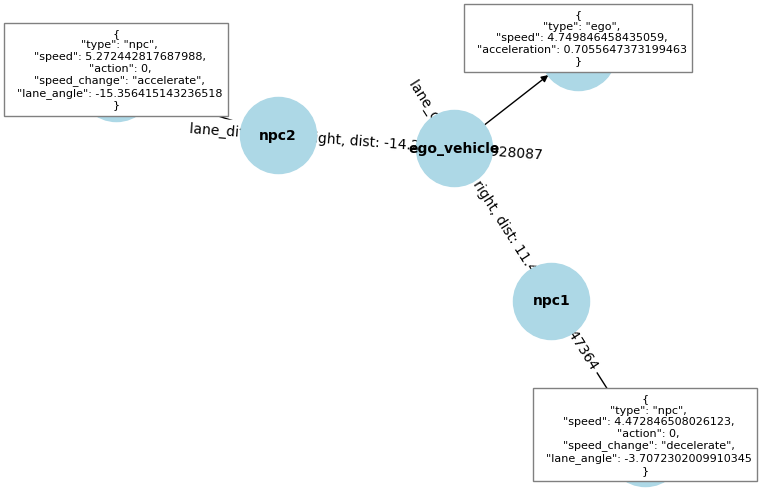

匹配场景: [{'from': 'npc1', 'to': 'ego_vehicle', 'lane_difference': 1, 'relative_position': 'right', 'lateral_distance': -3.5901781967747257, 'longitudinal_distance': 11.43965650947364}, {'from': 'npc2', 'to': 'ego_vehicle', 'lane_difference': 1, 'relative_position': 'right', 'lateral_distance': -3.4423834255516534, 'longitudinal_distance': -14.210900993928087}]


In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 原始 JSON 数据
data = {
    "npc1": {
        "lane": -4,
        "change_lane_number": "right",
        "left_right_lane": 1,
        "lateral_distance": -3.5901781967747257,
        "longitudinal_distance": 11.43965650947364,
        "lane_angle": -3.7072302009910345,
        "speed": 4.472846508026123,
        "speed_change": "decelerate",
        "action": 0
    },
    "npc2": {
        "lane": -4,
        "change_lane_number": "right",
        "left_right_lane": 1,
        "lateral_distance": -3.4423834255516534,
        "longitudinal_distance": -14.210900993928087,
        "lane_angle": -15.356415143236518,
        "speed": 5.272442817687988,
        "speed_change": "accelerate",
        "action": 0
    },
    "ego_vehicle": {
        "lane": -5,
        "speed": 4.749846458435059,
        "acceleration": 0.7055647373199463
    }
}

# 提取实体关系图
def extract_relationship_graph(data):
    entities = {
        "npc1": {
            "type": "npc",
            "speed": data["npc1"]["speed"],
            "action": data["npc1"]["action"],
            "speed_change": data["npc1"]["speed_change"],
            "lane_angle": data["npc1"]["lane_angle"]
        },
        "npc2": {
            "type": "npc",
            "speed": data["npc2"]["speed"],
            "action": data["npc2"]["action"],
            "speed_change": data["npc2"]["speed_change"],
            "lane_angle": data["npc2"]["lane_angle"]
        },
        "ego_vehicle": {
            "type": "ego",
            "speed": data["ego_vehicle"]["speed"],
            "acceleration": data["ego_vehicle"]["acceleration"]
        }
    }

    relationships = [
        {
            "from": "npc1",
            "to": "ego_vehicle",
            "lane_difference": abs(data["npc1"]["lane"] - data["ego_vehicle"]["lane"]),
            "relative_position": "right" if data["npc1"]["left_right_lane"] > 0 else "left",
            "lateral_distance": data["npc1"]["lateral_distance"],
            "longitudinal_distance": data["npc1"]["longitudinal_distance"]
        },
        {
            "from": "npc2",
            "to": "ego_vehicle",
            "lane_difference": abs(data["npc2"]["lane"] - data["ego_vehicle"]["lane"]),
            "relative_position": "right" if data["npc2"]["left_right_lane"] > 0 else "left",
            "lateral_distance": data["npc2"]["lateral_distance"],
            "longitudinal_distance": data["npc2"]["longitudinal_distance"]
        }
    ]

    return {"entities": entities, "relationships": relationships}

# 绘制并保存关系图
def draw_and_save_graph(graph_data, filename="graph.png"):
    G = nx.DiGraph()

    # 添加节点
    for entity in graph_data["entities"]:
        G.add_node(entity)

    # 添加边和属性
    for rel in graph_data["relationships"]:
        G.add_edge(
            rel["from"], 
            rel["to"], 
            label=f"lane_diff: {rel['lane_difference']}, pos: {rel['relative_position']}, dist: {rel['longitudinal_distance']}"
        )

    # 添加属性节点
    for entity, attributes in graph_data["entities"].items():
        attr_node = f"{entity}_attr"
        G.add_node(attr_node, label=json.dumps(attributes, indent=2))
        G.add_edge(entity, attr_node)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'label')
    node_labels = {node: node if not node.endswith("_attr") else '' for node in G.nodes()}

    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # 显示属性
    attr_labels = {node: data["label"] for node, data in G.nodes(data=True) if node.endswith("_attr")}
    for node, text in attr_labels.items():
        plt.text(
            pos[node][0], pos[node][1] + 0.05, text,
            fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='gray')
        )

    plt.savefig(filename)
    plt.show()

# 根据关系查找场景
def find_scenario(graph_data, lane_diff=None, relative_position=None):
    results = []
    for rel in graph_data["relationships"]:
        if (lane_diff is None or rel["lane_difference"] == lane_diff) and \
           (relative_position is None or rel["relative_position"] == relative_position):
            results.append(rel)
    return results

# 生成关系图
relationship_graph = extract_relationship_graph(data)

# 绘图并保存
draw_and_save_graph(relationship_graph, "entity_graph.png")

# 示例：查找与ego相隔1个车道且在右侧的NPC
scenarios = find_scenario(relationship_graph, lane_diff=1, relative_position="right")
print("匹配场景:", scenarios)


In [ ]:
import json

# 示例数据列表
relationship_graphs = [
    {
        "entities": {
            "npc1": {
                "type": "npc",
                "speed": 4.5,
                "action": 0,
                "speed_change": "decelerate",
                "lane_angle": -3.7
            },
            "ego_vehicle": {
                "type": "ego",
                "speed": 4.7,
                "acceleration": 0.7
            }
        },
        "relationships": [
            {
                "from": "npc1",
                "to": "ego_vehicle",
                "lane_difference": 1,
                "relative_position": "right",
                "lateral_distance": -3.5,
                "longitudinal_distance": 11.4
            }
        ]
    },
    {
        "entities": {
            "npc2": {
                "type": "npc",
                "speed": 5.2,
                "action": 0,
                "speed_change": "accelerate",
                "lane_angle": -15.3
            },
            "ego_vehicle": {
                "type": "ego",
                "speed": 4.7,
                "acceleration": 0.7
            }
        },
        "relationships": [
            {
                "from": "npc2",
                "to": "ego_vehicle",
                "lane_difference": 1,
                "relative_position": "right",
                "lateral_distance": -3.4,
                "longitudinal_distance": -14.2
            }
        ]
    }
]

# 根据条件查询函数
def query_relationships(graphs, from_entity=None, to_entity=None, min_distance=None, max_distance=None, relative_position=None):
    results = []
    for graph in graphs:
        for relationship in graph["relationships"]:
            if from_entity and relationship["from"] != from_entity:
                continue
            if to_entity and relationship["to"] != to_entity:
                continue
            if min_distance and relationship["longitudinal_distance"] < min_distance:
                continue
            if max_distance and relationship["longitudinal_distance"] > max_distance:
                continue
            if relative_position and relationship["relative_position"] != relative_position:
                continue
            results.append(relationship)
    return results

# 示例查询：查找在右侧且纵向距离大于 0 的关系
results = query_relationships(relationship_graphs, relative_position="right", min_distance=0)

# 打印结果
print(json.dumps(results, indent=4))


[
    {
        "from": "npc1",
        "to": "ego_vehicle",
        "lane_difference": 1,
        "relative_position": "right",
        "lateral_distance": -3.5,
        "longitudinal_distance": 11.4
    },
    {
        "from": "npc2",
        "to": "ego_vehicle",
        "lane_difference": 1,
        "relative_position": "right",
        "lateral_distance": -3.4,
        "longitudinal_distance": -14.2
    }
]


In [ ]:
import json

# 原始 JSON 数据
data = {
    "npc1": {
        "lane": -4,
        "change_lane_number": "right",
        "left_right_lane": 1,
        "lateral_distance": -3.5901781967747257,
        "longitudinal_distance": 11.43965650947364,
        "lane_angle": -3.7072302009910345,
        "speed": 4.472846508026123,
        "speed_change": "decelerate",
        "action": 0
    },
    "npc2": {
        "lane": -4,
        "change_lane_number": "right",
        "left_right_lane": 1,
        "lateral_distance": -3.4423834255516534,
        "longitudinal_distance": -14.210900993928087,
        "lane_angle": -15.356415143236518,
        "speed": 5.272442817687988,
        "speed_change": "accelerate",
        "action": 0
    },
    "ego_vehicle": {
        "lane": -5,
        "speed": 4.749846458435059,
        "acceleration": 0.7055647373199463
    }
}

# 提取关系图
def extract_relationship_graph(data):
    entities = {
        entity: {
            "type": "npc" if entity != "ego_vehicle" else "ego",
            "speed": data[entity]["speed"],
            "action": data[entity].get("action", None),
            "speed_change": data[entity].get("speed_change", None),
            "lane_angle": data[entity].get("lane_angle", None)
        } for entity in data
    }

    relationships = [
        {
            "from": entity,
            "to": "ego_vehicle",
            "lane_difference": abs(data[entity]["lane"] - data["ego_vehicle"]["lane"]),
            "relative_position": "right" if data[entity]["left_right_lane"] > 0 else "left",
            "lateral_distance": data[entity]["lateral_distance"],
            "longitudinal_distance": data[entity]["longitudinal_distance"]
        }
        for entity in data if entity != "ego_vehicle"
    ]

    return {"entities": entities, "relationships": relationships}

# 存储关系图
relationship_graph = extract_relationship_graph(data)
print(relationship_graph)
# 建立从关系图反推 JSON 数据的函数
def reconstruct_json(graph):
    reconstructed_data = {}
    for entity, attributes in graph["entities"].items():
        reconstructed_data[entity] = {
            "speed": attributes["speed"],
            "action": attributes["action"],
            "speed_change": attributes["speed_change"],
            "lane_angle": attributes["lane_angle"]
        }

    for relationship in graph["relationships"]:
        entity = relationship["from"]
        if entity not in reconstructed_data:
            continue
        reconstructed_data[entity].update({
            "lane": -5 + (-1) * relationship["lane_difference"],
            "left_right_lane": 1 if relationship["relative_position"] == "right" else -1,
            "lateral_distance": relationship["lateral_distance"],
            "longitudinal_distance": relationship["longitudinal_distance"]
        })

    reconstructed_data["ego_vehicle"] = data["ego_vehicle"]

    return reconstructed_data

# 反推原始 JSON
reconstructed_data = reconstruct_json(relationship_graph)

# 打印结果
print(json.dumps(reconstructed_data, indent=4))


{'entities': {'npc1': {'type': 'npc', 'speed': 4.472846508026123, 'action': 0, 'speed_change': 'decelerate', 'lane_angle': -3.7072302009910345}, 'npc2': {'type': 'npc', 'speed': 5.272442817687988, 'action': 0, 'speed_change': 'accelerate', 'lane_angle': -15.356415143236518}, 'ego_vehicle': {'type': 'ego', 'speed': 4.749846458435059, 'action': None, 'speed_change': None, 'lane_angle': None}}, 'relationships': [{'from': 'npc1', 'to': 'ego_vehicle', 'lane_difference': 1, 'relative_position': 'right', 'lateral_distance': -3.5901781967747257, 'longitudinal_distance': 11.43965650947364}, {'from': 'npc2', 'to': 'ego_vehicle', 'lane_difference': 1, 'relative_position': 'right', 'lateral_distance': -3.4423834255516534, 'longitudinal_distance': -14.210900993928087}]}
{
    "npc1": {
        "speed": 4.472846508026123,
        "action": 0,
        "speed_change": "decelerate",
        "lane_angle": -3.7072302009910345,
        "lane": -6,
        "left_right_lane": 1,
        "lateral_distance": 

In [ ]:
import json

# 示例 JSON 文件列表
json_files = [
    {
        "npc1": {
            "lane": -4,
            "change_lane_number": "right",
            "left_right_lane": 1,
            "lateral_distance": -3.5,
            "longitudinal_distance": 11.4,
            "lane_angle": -3.7,
            "speed": 4.5,
            "speed_change": "decelerate",
            "action": 0
        },
        "ego_vehicle": {
            "lane": -5,
            "speed": 4.7,
            "acceleration": 0.7
        }
    },
    {
        "npc2": {
            "lane": -4,
            "change_lane_number": "right",
            "left_right_lane": 1,
            "lateral_distance": -3.4,
            "longitudinal_distance": -14.2,
            "lane_angle": -15.3,
            "speed": 5.2,
            "speed_change": "accelerate",
            "action": 0
        },
        "ego_vehicle": {
            "lane": -5,
            "speed": 4.7,
            "acceleration": 0.7
        }
    }
]

# 提取关系图的函数
def extract_relationship_graph(data):
    relationships = []
    for entity, attributes in data.items():
        if entity != "ego_vehicle":
            relationships.append({
                "from": entity,
                "to": "ego_vehicle",
                "lane_difference": abs(attributes["lane"] - data["ego_vehicle"]["lane"]),
                "relative_position": "right" if attributes["left_right_lane"] > 0 else "left",
                "lateral_distance": attributes["lateral_distance"],
                "longitudinal_distance": attributes["longitudinal_distance"]
            })
    return relationships

# 生成所有关系图
relationship_graphs = [extract_relationship_graph(data) for data in json_files]

# 根据关系图查询对应的 JSON 文件
def find_json_by_relationship(graphs, json_files, from_entity=None, to_entity=None, min_distance=None, max_distance=None):
    results = []
    for i, graph in enumerate(graphs):
        for relationship in graph:
            if from_entity and relationship["from"] != from_entity:
                continue
            if to_entity and relationship["to"] != to_entity:
                continue
            if min_distance and relationship["longitudinal_distance"] < min_distance:
                continue
            if max_distance and relationship["longitudinal_distance"] > max_distance:
                continue
            results.append(json_files[i])
            break
    return results

# 示例查询：查找 npc1 到 ego_vehicle 的关系
matching_json = find_json_by_relationship(relationship_graphs, json_files, from_entity="npc1")

# 打印结果
print(json.dumps(matching_json, indent=4))


[
    {
        "npc1": {
            "lane": -4,
            "change_lane_number": "right",
            "left_right_lane": 1,
            "lateral_distance": -3.5,
            "longitudinal_distance": 11.4,
            "lane_angle": -3.7,
            "speed": 4.5,
            "speed_change": "decelerate",
            "action": 0
        },
        "ego_vehicle": {
            "lane": -5,
            "speed": 4.7,
            "acceleration": 0.7
        }
    }
]


In [ ]:
from openai import OpenAI

# 初始化客户端
client = OpenAI(
    base_url="https://yunwu.ai/v1",
    api_key='sk-Ko0JaD1xNhI3xJI7gCwUYdRTuCcoDnlJOUdZxS9vJxo33X9O',
    timeout=120
)

# 创建聊天完成
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"},
    {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
    {"role": "user", "content": "Where was it played?"}
  ]
)
print(response)

ChatCompletion(id='chatcmpl-BBFoKkxIzxpHzqyRMEO7bQr5rZ2EV', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The 2020 World Series was played at Globe Life Field in Arlington, Texas. This was the first time the World Series was held at a neutral site due to the COVID-19 pandemic.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1742022084, model='gpt-3.5-turbo-0125', object='chat.completion', service_tier=None, system_fingerprint='fp_ded0d14823', usage=CompletionUsage(completion_tokens=39, prompt_tokens=53, total_tokens=92, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))


In [ ]:

from pydantic import BaseModel
from typing import List
class Step(BaseModel):
    explanation: str
    output: str

class MathReasoning(BaseModel):
    steps: List[Step]
    final_answer: str
 
completion = client.beta.chat.completions.parse(
    model="gpt-4o-2024-08-06",
    messages=[
        {"role": "system", "content": "You are a helpful math tutor. Guide the user through the solution step by step."},
        {"role": "user", "content": "how can I solve 8x + 7 = -23"}
    ],
    response_format=MathReasoning,
)
 
math_reasoning = completion.choices[0].message.parsed
print(math_reasoning)

steps=[Step(explanation='Start by isolating the term with the variable. We have the equation $8x + 7 = -23$. We can move the constant (7) to the other side of the equation by subtracting 7 from both sides.', output='8x + 7 - 7 = -23 - 7'), Step(explanation='After subtracting 7 from both sides, the equation simplifies to $8x = -30$.', output='8x = -30'), Step(explanation='Now that we have isolated the term with the variable, we need to solve for $x$ by dividing both sides by the coefficient of $x$, which is 8.', output='x = \\frac{-30}{8}'), Step(explanation='Simplify the fraction $\\frac{-30}{8}$ by finding the greatest common divisor, which is 2. Divide both the numerator and the denominator by 2.', output='x = \\frac{-15}{4}'), Step(explanation='Convert the fraction $\\frac{-15}{4}$ to decimal form. Since 15 divided by 4 is 3.75, the value of $x$ is -3.75.', output='x = -3.75')] final_answer='x = -15/2'


In [ ]:
def generate_prompt(data):
    prompt = f"""
### 场景描述：
在高速公路驾驶场景中，Ego车和两辆NPC车辆的动态数据如下：

- NPC1: 从车道 {data['npc1']['start_lane']} 到 {data['npc1']['current_lane']}，目标速度 {data['npc1']['target_speed']} m/s，当前速度 {data['npc1']['speed']} m/s，{data['npc1']['speed_change']}，横向距离 {data['npc1']['lateral_distance']} m，纵向距离 {data['npc1']['longitudinal_distance']} m。
- NPC2: 从车道 {data['npc2']['start_lane']} 到 {data['npc2']['current_lane']}，目标速度 {data['npc2']['target_speed']} m/s，当前速度 {data['npc2']['speed']} m/s，{data['npc2']['speed_change']}，横向距离 {data['npc2']['lateral_distance']} m，纵向距离 {data['npc2']['longitudinal_distance']} m。
- Ego车：当前车道 {data['ego_vehicle']['lane']}，速度 {data['ego_vehicle']['speed']} m/s，加速度 {data['ego_vehicle']['acceleration']} m/s²。

### 任务：
1. 是否存在潜在的碰撞风险？
2. NPC1 和 NPC2 的车道变换意图？
3. Ego车应如何进行速度与车道策略调整？
"""
    return prompt


In [ ]:
def generate_prompt(data):
    #确当npc的数量
    当前场景下npci,位于车道data[npci][current_lane], if data[npci][action] == 0, 则左转，初始车道为data[npci][start_lane],if data[npci][action] == 1,则右转，初始车道为data[npci][start_lane],if data[npci][action] == 2,则直行，当前车道为初始车道为data[npci][current_lane],if data[npci][action] == 3,则刹车，当前车道为data[npci][current_lane],
目标速度 {data['npci']['target_speed']} m/s，当前速度 {data['npci']['speed']} m/s，与车道的夹角为data[npci][lane_angle] 横向距离ego为 {data['npci']['lateral_distance']} m，纵向距离ego为 {data['npci']['longitudinal_distance']} m， 目前npci在ego的 if data['npci']['lateral_distance']}>0，右边（data[npci][current_lane]-data[ego][lane]）车道 else 左边（data[ego][lane] - data[npci][current_lane]）车道。if data['npci']['longitudinal_distance'] > 0 前方 else 后方。

In [ ]:
import json

# 示例 JSON 数据
data = {
    "npc1": {
        "start_lane": -7,
        "current_lane": -7,
        "change_lane_number": 2,
        "left_right_lane": "left",
        "lateral_distance": 6.97328508451397,
        "longitudinal_distance": 16.310120962929734,
        "lane_angle": -0.004314973019063473,
        "speed": 4.515100479125977,
        "target_speed": 4.444444444444445,
        "speed_change": "decelerate",
        "action": 1
    },
    "npc2": {
        "start_lane": -7,
        "current_lane": -7,
        "change_lane_number": 2,
        "left_right_lane": "left",
        "lateral_distance": 5.3089730939626625,
        "longitudinal_distance": -5.8869903763339515,
        "lane_angle": -20.404639592394233,
        "speed": 5.051916122436523,
        "target_speed": 5.277777777777778,
        "speed_change": "accelerate",
        "action": 0
    },
    "ego_vehicle": {
        "lane": -5,
        "speed": 4.973539352416992,
        "acceleration": 1.237223505973816
    }
}

def format_float(value):
    return f"{value:.2f}"

def generate_npc_prompt(npc_key, npc_data, ego_data):
    action_mapping = {
        0: "左变道",
        1: "右变道",
        2: "直行",
        3: "刹车"
    }

    action_text = action_mapping.get(npc_data["action"], "未知动作")
    relative_side = "右边" if npc_data["lateral_distance"] > 0 else "左边"
    front_back = "前方" if npc_data["longitudinal_distance"] > 0 else "后方"

    if npc_data["action"] in [2, 3]:
        prompt = (
            f"{npc_key}位于车道 {npc_data['current_lane']}, 正在{action_text}, "
            f"目标速度 {format_float(npc_data['target_speed'])} m/s, 当前速度 {format_float(npc_data['speed'])} m/s, "
            f"与车道的夹角为 {format_float(npc_data['lane_angle'])}, 横向距离ego为 {format_float(npc_data['lateral_distance'])} m, "
            f"纵向距离ego为 {format_float(npc_data['longitudinal_distance'])} m, "
            f"目前{npc_key}在ego的 {relative_side} {(abs(npc_data['current_lane'] - ego_data['lane']))} 车道, {front_back}。"
        )
    else:
        prompt = (
            f"{npc_key}位于车道 {npc_data['current_lane']}, {action_text}, 初始车道为 {npc_data['start_lane']}, "
            f"目标速度 {format_float(npc_data['target_speed'])} m/s, 当前速度 {format_float(npc_data['speed'])} m/s, "
            f"与车道的夹角为 {format_float(npc_data['lane_angle'])}, 横向距离ego为 {format_float(npc_data['lateral_distance'])} m, "
            f"纵向距离ego为 {format_float(npc_data['longitudinal_distance'])} m, "
            f"目前{npc_key}在ego的 {relative_side} {(abs(npc_data['current_lane'] - ego_data['lane']))} 车道, {front_back}。"
        )
    return prompt

def generate_ego_prompt(ego_data):
    prompt = (f"ego位于车道{ego_data['lane']},当前的速度为{format_float(ego_data['speed'])}m/s,当前的加速度为{format_float(ego_data['acceleration'])},目前正在直行")
    return prompt

# 遍历 NPC 并生成 prompt
for npc_key, npc_data in data.items():
    if npc_key != "ego_vehicle":
        prompt = generate_npc_prompt(npc_key, npc_data, data["ego_vehicle"])
        print(prompt)
    else:
        prompt = generate_ego_prompt(data["ego_vehicle"])
        print(prompt)

prompt_start = (f"当前图片中，车道从左到右，分别为-3到-7,其中ego车辆位于图片中间的位置")
prompt_end = (f"请你结合图片和描述，确定场景中的各个车辆，判断当前当前场景中的npc车辆的行为在行为结束前，行为持续的最大行驶距离为30m，是否可能会导致碰撞，如果有可能导致碰撞，哪个npc最有可能，并且ego该如何进行速度和车道的调整")

当前场景下npc1, 位于车道 -7, 右变道, 初始车道为 -7, 目标速度 4.44 m/s, 当前速度 4.52 m/s, 与车道的夹角为 -0.00, 横向距离ego为 6.97 m, 纵向距离ego为 16.31 m, 目前npc1在ego的 右边 2 车道, 前方。
当前场景下npc2, 位于车道 -7, 左变道, 初始车道为 -7, 目标速度 5.28 m/s, 当前速度 5.05 m/s, 与车道的夹角为 -20.40, 横向距离ego为 5.31 m, 纵向距离ego为 -5.89 m, 目前npc2在ego的 右边 2 车道, 后方。
当前场景下ego,位于车道-5,当前的速度为4.97m/s,当前的加速度为1.24,目前正在直行


In [ ]:
def format_float(value):
    return f"{value:.2f}"

def generate_npc_prompt(npc_key, npc_data, ego_data):
    action_mapping = {
        0: "左变道",
        1: "右变道",
        2: "直行",
        3: "刹车"
    }

    action_text = action_mapping.get(npc_data["action"], "未知动作")
    relative_side = "右边" if npc_data["lateral_distance"] > 0 else "左边"
    front_back = "前方" if npc_data["longitudinal_distance"] > 0 else "后方"

    # 优化后的prompt生成，减少重复信息
    prompt = f"{npc_key}位于车道{npc_data['current_lane']}, {action_text}, 目标速度{format_float(npc_data['target_speed'])} m/s, 当前速度{format_float(npc_data['speed'])} m/s, "
    prompt += f"与车道夹角{format_float(npc_data['lane_angle'])}, 横向距离ego {format_float(npc_data['lateral_distance'])} m, 纵向距离ego {format_float(npc_data['longitudinal_distance'])} m, "
    prompt += f"{npc_key}在ego的{relative_side} {(abs(npc_data['current_lane'] - ego_data['lane']))}车道, {front_back}。" 
    
    # 如果是左变道或右变道，保留初始车道
    if npc_data["action"] not in [2, 3]:
        prompt = prompt.replace(f"目标速度{format_float(npc_data['target_speed'])}", f"初始车道{npc_data['start_lane']}, 目标速度{format_float(npc_data['target_speed'])}")
    
    return prompt

def generate_ego_prompt(ego_data):
    return f"ego位于车道{ego_data['lane']}, 当前速度{format_float(ego_data['speed'])} m/s, 当前加速度{format_float(ego_data['acceleration'])} m/s², 正在直行。"

prompts = []
# 遍历 NPC 并生成 prompt
for npc_key, npc_data in data.items():
    if npc_key != "ego_vehicle":
        prompt = generate_npc_prompt(npc_key, npc_data, data["ego_vehicle"])
        prompts.append(prompt)
        print(prompt)
    else:
        prompt = generate_ego_prompt(data["ego_vehicle"])
        prompts.append(prompt)
        print(prompt)

# 合并开始和结束的描述
prompt_start = "车道从-3到-7，ego车位于图片中间位置"
prompt_end = ("请结合图片和描述判断，是否可能导致碰撞，"
              "行为结束前30m内哪个npc最可能，ego如何调整行为与npc避免碰撞")
final_prompt = f"{prompt_start} " + " ".join(prompts) + f" {prompt_end}"
# final_prompt = f"{prompt_start} " + " ".join(prompts)
print(final_prompt)


npc1位于车道-7, 右变道, 初始车道-7, 目标速度4.44 m/s, 当前速度4.52 m/s, 与车道夹角-0.00, 横向距离ego 6.97 m, 纵向距离ego 16.31 m, npc1在ego的右边 2车道, 前方。
npc2位于车道-7, 左变道, 初始车道-7, 目标速度5.28 m/s, 当前速度5.05 m/s, 与车道夹角-20.40, 横向距离ego 5.31 m, 纵向距离ego -5.89 m, npc2在ego的右边 2车道, 后方。
ego位于车道-5, 当前速度4.97 m/s, 当前加速度1.24 m/s², 正在直行。
车道从-3到-7，ego车位于图片中间位置 npc1位于车道-7, 右变道, 初始车道-7, 目标速度4.44 m/s, 当前速度4.52 m/s, 与车道夹角-0.00, 横向距离ego 6.97 m, 纵向距离ego 16.31 m, npc1在ego的右边 2车道, 前方。 npc2位于车道-7, 左变道, 初始车道-7, 目标速度5.28 m/s, 当前速度5.05 m/s, 与车道夹角-20.40, 横向距离ego 5.31 m, 纵向距离ego -5.89 m, npc2在ego的右边 2车道, 后方。 ego位于车道-5, 当前速度4.97 m/s, 当前加速度1.24 m/s², 正在直行。


In [ ]:
from openai import OpenAI

# 初始化客户端
client = OpenAI(
    base_url="https://yunwu.ai/v1",
    api_key='sk-Ko0JaD1xNhI3xJI7gCwUYdRTuCcoDnlJOUdZxS9vJxo33X9O',
    timeout=120
)

In [ ]:
def get_scene_reason(client, record_paths):
    
    # 初始化 messages
    messages = [
        {"role": "system", "content": "You are an autonomous driving exporter,"},
        {"role": "user", "content": []}  # 确保索引 1 存在
    ]
    
    # 遍历所有图片，分别添加描述
    for file_i in range(len(record_paths)):
        
        # 获取碰撞推理结果
        json_file_name = os.path.basename(record_paths[file_i])  # 获取 '0000.json'
        base_name = os.path.splitext(json_file_name)[0]  # 去掉扩展名，得到 '0000'

        # 获取根目录路径
        root_dir = os.path.dirname(os.path.dirname(record_paths[file_i]))  # 获取到 "RouteScenario_1773_rep0_Town06_FreeRide_2_None_03_15_14_33_21" 目录

        # 构造 BEV 文件路径（与 JSON 文件名对应）
        bev_file_path = os.path.join(root_dir, "bev", f"{base_name}.png")

        img_b64_str = encode_image(bev_file_path)

        messages[1]["content"].append(
            {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{img_b64_str}"}}
        )
    print("消息已保存到 messages.json，可手动检查和调整。")
    completion = client.beta.chat.completions.parse(
        model="gpt-4o",
        messages=messages,
        temperature=0,
        response_format=CollisionPredict
    )

In [ ]:
from pydantic import BaseModel
from enum import Enum
from typing import List
class CorrectionAction(str, Enum):
    LEFT_LANE_CHANGE = "左变道"
    RIGHT_LANE_CHANGE = "右变道"
    ACCELERATE_STRAIGHT = "加速直行"
    DECELERATE_STRAIGHT = "减速直行"

class RepairAction(BaseModel):
    action: CorrectionAction
    speed: float  # 限定速度为浮动值

class CollisionReasoning(BaseModel):
    final_answer: bool  # 是否发生碰撞，True 或 False
    most_likely_collision_vehicle: str  # 如果发生碰撞，提供最有可能发生碰撞的车辆名称
    correction_action: List[RepairAction]  # 提供修正行动和相关速度

completion = client.beta.chat.completions.parse(
    model="gpt-4o-2024-08-06",
    messages=[
        {"role": "system", "content": "You are a helpful collision detection and autonomous driving assistant."},
        {"role": "user", "content": final_prompt},
    ],
    temperature=0,
    response_format=CollisionReasoning,
)

collision_reasoning = completion.choices[0].message.parsed
print(collision_reasoning)

    

final_answer=False most_likely_collision_vehicle='npc2' correction_action=[RepairAction(action=<CorrectionAction.ACCELERATE_STRAIGHT: '加速直行'>, speed=5.56)]


In [ ]:
import os
import shutil

# 根目录路径
root_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj"
# 目标存放文件夹
collision_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/collision_tcp"

# 确保目标文件夹存在
os.makedirs(collision_dir, exist_ok=True)

# 遍历 root_dir 下的所有子文件夹
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    bev_path = os.path.join(folder_path, "bev")

    # 检查是否为目录且包含 bev 文件夹
    if os.path.isdir(folder_path) and os.path.exists(bev_path):
        # 统计 bev 目录下的文件数
        bev_files = [f for f in os.listdir(bev_path) if os.path.isfile(os.path.join(bev_path, f))]
        
        # 如果 bev 文件夹下文件数量大于 400，则移动整个文件夹
        if len(bev_files) < 400:
            target_path = os.path.join(collision_dir, folder)
            print(f"移动文件夹: {folder_path} -> {target_path}")
            shutil.move(folder_path, target_path)

print("文件夹移动完成！")


移动文件夹: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep30_Town06_FreeRide_2_None_03_22_02_24_20 -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/collision_tcp/RouteScenario_1773_rep30_Town06_FreeRide_2_None_03_22_02_24_20
移动文件夹: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep29_Town06_FreeRide_1_None_03_22_01_35_31 -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/collision_tcp/RouteScenario_1773_rep29_Town06_FreeRide_1_None_03_22_01_35_31
移动文件夹: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/RouteScenario_1773_rep30_Town06_FreeRide_4_None_03_22_00_37_06 -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/collision_tcp/RouteScenario_1773_rep30_Town06_FreeRide_4_None_03_22_00_37_06
移动文件夹: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_tr

In [163]:
import glob
import os
def rename_sorted_json_files(base_dir):
    record_dirs = glob.glob(os.path.join(base_dir, "*/record"))
    
    for record_dir in record_dirs:
        json_files = sorted(glob.glob(os.path.join(record_dir, "*.json")))
        
        for idx, json_file in enumerate(json_files):
            new_name = os.path.join(record_dir, f"{idx:04d}.json")
            os.rename(json_file, new_name)
            print(f"Renamed {json_file} -> {new_name}")
base_directory = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3"
rename_sorted_json_files(base_directory)

Renamed /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_28_02_24_24/record/4613.json -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_28_02_24_24/record/0000.json
Renamed /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_28_02_24_24/record/4614.json -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_28_02_24_24/record/0001.json
Renamed /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3/get_route_

In [ ]:
You are an AI model specializing in autonomous driving scene analysis. You will analyze multiple BEV images and multiple textual vehicle descriptions to predict potential collisions. Follow these steps carefully, thinking step by step before making a final decision.

### **Step 1: Multi-Modal Vehicle Identification**  
- Carefully analyze each BEV image and identify all visible vehicles.  
- Match each identified vehicle with the provided textual descriptions based on position, lane, heading direction, and speed.  
- Output a table listing each vehicle, the corresponding image ID, and matched textual attributes.

### **Step 2: Cross-Image Consistency Check**  
- Some vehicles may appear in multiple BEV images.  
- Cross-check these images to ensure that the vehicle states are consistent across different viewpoints.  
- If any inconsistencies exist (e.g., different lane positions in two images), explain possible reasons (e.g., occlusion, camera perspective shifts).

### **Step 3: Predict Vehicle Behavior**  
For each vehicle:  
- Determine its **likely behavior trend** based on:  
  - **Heading direction** (Does it face forward, left, or right?)  
  - **Lane position** (Is it close to a lane boundary, indicating a lane change?)  
  - **Speed** (Is it accelerating, decelerating, or maintaining speed?)  
- Provide reasoning for each prediction.

### **Step 4: Collision Risk Prediction**  
- Use the last observed state (speed, relative position) and predicted behavior trends.  
- Predict the vehicle’s movement in the next **1 second**.  
- Check for potential collisions with the ego vehicle or other NPCs.  
- If a collision is likely, explain why and provide possible avoidance strategies.  

Think carefully about each step, explain your reasoning before making a final judgment, and ensure consistency across multiple images.


In [ ]:
        prompt = f"""Please complete the following tasks step by step:
            1️⃣ **Identify Vehicles and Motion Trends from BEV Images:**:
            - Detect all vehicles in the bev image and track their positions, orientations.
            - Match the same vehicles across multiple frames to ensure consistency in tracking.
            - Analyze lane changes, acceleration, deceleration, and sudden behavior shifts (e.g., abrupt lane changes).

            2️⃣ **Validate Motion Using Text Descriptions:**:
            - Cross-check lane positions, relative distances, and speeds from text with BEV analysis.
            - Identify inconsistencies and detect unexpected behaviors (e.g., last-second lane changes).

            3️⃣ **Evaluate Two Types of Collision Risks**:
            - **Behavior-induced collisions**: Collisions resulting from actions such as lane changes or acceleration.
            - **Externally induced collisions**: Unexpected behaviors from non-autonomous vehicles that the ego vehicle might not be able to avoid.

            4️⃣ **Provide the Final Judgment**:
            - Will a collision occur? (Yes/No)
            - If a collision is likely, **recommend an avoidance strategy for the autonomous vehicle**.
            """

In [ ]:
import json
def load_json_file(file_path):
    """读取 JSON 文件并返回数据"""
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

def filter_collision_data(data, threshold):
    """筛选 collision_probability 大于 threshold 的数据"""
    filtered_data = [item for item in data if item["collision_reasoning"]["collision_scores"] <= threshold]
    return len(filtered_data), filtered_data

# 设定阈值，例如 50
threshold = 3
data = load_json_file("/bdata/usrdata/zjx/monitor_test/selforacle_rebuild/collision_reasonings_output_TP.json")
count, filtered_results = filter_collision_data(data, threshold)

# 打印符合条件的数据数量
print(f"Collision probability > {threshold}: {count} cases")

# 以 JSON 格式打印符合条件的数据
print(json.dumps(filtered_results, indent=4))

Collision probability > 3: 25 cases
[
    {
        "image_paths": [
            "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/collision/RouteScenario_1792_rep10_Town12_HazardAtSideLane_1_None_03_28_20_37_36/record/0133.json",
            "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/collision/RouteScenario_1792_rep10_Town12_HazardAtSideLane_1_None_03_28_20_37_36/record/0138.json",
            "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/collision/RouteScenario_1792_rep10_Town12_HazardAtSideLane_1_None_03_28_20_37_36/record/0143.json",
            "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/collision/RouteScenario_1792_rep10_Town12_HazardAtSideLane_1_None_03_28_20_37_36/record/0148.json"
        ],
        "collision_reasoning": {
            "collision_scores": 2,
            "reason": "npc1 is closing in on the ego vehicle significantly while maintaining low rela

In [ ]:
import os
import json
import shutil

# 设置路径
base_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/collision_tcp"
destination_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/changed_actions"
os.makedirs(destination_dir, exist_ok=True)

# 遍历 collision_tcp 目录，找到所有子目录
sub_dirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# 记录所有 record 目录及其 JSON 文件
record_dirs = []
for sub_dir in sub_dirs:
    record_path = os.path.join(sub_dir, "record")  # record 目录应位于 sub_dir 之下
    if os.path.exists(record_path):
        json_files = sorted(
            [os.path.join(record_path, f) for f in os.listdir(record_path) if f.endswith(".json")],
            key=os.path.getmtime,  # 按时间排序
            reverse=True,  # 从最新的开始
        )
        if json_files:
            record_dirs.append((sub_dir, json_files))  # 记录 sub_dir，而不是 record_path

# 读取 JSON 文件，检查 action 变化
previous_actions = None  # 记录上一组 npc1 和 npc2 的 action
for parent_dir, json_files in record_dirs:
    for json_file in json_files:
        with open(json_file, "r", encoding="utf-8") as f:
            try:
                data = json.load(f)
                npc1_action = data.get("npc1", {}).get("action")
                npc2_action = data.get("npc2", {}).get("action")

                current_actions = (npc1_action, npc2_action)

                if previous_actions and current_actions != previous_actions:
                    # 发现 action 变化，移动父级目录
                    new_location = os.path.join(destination_dir, os.path.basename(parent_dir))
                    shutil.move(parent_dir, new_location)
                    print(f"Moved: {parent_dir} → {new_location}")
                    break  # 只需移动一次，跳出循环

                previous_actions = current_actions  # 更新上一个状态

            except json.JSONDecodeError:
                print(f"Warning: Cannot parse {json_file}")

print("Processing complete.")


In [ ]:
from qdrant_client import QdrantClient, models
client = QdrantClient(host='localhost', port=6333)
if not client.collection_exists("images"):  #creating a Collection
    client.create_collection(
        collection_name="images",
        vectors_config=models.VectorParams(
        size=image_embeddings_size,  # Vector size is defined by model being used for embedding
        distance=models.Distance.COSINE,
    ),
   )

In [ ]:
import uuid
import numpy as np
if len(image_embeddings) > 0:
    # Upload points to Qdrant
    points = []
    points.append(
            models.PointStruct(
                id=int(uuid.uuid4().int % (2**64)),  # 64-bit 唯一整数 ID
                vector=image_embeddings[0],  # 确保是 list 而不是 numpy 数组
                payload={"image_path": f"/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/RouteScenario_1773_rep33_Town06_FreeRide_1_None_02_15_05_25_09/bev/0201.png"}  # 图片路径
            )
        )
    client.upload_points(collection_name="images", points=points)

In [ ]:
search_results = client.query_points(
    collection_name="images",
    query=image_embedding,
    limit=1  # 找到最相似的 5 张图片
)

In [ ]:
print(search_results)

points=[ScoredPoint(id=12787480784802102107, version=0, score=1.0, payload={'image_path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/RouteScenario_1773_rep33_Town06_FreeRide_1_None_02_15_05_25_09/bev/0201.png'}, vector=None, shard_key=None, order_value=None)]


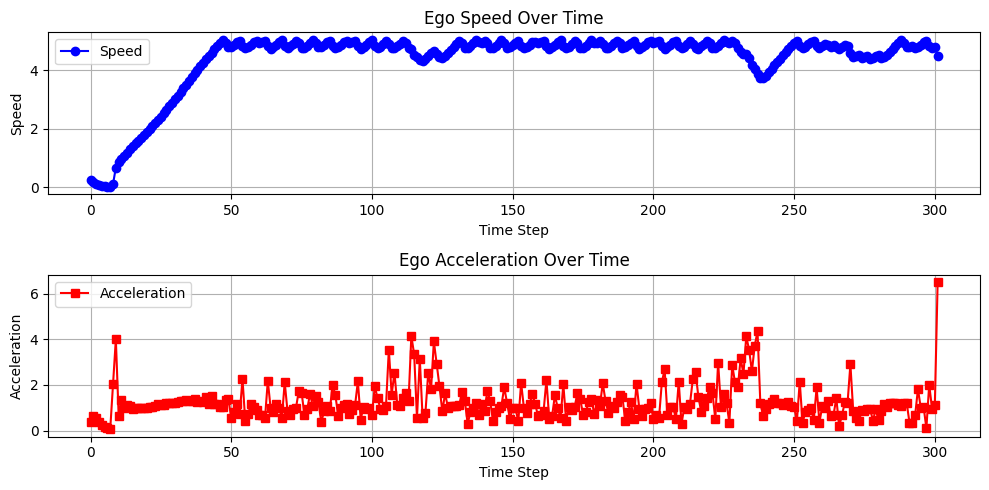

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# 指定 JSON 文件所在的目录
directory = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_tcp_only_traj/collision_tcp/RouteScenario_1773_rep1_Town06_FreeRide_4_None_03_21_17_35_14/record"

# 获取所有 JSON 文件并按文件名排序（保证顺序读取）
json_files = sorted([f for f in os.listdir(directory) if f.endswith(".json")])

# 存储速度和加速度数据
speeds = []
accelerations = []
timestamps = []

# 读取 JSON 文件
for idx, file in enumerate(json_files):
    file_path = os.path.join(directory, file)
    
    with open(file_path, "r") as f:
        data = json.load(f)
        if "ego_vehicle" in data and "speed" in data["ego_vehicle"] and "acceleration" in data["ego_vehicle"]:
            speeds.append(data["ego_vehicle"]["speed"])
            accelerations.append(data["ego_vehicle"]["acceleration"])
            timestamps.append(idx)  # 以文件顺序作为时间轴

# 绘制折线图
plt.figure(figsize=(10, 5))

# 速度折线图
plt.subplot(2, 1, 1)
plt.plot(timestamps, speeds, marker="o", linestyle="-", color="b", label="Speed")
plt.xlabel("Time Step")
plt.ylabel("Speed")
plt.title("Ego Speed Over Time")
plt.legend()
plt.grid(True)

# 加速度折线图
plt.subplot(2, 1, 2)
plt.plot(timestamps, accelerations, marker="s", linestyle="-", color="r", label="Acceleration")
plt.xlabel("Time Step")
plt.ylabel("Acceleration")
plt.title("Ego Acceleration Over Time")
plt.legend()
plt.grid(True)

# 显示图像
plt.tight_layout()
plt.show()


In [ ]:
import os
import json
import matplotlib.pyplot as plt

def plot_ego_speed_and_acceleration(directory, save_path=None):
    """
    读取指定目录下的 JSON 文件，提取 'speed' 和 'steer' 数据，绘制速度和加速度随时间变化的图像。

    Args:
        directory (str): 包含 JSON 文件的目录路径
        save_path (str or None): 图像保存路径（包含文件名和扩展名），为 None 则直接显示图像
    """
    # 获取所有 JSON 文件并按文件名排序
    json_files = sorted([f for f in os.listdir(directory) if f.endswith(".json")])

    speeds = []
    accelerations = []
    timestamps = []

    for idx, file in enumerate(json_files):
        file_path = os.path.join(directory, file)
        with open(file_path, "r") as f:
            data = json.load(f)
            if "speed" in data and "steer" in data:
                speeds.append(data["speed"])
                accelerations.append(data["steer"])
                timestamps.append(idx)

    if not speeds:
        print("未找到包含 'speed' 和 'steer' 的有效数据。")
        return

    plt.figure(figsize=(10, 5))

    # 速度图
    plt.subplot(2, 1, 1)
    plt.plot(timestamps, speeds, marker="o", linestyle="-", color="b", label="Speed")
    plt.xlabel("Time Step")
    plt.ylabel("Speed")
    plt.title("Ego Speed Over Time")
    plt.legend()
    plt.grid(True)

    # 加速度图
    plt.subplot(2, 1, 2)
    plt.plot(timestamps, accelerations, marker="s", linestyle="-", color="r", label="Acceleration")
    plt.xlabel("Time Step")
    plt.ylabel("Steering")
    plt.title("Ego Acceleration (Steering) Over Time")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()

    # 保存或显示图像
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)
        print(f"图像已保存到: {save_path}")
        plt.close()
    else:
        plt.show()

root_input_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal"
output_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/png"
os.makedirs(output_dir, exist_ok=True)
for subdir, dirs, files in os.walk(root_input_dir):
    if os.path.basename(subdir) == "meta":
        parent_folder = os.path.basename(os.path.dirname(subdir))
        save_path = os.path.join(output_dir, f"{parent_folder}.png")
        plot_ego_speed_and_acceleration(subdir, save_path)

图像已保存到: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/png/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_07_15_21_57.png
图像已保存到: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/png/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_08_19_21_39.png
图像已保存到: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/png/get_route_1792_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_10_03_32.png
图像已保存到: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/png/get_route_1792_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_03_34_40.png
图像已保存到: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/png/get_route_1792_center_3_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_4_None_05_07_16_47_39.png
图像已保存到: /bdata/usrdata/zjx/monitor_test/Bench2Drive/ev

[0.0006780032604573784, 0.0006268286250628877, 0.0004862538073285735, 0.00040159337859988755, 0.00039787533397895014, 0.00035078111174474875, 0.0002919184117734108, 0.0002490003306318786, 0.00017654064089110685, 0.00012932836075250697, 8.431080863579926e-05, 9.059087233242556e-05, 0.10435506271191095, 0.532472851708253, 0.8150101125842654, 1.0112131696106461, 1.1808925620398414, 1.3241991770348474, 1.5251990092314454, 1.6107989545049393, 1.7651038123688954, 1.97762663050464, 2.125182418004215, 2.3201404604026594, 2.477391008977506, 2.6530417066126994, 2.8025176912600336, 2.9791866984263025, 3.17658419833771, 3.390123470662332, 3.6181601436681006, 3.850623609641807, 4.07512495362918, 4.291860604300316, 4.503418220267112, 4.712929915009876, 4.920995328459368, 5.128495520827524, 5.269443765341789, 5.199280926251954, 5.207313022411524, 5.20836518716095, 5.263577891693123, 5.2558216953471195, 5.315403825040948, 6.002015612578067, 6.298314400907871, 6.539917862391581, 6.7914278752167005, 7.0

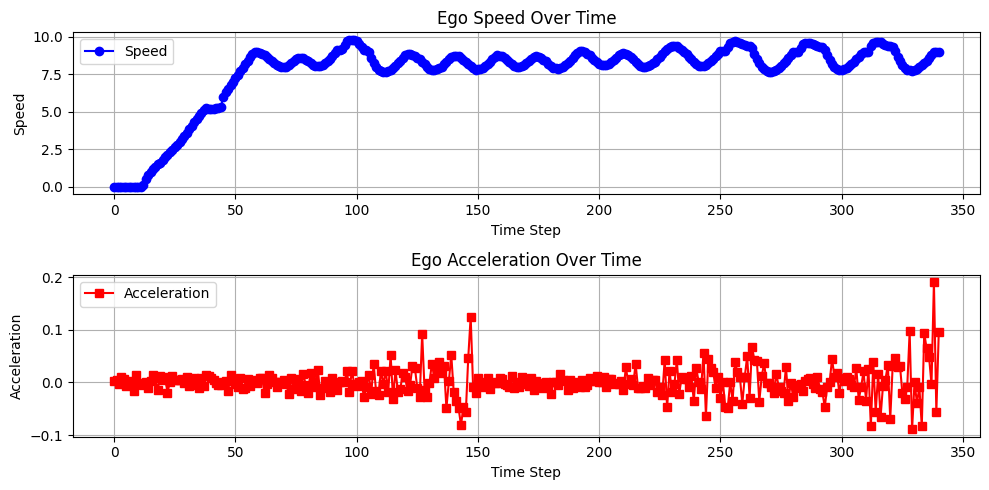

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# 指定 JSON 文件所在的目录
directory = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_02_09_15/meta"

# 获取所有 JSON 文件并按文件名排序（保证顺序读取）
json_files = sorted([f for f in os.listdir(directory) if f.endswith(".json")])

# 存储速度和加速度数据
speeds = []
accelerations = []
timestamps = []

# 读取 JSON 文件
for idx, file in enumerate(json_files):
    file_path = os.path.join(directory, file)
    
    with open(file_path, "r") as f:
        data = json.load(f)
        if "speed" in data and "steer" in data:
            speeds.append(data["speed"])
            accelerations.append(data["steer"])
            timestamps.append(idx)  # 以文件顺序作为时间轴
print(speeds)
# 绘制折线图
plt.figure(figsize=(10, 5))

# 速度折线图
plt.subplot(2, 1, 1)
plt.plot(timestamps, speeds, marker="o", linestyle="-", color="b", label="Speed")
plt.xlabel("Time Step")
plt.ylabel("Speed")
plt.title("Ego Speed Over Time")
plt.legend()
plt.grid(True)

# 加速度折线图
plt.subplot(2, 1, 2)
plt.plot(timestamps, accelerations, marker="s", linestyle="-", color="r", label="Acceleration")
plt.xlabel("Time Step")
plt.ylabel("Acceleration")
plt.title("Ego Acceleration Over Time")
plt.legend()
plt.grid(True)

# 显示图像
plt.tight_layout()
plt.show()

In [ ]:
import xml.etree.ElementTree as ET

def shorten_waypoints(input_file, output_file):
    # 解析 XML 文件
    tree = ET.parse(input_file)
    root = tree.getroot()
    
    # 遍历所有 <route> 元素
    for route in root.findall("route"):
        waypoints = route.find("waypoints")
        if waypoints is not None and len(waypoints) > 1:
            # 只保留第一个 <position> 元素
            first_position = waypoints[0]
            waypoints.clear()
            waypoints.append(first_position)
    
    # 保存到新的 XML 文件
    tree.write(output_file, encoding="utf-8", xml_declaration=True)

# 示例调用
shorten_waypoints("/bdata/usrdata/zjx/monitor_test/Bench2Drive/leaderboard/data/bench2drive220 copy.xml", "/bdata/usrdata/zjx/monitor_test/Bench2Drive/leaderboard/data/bench2drive220 copy_one_point.xml")

In [ ]:
import xml.etree.ElementTree as ET

def modify_weather(input_file, output_file):
    tree = ET.parse(input_file)
    root = tree.getroot()
    
    for weathers in root.findall('.//weathers'):
        # 清空原有的 weather 子节点
        weathers.clear()
        
        # 添加新的 weather 节点
        new_weathers = [
            {"cloudiness": "0", "fog_density": "0", "precipitation": "0", "precipitation_deposits": "0", "route_percentage": "0", "sun_altitude_angle": "90.0", "sun_azimuth_angle": "-1.0", "wetness": "0.0", "wind_intensity": "0"},
            {"cloudiness": "0", "fog_density": "0", "precipitation": "0", "precipitation_deposits": "0", "route_percentage": "100", "sun_altitude_angle": "90.0", "sun_azimuth_angle": "-1.0", "wetness": "0.0", "wind_intensity": "0"}
        ]
        
        for weather_data in new_weathers:
            ET.SubElement(weathers, "weather", weather_data)
    
    tree.write(output_file, encoding="utf-8", xml_declaration=True)

# 使用示例
modify_weather("/bdata/usrdata/zjx/monitor_test/Bench2Drive/leaderboard/data/bench2drive220 copy_one_point.xml", "/bdata/usrdata/zjx/monitor_test/Bench2Drive/leaderboard/data/bench2drive220 copy_one_point.xml")

In [ ]:
import xml.etree.ElementTree as ET

def update_trigger_points(xml_file, output_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # 遍历所有 <route> 节点
    for route in root.findall("route"):
        # 获取 <waypoints> 中的第一个 <position> 的 x, y, z 坐标
        first_position = route.find(".//waypoints/position")
        
        # 如果 <position> 节点存在
        if first_position is not None:
            route_x = first_position.get("x")
            route_y = first_position.get("y")
            route_z = first_position.get("z")

            # 输出获取的坐标
            print(f"Route ID: {route.get('id')} - Position: ({route_x}, {route_y}, {route_z})")

            # 替换所有 <trigger_point> 的 x, y, z 坐标
            for scenario in route.findall(".//scenarios/"):
                for trigger_point in scenario.findall("trigger_point"):
                    # 替换坐标
                    trigger_point.set("x", route_x)
                    trigger_point.set("y", route_y)
                    trigger_point.set("z", route_z)

    # 保存修改后的 XML 文件
    tree.write(output_file, encoding="utf-8", xml_declaration=True)

# 使用示例
update_trigger_points("/bdata/usrdata/zjx/monitor_test/Bench2Drive/leaderboard/data/bench2drive220_copy_one_point.xml", "/bdata/usrdata/zjx/monitor_test/Bench2Drive/leaderboard/data/bench2drive220_copy_one_point.xml")


Route ID: 1711 - Position: (-497.6, 3672.9, 364.9)
Route ID: 1773 - Position: (-818.5, 5288.0, 376.3)
Route ID: 1790 - Position: (592.3, 3910.7, 371.3)
Route ID: 1792 - Position: (3127.8, 6268.0, 372.0)
Route ID: 1825 - Position: (1173.4, 5318.5, 371.0)
Route ID: 1833 - Position: (2819.4, 4277.3, 360.3)
Route ID: 1852 - Position: (1362.2, 5317.5, 370.5)
Route ID: 1956 - Position: (-393.5, 3522.9, 365.8)
Route ID: 2050 - Position: (2496.3, 2063.5, 358.0)
Route ID: 2082 - Position: (1500.3, 4068.3, 361.0)
Route ID: 2084 - Position: (-1416.0, 5323.2, 376.7)
Route ID: 2086 - Position: (527.6, 5830.0, 365.6)
Route ID: 2091 - Position: (2773.3, 1633.8, 343.6)
Route ID: 2115 - Position: (2020.7, 2177.5, 361.5)
Route ID: 2127 - Position: (3562.2, 2525.3, 362.9)
Route ID: 2129 - Position: (2427.5, 2408.9, 366.1)
Route ID: 2143 - Position: (256.8, 5955.7, 360.2)
Route ID: 2144 - Position: (248.9, 3848.9, 364.1)
Route ID: 2164 - Position: (-1466.9, 3952.5, 364.2)
Route ID: 2201 - Position: (871.5

In [ ]:
def update_scenarios(xml_file, output_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # 用来计算每个 route 的编号 i
    route_counter = 1

    # 遍历所有 <route> 节点
    for route in root.findall("route"):
        # 遍历 <route> 中的 <scenarios> 中的 <scenario>
        for scenario_element in route.findall(".//scenarios/scenario"):
            # 更新 name 和 type 属性
            new_name = f"FreeRide_{route_counter}"
            scenario_element.set("name", new_name)
            scenario_element.set("type", "FreeRide")
        
        # 增加 route_counter 用于下一个 route 的编号
        route_counter += 1

    # 保存修改后的 XML 文件
    tree.write(output_file, encoding="utf-8", xml_declaration=True)

# 使用示例
update_scenarios("/bdata/usrdata/zjx/monitor_test/Bench2Drive/leaderboard/data/bench2drive220_copy_one_point.xml", "/bdata/usrdata/zjx/monitor_test/Bench2Drive/leaderboard/data/bench2drive220_copy_one_point.xml")

In [ ]:
import math
def distance_3d(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2 + (p2[2] - p1[2])**2)

p1 = (3127.8,6268.0,372)
p2 = (3127.3,6271.4,372)

print(distance_3d(p1, p2))  # 输出：7.8102


3.4365680554875566


In [ ]:
import os,shutil
def move_folder_to_collision(save_path):
    """
    将 save_path 指定的文件夹移动到其父目录下的 collision 文件夹中。
    如果 collision 目录不存在，则创建它。
    """
    parent_dir = os.path.dirname(save_path)  # 获取 save_path 的父目录
    collision_dir = os.path.join(parent_dir, "collision")  # 目标 collision 目录

    # 如果 collision 目录不存在，则创建
    os.makedirs(collision_dir, exist_ok=True)

    # 目标路径
    target_path = os.path.join(collision_dir, os.path.basename(save_path))

    # 移动文件夹
    shutil.move(save_path, target_path)

move_folder_to_collision("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/RouteScenario_1792_rep1_Town12_HazardAtSideLane_1_None_03_27_15_53_21")

In [ ]:
data = {
    "120": {
        "locations": {
            "x": [128.518, 151.518, 173.816, 191.685, 206.933, 226.874],
            "y": [244.569, 244.577, 244.584, 248.091, 248.096, 248.103],
            "z": [0.992, 0.0, 0.0, 0.0, 0.0, 0.0]
        },
        "speed": [0, 22, 10, 29, 26, 7]
    },
    "121": {
        "locations": {
            "x": [100, 120, 140, 160, 180, 200],
            "y": [200, 210, 220, 230, 240, 250],
            "z": [1.0, 0.5, 0.0, 0.0, 0.0, 0.0]
        },
        "speed": [5, 15, 20, 30, 10, 25]
    }
}

def replace_nth_id(data, new_id, n):
    keys = list(data.keys())  # 获取所有 ID
    if 0 <= n < len(keys):  # 确保 n 在有效范围内
        old_id = keys[n]  # 找到第 n 个 ID
        data[new_id] = data.pop(old_id)  # 替换 ID
    else:
        print("n 超出范围")

# 示例使用
replace_nth_id(data, "130", 1)

print(data)

{'120': {'locations': {'x': [128.518, 151.518, 173.816, 191.685, 206.933, 226.874], 'y': [244.569, 244.577, 244.584, 248.091, 248.096, 248.103], 'z': [0.992, 0.0, 0.0, 0.0, 0.0, 0.0]}, 'speed': [0, 22, 10, 29, 26, 7]}, '130': {'locations': {'x': [100, 120, 140, 160, 180, 200], 'y': [200, 210, 220, 230, 240, 250], 'z': [1.0, 0.5, 0.0, 0.0, 0.0, 0.0]}, 'speed': [5, 15, 20, 30, 10, 25]}}


In [ ]:
import random
def crossover_and_mutation(parent1, parent2, crossover_pro, mutation_pro):

    # 获取两个个体的键列表
    vehicle_i_list = list(parent1.keys())
    vehicle_j_list = list(parent2.keys())

    # 在打印之前，保留当前的列表副本
    print("Initial vehicle_i_list:", vehicle_i_list)
    print("Initial vehicle_j_list:", vehicle_j_list)
    crossover_vehicle = -1
    if random.random() < crossover_pro:
        crossover_vehicle = random.randint(0, len(vehicle_i_list) - 1)
        old_data = parent1[vehicle_i_list[crossover_vehicle]]
        parent1[vehicle_i_list[crossover_vehicle]] = parent2[vehicle_j_list[crossover_vehicle]] 
        parent2[vehicle_j_list[crossover_vehicle]] = old_data

    if random.random() < mutation_pro:
        mutation_vehicle_i = parent1[vehicle_i_list[crossover_vehicle]]  # 随机选择一个键进行变异
        valid_keys = ['speed', 'distance',"action"]  # 只允许从这两个键中选择
        key = random.choice(valid_keys)
        mutation_list_i = mutation_vehicle_i[key]
        # 从列表中随机选择一个元素进行变异
        index_to_mutate = random.randint(0, len(mutation_list_i) - 1)  # 随机选择一个索引
        if key == 'speed':
            target_speed = random.randint(15,20)
            mutation_list_i[index_to_mutate] = target_speed
        elif key == 'distance':
            target_dis = random.randint(15,30)
            mutation_list_i[index_to_mutate] = target_dis

        # 更新列表中的变异值
        parent1[vehicle_i_list[crossover_vehicle]][key] = mutation_list_i

        key = random.choice(valid_keys)
        mutation_list_j = parent2[vehicle_j_list[crossover_vehicle]]

        # 从列表中随机选择一个元素进行变异
        index_to_mutate = random.randint(0, len(mutation_list_j) - 1)  # 随机选择一个索引
        if key == 'speed':
            target_speed = random.randint(15,20)
            mutation_list_j[index_to_mutate] = target_speed
        else:
            target_dis = random.randint(15,30)
            mutation_list_j[index_to_mutate] = target_dis
        # 更新列表中的变异值
        parent2[vehicle_j_list[crossover_vehicle]][key] = mutation_list_j
    return parent1, parent2

In [ ]:
def binary_tournament_selection(population, num_selections=2):
    """
    执行二元竞标赛选择算法。
    :param population: 个体列表
    :param fitness: 每个个体的适应度值列表
    :param num_selections: 选择的个体数量
    :return: 选择出的个体列表
    """
    selected = []
    for _ in range(num_selections):
        # 随机选择两个个体
        i, j = random.sample(range(len(population)), 2)
        # 选择适应度较高的个体
        fitness_values_i = [value["fitness"] for value in population[i].values()]

        # 找到最小的 fitness 值
        min_fitness_i = min(fitness_values_i)

        fitness_values_j = [value["fitness"] for value in population[j].values()]

        # 找到最小的 fitness 值
        min_fitness_j = min(fitness_values_j)

        winner = population[i] if min_fitness_i < min_fitness_j else population[j]
        selected.append(winner)
    return selected[0]

In [ ]:
data1 ={ "1":{
    "speed":[
            1,
            2,
            3,
            4,
            5
        ],
        "action": [
            6,
            7,
            8,
            9,
            10
        ],
        "distance": [
            11,
            12,
            13,
            14,
            15
        ],
        "fitness":9},
        "2":{"speed": [
            16,
            17,
            18,
            19,
            20
        ],
        "action": [
            21,
            22,
            23,
            24,
            25
        ],
        "distance": [
            26,
            27,
            28,
            29,
            30
        ],
        "fitness":10
        }
}

data2 ={ "2":{"speed": [
            31,
            32,
            33,
            34,
            35
        ],
        "action": [
            36,
            37,
            38,
            39,
            40
        ],
        "distance": [
            41,
            42,
            43,
            44,
            45
        ],
        "fitness":11},
        "3":{"speed": [
            46,
            47,
            48,
            49,
            50
        ],
        "action": [
            51,
            52,
            53,
            54,
            55
        ],
        "distance": [
            56,
            57,
            58,
            59,
            60
        ],
        "fitness":12}}

population = [data1, data2]
binary_tournament_selection(population)


{'1': {'speed': [1, 2, 3, 4, 5],
  'action': [6, 7, 8, 9, 10],
  'distance': [11, 12, 13, 14, 15],
  'fitness': 9},
 '2': {'speed': [16, 17, 18, 19, 20],
  'action': [21, 22, 23, 24, 25],
  'distance': [26, 27, 28, 29, 30],
  'fitness': 10}}

        ###Output in JSON Format, it is necessary to output the risk index of the scenario, the reason for the risk judgment of the scenario, and the predicted behavior of each NPC, including going straight, brake, changing lanes left or right. If the scenario has the risk of collision, 
        # it is necessary to output the possible avoidable behaviors of the autonomous vehicle, including going straight, brake, changing lanes left or right, and the corresponding speed.
        {
            "risk_score": 
            "reason":
            "predict_npc_action":
            "avoidable_behaviors":
        }
                        <Extreme Risk (0)>: Immediate collision or extremely likely within 0.5-1s. Urgent avoidance is required.
                # <High Risk (2)>: Very close proximity or high likelihood of collision due to relative motion. Requires quick response.
                # <Medium Risk (3)>: Some overlap in projected paths or moderate closing speed, manageable with timely reaction.
                # <Low Risk (4)>: Low likelihood of collision, sufficient time and space to avoid.
                <Negligible Risk (1)>: No meaningful risk within 0.5-1s, NPC is far or moving away.

In [ ]:
    messages = [
                {"role": "system", "content": """
                You are an **autonomous vehicle collision prediction expert**. Your task is to predict whether a collision will occur **within the next 0.5-1 second** based on **three perspective images (left front, front, right front)** obtained by the autonomous vehicle, and **a description of the movement of each car in the past 2 seconds**.

                Your role is to evaluate the provided scenario based on the following safety metrics, where 0 indicates a collision and 1 indicates no risk of collision:

                **Risk Levels and Definitions:**
                <Extreme Risk (0)>: Immediate collision or extremely likely within 0.5-1s. Urgent avoidance is required.
                <Negligible Risk (1)>: No meaningful risk within 0.5-1s, NPC is far or moving away.

                Please proceed with the following steps:

                ---

                1️⃣ **Identify the NPCs Based on the Current Scene**:
                - Use the image data and scene descriptions to identify each NPC that appears visually.
                - Note their lane, approximate position relative to ego (e.g. front-left, behind, etc.).

                2️⃣ **Validate Motion by Combining Images and Descriptions**:
                - Analyze past movement trends (last 2 seconds) and current image cues to understand the motion of each NPC.
                - Determine whether NPC is going straight, changing lanes, accelerating, decelerating, etc.

                3️⃣ **Assess Risk of Collision**:
                - Identify NPCs that may have **trajectory overlap** with the ego vehicle.
                - Evaluate **relative longitudinal and lateral distance**, and **relative velocity** between ego and each NPC.
                - Predict positions of ego and NPCs after 0.5-1 second.
                - If predicted positions are too close or overlapping considering velocity and direction, mark as potential collision.

                ⚠️ Note: Close proximity alone does **not** imply a collision — only if **relative speed and direction** lead to a closing gap with insufficient braking or maneuvering space.

                4️⃣ **Collision Judgment & Avoidance Plan**:
                - Will a collision occur? (Yes/No)
                - If Yes, suggest an avoidance strategy (e.g., brake, accelerate, change lanes) and corresponding speed range.

                ---

                ### Output Format (JSON):
                Return the final output as a JSON with:

                ```json
                {
                    "risk_score": [0-5],
                    "reason": "Explain why this risk level was assigned, citing distances, speeds, and motion.",
                    "predict_npc_action": {
                        "NPC1": "braking",
                        "NPC2": "lane change left",
                        ...
                    },
                    "avoidable_behaviors": {
                        "ego_action": ["brake", "lane change right"],
                        "recommended_speed": "3.2 m/s"
                    }
                }                 """},
            {"role": "user", "content": []}
    ]
                # <Extreme Risk (0)>: Immediate collision or extremely likely within 0.5-1s. Urgent avoidance is required.
                # <Negligible Risk (1)>: No meaningful risk within 0.5-1s, NPC is far or moving away.

                # <Extreme Risk (0)>: A collision is likely to occur within 0.5-1s if no corrective action is taken. The current trajectory and behavior of the NPC pose a clear and immediate threat.
                # <Negligible Risk (1)>: Based on the current distance, relative speed, and direction, the NPC is within a safe range and not expected to cause a collision within 0.5-1s.

                    # - Carefully assess both **longitudinal distance** (distance along the driving direction) and **lateral distance** (distance across lanes):  
                    # - An NPC in the same lane (lateral distance ≈ 0) but far ahead (large longitudinal distance) is usually not a collision risk.  
                    # - A small lateral distance **only indicates danger** if the longitudinal distance is also small **and** the relative motion leads to a closing gap.

                You are an **autonomous vehicle collision prediction expert**. Your task is to predict whether a collision will occur **within the next 0.5-1 second** based on **three perspective images (left front, front, right front)** obtained by the autonomous vehicle, and **a description of the movement of each car in the past 2 seconds**.

                Your role is to evaluate the provided scenario based on the following safety metrics, where 0 indicates a collision and 1 indicates no risk of collision:

                **Risk Levels and Definitions:**
                <Extreme Risk (0)>: Immediate collision or extremely likely within 0.5-1s. Urgent avoidance is required.
                <Negligible Risk (1)>: No meaningful risk within 0.5-1s, NPC is far or moving away.

                Please proceed with the following steps:

                ---

                1️⃣ **Identify the NPCs Based on the Current Scene**:
                - Use the image data and scene descriptions to identify each NPC that appears visually.
                - Note their lane, approximate position relative to ego (e.g. front-left, behind, etc.).

                2️⃣ **Validate Motion by Combining Images and Descriptions**:
                - Analyze past movement trends (last 2 seconds) and current image cues to understand the motion of each NPC.
                - Determine whether NPC is going straight, changing lanes, accelerating, decelerating, etc.

                3️⃣ **Assess Risk of Collision**:
                - Based on visual heading and recent motion patterns, predict each NPC's future path and identify those that are likely to **intersect or overlap** with the ego vehicle's predicted trajectory.
                - Evaluate **relative longitudinal and lateral distance**, and **relative velocity** between ego and each NPC.
                - Carefully assess both **longitudinal distance** (distance along the driving direction) and **lateral distance** (distance across lanes):  
                    - An NPC in the same lane (lateral distance ≈ 0) but far ahead (large longitudinal distance) is usually not a collision risk.  
                    - A small lateral distance **only indicates danger** if the longitudinal distance is also small **and** the relative motion leads to a closing gap.
                - Predict positions of ego and NPCs after 0.5-1 second.
                - If predicted positions are too close or overlapping considering velocity and direction, mark as potential collision.

                ⚠️ Note: Close proximity alone does **not** imply a collision — only if **relative speed and direction** lead to a closing gap with insufficient braking or maneuvering space.

                4️⃣ **Collision Judgment & Avoidance Plan**:
                - Will a collision occur? (Yes/No)
                - If Yes, point out the dangerous npcs, suggest an avoidance strategy (e.g., brake, accelerate, change lanes) and corresponding speed range.

                ---

In [1]:

import os
import re

def extract_reasons(folder_path):
    reasons = []
    unreadable_files = []

    with open(folder_path, 'r') as file:
        for line in file:
            if '"reason"' in line:
                file_has_reason = True
                # 提取 "reason" 字段内容
                match = re.search(r'"reason"\s*:\s*"([^"]*)"', line)
                if match:
                    reasons.append(match.group(1))
                break  # 如果只需要一个 reason 字段，提取后跳出
    return reasons

#extract_reasons("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal_check/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_04_22_12_15_28/result/0060.txt")

In [104]:
import json
import os,io
import base64
from PIL import Image

def compress_and_encode(image_path, target_width=200):
    img = Image.open(image_path)
    w, h = img.size
    ratio = target_width / w
    target_height = int(h * ratio)

    # 向后兼容的 LANCZOS 采样
    resample = getattr(Image, 'Resampling', Image).LANCZOS

    resized_img = img.resize((target_width, target_height), resample)

    buffer = io.BytesIO()
    resized_img.save(buffer, format='PNG')
    img_bytes = buffer.getvalue()
    base64_str = base64.b64encode(img_bytes).decode('utf-8')
    return base64_str

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def load_json_file(file_path):
    """读取 JSON 文件并返回数据"""
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data
def format_float(value, precision=2):
    return round(float(value), precision) 

def generate_npc_prompt_old(npc_key, npc_data, ego_data):
    # Determine relative position (left or right)
    relative_side = "left" if npc_data["left_right_lane"] == "right" else "right"
    # # Determine if the NPC is in front or behind the ego vehicle
    # front_back = "front" if npc_data["longitudinal_distance"] > 0 else "behind"
    # 计算纵向关系
    if npc_data["longitudinal_distance"] > 4.8:  # NPC 完全在 ego 车前方
        front_back = "in front of ego"
        longitudinal_distance = abs(npc_data["longitudinal_distance"]) - 4.8
        distance_description = f"with NPC's rear {format_float(longitudinal_distance)} m in front of Ego's front"
    elif npc_data["longitudinal_distance"] < -4.8:  # NPC 完全在 ego 车后方
        front_back = "behind ego"
        longitudinal_distance = abs(npc_data["longitudinal_distance"]) - 4.8
        distance_description = f"with NPC's front {format_float(longitudinal_distance)} m beind Ego's rear"
    elif npc_data["longitudinal_distance"] > 0.2 and npc_data["longitudinal_distance"] < 4.8:  # NPC 部分重叠 ego 车,且稍领先ego
        front_back = "partially beside and slightly in front of ego"
        longitudinal_distance = abs(npc_data["longitudinal_distance"])  # 取最近的端点距离
        distance_description = f"with NPC's front {format_float(longitudinal_distance)} m in front of Ego's front"
    elif npc_data["longitudinal_distance"] < -0.2 and npc_data["longitudinal_distance"] > -4.8:
        front_back = "partially beside and slightly behind ego"
        longitudinal_distance = abs(npc_data["longitudinal_distance"])  # 取最近的端点距离
        distance_description = f"with NPC's front {format_float(longitudinal_distance)} m behind Ego's front"
    else:
        front_back = "longitudinally close but not overlapping with ego"
        distance_description = "still separated laterally"

    if npc_data["lateral_distance"] > 2.16: # NPC 完全在 ego 右边
        left_right = "to the right of ego"
        lateral_distance = abs(npc_data["lateral_distance"]) - 2.16  # NPC 车左端到 Ego 车右端的距离
        lateral_description = f"with NPC's left {format_float(lateral_distance)} m to the right of Ego's right"
    elif npc_data["lateral_distance"] < -2.16: # NPC 完全在 ego 左边
        left_right = "to the left of ego"
        lateral_distance = abs(npc_data["lateral_distance"]) - 2.16  # NPC 车右端到 Ego 车左端的距离
        lateral_description = f"with NPC's right {format_float(lateral_distance)} m to the left of Ego's left"
    # elif npc_data["lateral_distance"] > -2.16 and npc_data["lateral_distance"] < 0: # NPC 部分重叠 ego 车,且稍微在 ego 右边,
    elif npc_data["lateral_distance"] < 2.16 and npc_data["lateral_distance"] > 0.2: # NPC 部分重叠 ego 车,且稍微在 ego 右边,
        left_right = "partially beside and slightly to the right of ego"
        lateral_distance = abs(npc_data["lateral_distance"])  # NPC 车右端到 Ego 车左端的距离
        lateral_description = f"with NPC's right {format_float(lateral_distance)} m to the right of Ego's side"
    elif npc_data["lateral_distance"] > -2.16 and npc_data["lateral_distance"] < -0.2:
        left_right = "partially beside and slightly to the left of ego"
        lateral_distance = abs(npc_data["lateral_distance"])  # NPC 车左端到 Ego 车右端的距离
        lateral_description = f"with NPC's right {format_float(lateral_distance)} m to the right of Ego's side"
    else:
        left_right = "laterally aligned but not overlapping with ego"
        lateral_description = "still separated longitudinally"

    if npc_data['current_lane'] == ego_data['lane']:
        prompt = f"{npc_key} and ego are in the same lane."
        prompt += f"Laterally (horizontally), {npc_key} is {left_right},{lateral_description}, "
        prompt += f"and and longitudinally (vertically) {front_back}, {distance_description}, "
        prompt += f"traveling at a speed of {format_float(npc_data['speed'])} m/s."
    else:
        prompt = f"{npc_key} is in the {relative_side} {abs(npc_data['current_lane'] - ego_data['lane'])} lane. "
        prompt += f"Laterally (horizontally), {npc_key} is {left_right},{lateral_description}, "
        prompt += f"and and longitudinally (vertically) {front_back}, {distance_description}, "
        prompt += f"traveling at a speed of {format_float(npc_data['speed'])} m/s."

    return prompt

# def generate_npc_prompt(npc_key, npc_data, ego_data):
#     # Determine relative position (left or right)
#     relative_side = "left" if npc_data["left_right_lane"] == "right" else "right"
#     # # Determine if the NPC is in front or behind the ego vehicle
#     # front_back = "front" if npc_data["longitudinal_distance"] > 0 else "behind"
#     # 计算纵向关系
#     # 定义车辆半长
#     EGO_HALF_LENGTH = 2.4  
#     NPC_HALF_LENGTH = 2.4

#     longitudinal_distance = npc_data["longitudinal_distance"]
#     front_back = ""
#     distance_description = ""

#     # 完全分离状态判断
#     if longitudinal_distance > EGO_HALF_LENGTH + NPC_HALF_LENGTH:
#         front_back = "completely in front of ego"
#         gap = longitudinal_distance - (EGO_HALF_LENGTH + NPC_HALF_LENGTH)
#         distance_description = f"with NPC's rear {format_float(gap)} m ahead of Ego's front"

#     elif longitudinal_distance < -(EGO_HALF_LENGTH + NPC_HALF_LENGTH):
#         front_back = "completely behind ego"
#         gap = abs(longitudinal_distance) - (EGO_HALF_LENGTH + NPC_HALF_LENGTH)
#         distance_description = f"with NPC's front {format_float(gap)} m behind Ego's rear"

#     # 重叠/相邻状态判断
#     else:
#         overlap = (EGO_HALF_LENGTH + NPC_HALF_LENGTH) - abs(longitudinal_distance)
#         if longitudinal_distance > 0:
#             front_back = "closely in front of ego"
#             distance_description = f"within a close longitudinal range of {format_float(overlap)} m"
#         else:
#             front_back = "closely behind ego"
#             distance_description = f"within a close longitudinal range of {format_float(overlap)} m"
#     # 重叠/相邻状态判断
#     # else:
#     #     if longitudinal_distance > 0:
#     #         # NPC 整体在 Ego 前方（含重叠）
#     #         overlap = (EGO_HALF_LENGTH + NPC_HALF_LENGTH) - abs(longitudinal_distance)
#     #         front_back = "partially overlapping in front of ego" if overlap > 0 else "immediately ahead of ego"
#     #         distance_description = f"with {format_float(overlap)} m longitudinal overlap" if overlap > 0 else "exactly aligned front-to-rear"
        
#     #     else:
#     #         # NPC 整体在 Ego 后方（含重叠）
#     #         overlap = (EGO_HALF_LENGTH + NPC_HALF_LENGTH) - abs(longitudinal_distance)
#     #         front_back = "partially overlapping behind ego" if overlap > 0 else "immediately behind ego"
#     #         distance_description = f"with {format_float(overlap)} m longitudinal overlap" if overlap > 0 else "exactly aligned rear-to-front"

#     EGO_HALF_WIDTH = 1.08  
#     NPC_HALF_WIDTH = 1.08

#     lateral_distance = npc_data["lateral_distance"]

#     if lateral_distance > EGO_HALF_WIDTH + NPC_HALF_WIDTH:
#         # NPC 完全在右侧（无重叠）
#         left_right = "completely to the right of ego"
#         gap = lateral_distance - (EGO_HALF_WIDTH + NPC_HALF_WIDTH)
#         lateral_description = f"with a clear gap of {format_float(gap)} m between vehicles"

#     elif lateral_distance < -(EGO_HALF_WIDTH + NPC_HALF_WIDTH):
#         # NPC 完全在左侧（无重叠）
#         left_right = "completely to the left of ego"
#         gap = abs(lateral_distance) - (EGO_HALF_WIDTH + NPC_HALF_WIDTH)
#         lateral_description = f"with a clear gap of {format_float(gap)} m between vehicles"

#     elif lateral_distance > 0:
#             overlap = EGO_HALF_WIDTH + NPC_HALF_WIDTH - abs(lateral_distance)
#             left_right = "closely to the right of ego"
#             lateral_description = f"within a lateral range of {format_float(overlap)} m"
#     else:
#             overlap = EGO_HALF_WIDTH + NPC_HALF_WIDTH - abs(lateral_distance)
#             left_right = "closely to the left of ego"
#             lateral_description = f"within a lateral range of {format_float(overlap)} m"
#     # elif lateral_distance > 0:
#     #     # NPC 在 Ego 右侧（横向上）
#     #     overlap = EGO_HALF_WIDTH + NPC_HALF_WIDTH - abs(lateral_distance)
#     #     if overlap > 0:
#     #         left_right = "partially projection overlapping to the right of ego"
#     #         lateral_description = f"with {format_float(overlap)} m lateral overlap on the right side"
#     #     else:
#     #         left_right = "immediately to the right of ego"
#     #         lateral_description = "exactly aligned side-by-side on the right"

#     # else:
#     #     # NPC 在 Ego 左侧（横向上）
#     #     overlap = EGO_HALF_WIDTH + NPC_HALF_WIDTH - abs(lateral_distance)
#     #     if overlap > 0:
#     #         left_right = "partially projection overlapping to the left of ego"
#     #         lateral_description = f"with {format_float(overlap)} m lateral overlap on the left side"
#     #     else:
#     #         left_right = "immediately to the left of ego"
#     #         lateral_description = "exactly aligned side-by-side on the left"

#     if npc_data['current_lane'] == ego_data['lane']:
#         prompt = f"{npc_key} is in the {npc_data['current_lane']} lane, which is the same as ego's lane. "
#         prompt += f"longitudinally, {front_back}, {distance_description}, "
#         prompt += f"laterally, {npc_key} is {left_right},{lateral_description}, "
#         # prompt += f"the angle between its heading and the lane direction is approximately {abs(format_float(npc_data['lane_angle']))} degrees, "
#         prompt += f"traveling at a speed of {format_float(npc_data['speed'])} m/s."
#         # prompt += f"traveling at a longitudinal speed of {abs(format_float(npc_data['self_longitudinal_speed']))} m/s and a lateral speed of {abs(format_float(npc_data['self_lateral_speed']))} m/s."
#     else:
#         prompt = f"{npc_key} is in the {npc_data['current_lane']} lane, which is {abs(ego_data['lane']-npc_data['current_lane'])} lanes different from ego's lane. "
#         prompt += f"longitudinally, {front_back}, {distance_description}, "
#         prompt += f"laterally, {npc_key} is {left_right},{lateral_description}, "
#         # prompt += f"the angle between its heading and the lane direction is approximately {abs(format_float(npc_data['lane_angle']))} degrees, "
#         prompt += f"traveling at a speed of {format_float(npc_data['speed'])} m/s."
#         # prompt += f"traveling at a longitudinal speed of {abs(format_float(npc_data['self_longitudinal_speed']))} m/s and a lateral speed of {abs(format_float(npc_data['self_lateral_speed']))} m/s."
#     return prompt


def generate_npc_prompt(npc_key, npc_data, ego_data):
    def format_float(val):
        return f"{val:.2f}"

    # Half size definitions
    EGO_HALF_LENGTH = 2.4
    NPC_HALF_LENGTH = 2.4
    EGO_HALF_WIDTH = 1.08
    NPC_HALF_WIDTH = 1.08

    # Longitudinal relation
    longitudinal_distance = npc_data["longitudinal_distance"]
    abs_long_dist = abs(longitudinal_distance)
    long_dir = "front of" if longitudinal_distance > 0 else "behind"

    # Lateral relation
    lateral_distance = npc_data["lateral_distance"]
    abs_lat_dist = abs(lateral_distance)
    lat_dir = "right" if lateral_distance > 0 else "left"


    prompt = f"{npc_key} is currently driving in 'lane {npc_data['current_lane']}. "
    prompt += f"It is approximately {format_float(abs_long_dist)} meters {long_dir} the ego vehicle longitudinally, "
    prompt += f"and about {format_float(abs_lat_dist)} meters to the {lat_dir} side laterally. "
    prompt += f"{npc_key} is traveling at a speed of {format_float(npc_data['speed'])} m/s. "
    # prompt += "No abrupt maneuvers have been observed in its recent motion."

    return prompt



def generate_ego_prompt_old(ego_data):
    return f"ego is in lane {ego_data['lane']}, traveling at a longitudinal speed of {abs(format_float(ego_data['self_longitudinal_speed']))} m/s and a lateral speed of {abs(format_float(ego_data['self_lateral_speed']))} m/s, moving straight ahead."

def generate_ego_prompt(ego_data):
    return f"ego is in lane {ego_data['lane']}, traveling at a speed of {format_float(ego_data['speed'])} m/s, moving straight ahead."

def generate_full_prompt(json_file):
    """生成完整的场景描述prompt"""
    # 读取 JSON 文件
    data = load_json_file(json_file)
    npc_list = []
    prompts = []
    prompt = generate_ego_prompt(data["ego_vehicle"])
    prompts.append(prompt)
    # 遍历 NPC 并生成 prompt
    for npc_key, npc_data in data.items():
        if npc_key != "ego_vehicle" and  npc_data["longitudinal_distance"] > -1:
            npc_list.append(npc_key)
            prompt = generate_npc_prompt(npc_key, npc_data, data["ego_vehicle"])
            prompts.append(prompt)

    # 合并开始和结束的描述
    final_prompt = f"From the ego view, the lanes from left to right are numbered from -2, to -4, with a lane width of 3.5 meters. " + " ".join(prompts)
    # final_prompt_easy = f"In the BEV image, the lanes from left to right are numbered from -3 to -7, with a lane width of 3.5 meters. The ego vehicle is located in the center of the image." 
    # final_prompt_easy += f"Each vehicle has a width of 2.16 m and a length of 4.8 m, and the distances are measured from the each vehicles' center position." + " ".join(prompts)
    return final_prompt, npc_list

def generate_full_prompt_specific_npc(json_file, npc_list):
    """生成完整的场景描述prompt"""
    # 读取 JSON 文件
    data = load_json_file(json_file)
    prompts = []
    prompt = generate_ego_prompt(data["ego_vehicle"])
    prompts.append(prompt)
    # 遍历 NPC 并生成 prompt
    for npc_key, npc_data in data.items():
        if npc_key != "ego_vehicle" and npc_key in npc_list:
            prompt = generate_npc_prompt(npc_key, npc_data, data["ego_vehicle"])
            prompts.append(prompt)

    # 合并开始和结束的描述
    final_prompt = f"From the ego view, the lanes from left to right are numbered from -2, to -4, with a lane width of 3.5 meters. " + " ".join(prompts)
    return final_prompt

def generate_vehicle_descriptions(base_path, current_frame, steps=[0, 5, 10, 15, 20]):
    descriptions = {}
    npc_info = None
    for step in steps:
        frame_id = current_frame - step
        time_offset = step * 0.1
        key = "vehicle_description" if step == 0 else f"vehicle_description_{time_offset:.1f}s"
        padded_id = f"{frame_id:04d}" 
        path = os.path.join(base_path, f"{padded_id}.json")
        if step == 0:
            vehicle_description, npc_info = generate_full_prompt(path)
        else:
            vehicle_description = generate_full_prompt_specific_npc(path, npc_info)
        descriptions[key] = vehicle_description
    return descriptions


def generate_supply_vehicle_descriptions(base_path, current_frame, npc_info, steps=[0, 5, 10, 15, 20]):
    descriptions = {}
    for step in steps:
        frame_id = current_frame - step
        time_offset = step * 0.1
        key = "vehicle_description" if step == 0 else f"vehicle_description_{time_offset:.1f}s"
        padded_id = f"{frame_id:04d}" 
        path = os.path.join(base_path, f"{padded_id}.json")
        vehicle_description = generate_full_prompt_specific_npc(path, npc_info)
        descriptions[key] = vehicle_description
    return descriptions
# 使用示例
# base_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj_old/collision/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_03_00_19/record/"
# current_frame = 30
# vehicle_descriptions = generate_vehicle_descriptions(base_path, current_frame)        


def genereta_supply_common_prompt(common_best_record):
    agent_prompt = ""
    unique_path = next(iter(common_best_record.values()))["path"]
    base_dir = os.path.dirname(unique_path)
    root_dir = os.path.dirname(base_dir)
    filename = os.path.basename(unique_path)  # 得到 "0010.json"
    number_str = os.path.splitext(filename)[0]  # 得到 "0010"
    number = int(number_str.lstrip('0'))  # 去除前导0并转为整数：10
    history_reason_dir = os.path.join(root_dir, 'result/')
    history_reason_path = os.path.join(history_reason_dir, f"{number_str}.txt")
    reasons = extract_reasons(history_reason_path)
    front_left_dir = os.path.join(root_dir, 'rgb_front_left/')
    front_left_image = os.path.join(front_left_dir, f"{number_str}.png")
    front_dir = os.path.join(root_dir, 'rgb_front/')
    front_image = os.path.join(front_dir, f"{number_str}.png")
    front_right_dir = os.path.join(root_dir, 'rgb_front_right/')
    front_right_image = os.path.join(front_right_dir, f"{number_str}.png")
    dangerous_npcs = [
    data['dangerous_npc'].lower() 
    for data in common_best_record.values() 
    if 'dangerous_npc' in data]
    vehicle_descriptions = generate_supply_vehicle_descriptions(base_dir, number, dangerous_npcs)
    for agent, data in common_best_record.items():
        agent_prompt += f"The behavior of NPC{agent} in the current scene and {data['dangerous_npc']} in this historical scene is similar."
    
    front_left_image_encode = compress_and_encode(front_left_image)
    front_image_encode = compress_and_encode(front_image)
    front_right_image_encode = compress_and_encode(front_right_image)
    return vehicle_descriptions, agent_prompt, front_left_image_encode, front_image_encode, front_right_image_encode, reasons
                
def genereta_supply_vehicle_descriptions(agent, data):
    unique_path = data["path"]
    base_dir = os.path.dirname(unique_path)
    root_dir = os.path.dirname(base_dir)
    filename = os.path.basename(unique_path)  # 得到 "0010.json"
    number_str = os.path.splitext(filename)[0]  # 得到 "0010"
    number = int(number_str.lstrip('0'))  # 去除前导0并转为整数：10
    history_reason_dir = os.path.join(root_dir, 'result/')
    history_reason_path = os.path.join(history_reason_dir, f"{number_str}.txt")
    reasons = extract_reasons(history_reason_path)
    front_left_dir = os.path.join(root_dir, 'rgb_front_left/')
    front_left_image = os.path.join(front_left_dir, f"{number_str}.png")
    front_dir = os.path.join(root_dir, 'rgb_front/')
    front_image = os.path.join(front_dir, f"{number_str}.png")
    front_right_dir = os.path.join(root_dir, 'rgb_front_right/')
    front_right_image = os.path.join(front_right_dir, f"{number_str}.png")
    dangerous_npcs = [
    data['dangerous_npc'].lower()]
    vehicle_descriptions = generate_supply_vehicle_descriptions(base_dir, number, dangerous_npcs)
    agent_prompt = f"The behavior of NPC{agent} in the current scene and {data['dangerous_npc']} in this historical scene is similar."
    
    front_left_image_encode = compress_and_encode(front_left_image)
    front_image_encode = compress_and_encode(front_image)
    front_right_image_encode = compress_and_encode(front_right_image)
    return vehicle_descriptions, agent_prompt, front_left_image_encode, front_image_encode, front_right_image_encode, reasons


In [69]:
#只比较可能误报的场景，保存的场景是曾经误报的场景，先比较当前场景中的每个npc和ego的相对运动是否是过去场景中误报的运动，如果是的话则保存，然后记录所有从所有的保存中选择最相似的
# 如果其中有多个npc和ego的相对运动在误报场景中是相似的，而这几个npc又不再同一个历史场景中，则对应每个npc对应的场景图都保存
#首先需要道路相同，然后相对距离，然后是相对速度。
from itertools import combinations
from collections import Counter
from collections import defaultdict

def same_sign(a, b):
    return a * b > 0 or (a == 0 and b == 0)

def is_graph_entry_match(entry_a, entry_b):
    return (
        entry_a["lane_difference"] == entry_b["lane_difference"]
        and entry_a["relative_position"] == entry_b["relative_position"]
        and same_sign(entry_a["longitudinal_distance"], entry_b["longitudinal_distance"])
        and same_sign(entry_a["lateral_distance"], entry_b["lateral_distance"])
        # and same_sign(entry_a["relative_speed"], entry_b["relative_speed"])
    )


def compare_pair_graph(target_pair, pair):
    """
    fp_tn_candidate = {
    0: [{"index": 2, "path": "scene_01.json"}, {"index": 5, "path": "scene_02.json"}],
    1: [{"index": 1, "path": "scene_02.json"}, {"index": 7, "path": "scene_03.json"}],
    ...
}
    """
    fp_tn_candidate = {}
    target_current_graph = target_pair["current_graph"]
    target_past_graph = target_pair["past_graph"]
    pair_current_graph_orginal = pair["current_graph"]
    pair_past_graph_orginal = pair["past_graph"]
    pair_current_graph = []
    pair_past_graph = []
    #挑选出被误判为危险的npc的行为
    dangerous_npc_map = {}  # 记录每个 candidate_index 对应的 dangerous_npc 名称
    raw_dangerous_npc = pair["metadata"].get("dangerous_npc", [])
    dangerous_npc_list = []
    if isinstance(raw_dangerous_npc, str):
        dangerous_npc_list = [npc.strip() for npc in raw_dangerous_npc.split(",")]
    elif isinstance(raw_dangerous_npc, list):
        for item in raw_dangerous_npc:
            if isinstance(item, str) and "," in item:
                # 列表中是像 "NPC1, NPC2" 这样的元素，继续拆分
                dangerous_npc_list.extend([npc.strip() for npc in item.split(",")])
            else:
                dangerous_npc_list.append(item)

    for idx, dangerous_npc in enumerate(dangerous_npc_list):
        npc_id = int(dangerous_npc[3:]) - 1
        pair_current_graph.append(pair_current_graph_orginal[npc_id])
        pair_past_graph.append(pair_past_graph_orginal[npc_id])
        dangerous_npc_map[idx] = dangerous_npc 
    for agent_i in range(len(target_current_graph)):
        fp_tn_candidate[agent_i] = []
        target_past_graph_gent_i = target_past_graph[agent_i]
        for candidate in pair_past_graph:
            if is_graph_entry_match(candidate, target_past_graph_gent_i):#过去时刻相对场景图相同
                candidate_index = pair_past_graph.index(candidate)
                candidate_current = pair_current_graph[candidate_index]
                target_current_graph_gent_i = target_current_graph[agent_i]
                if is_graph_entry_match(candidate_current, target_current_graph_gent_i):#当前时刻相对场景图相同
                    target_relative_lateral_distance = abs(target_current_graph_gent_i["lateral_distance"]) - abs(target_past_graph_gent_i["lateral_distance"])
                    target_relative_longitudinal_distance = abs(target_current_graph_gent_i["longitudinal_distance"]) - abs(target_past_graph_gent_i["longitudinal_distance"])
                    candidate_relative_lateral_distance = abs(candidate_current["lateral_distance"]) - abs(candidate["lateral_distance"])
                    candidate_relative_longitudinal_distance = abs(candidate_current["longitudinal_distance"]) - abs(candidate["longitudinal_distance"])
                    if same_sign(target_relative_lateral_distance, candidate_relative_lateral_distance) and same_sign(target_relative_longitudinal_distance, candidate_relative_longitudinal_distance):#相对位移相同,是靠近还是远离ego
                        #对于当前场景属于同一范畴
                        if abs(target_current_graph_gent_i["lateral_distance"] - candidate_current["lateral_distance"]) < 1 and abs(target_current_graph_gent_i["longitudinal_distance"] - candidate_current["longitudinal_distance"]) < 3:
                            fp_tn_candidate[agent_i].append({
                            "index": candidate_index,
                            "path": pair["metadata"]["path"],
                            "dangerous_npc": dangerous_npc_map[candidate_index],  # 记录是哪个NPC
                        })
    
    return fp_tn_candidate   

def find_most_similar_graph_pair(cur_now, past_now, db_path="/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db.jsonl"):
    if not os.path.exists(db_path):
        return None
    target_pair = {
        "current_graph": cur_now,
        "past_graph": past_now
    }
    merged_result = defaultdict(list)
    with open(db_path, "r") as f:
        for line in f:
            pair = json.loads(line)
            match = compare_pair_graph(target_pair, pair)
            if match and any(match.values()): 
                for key, value in match.items():
                    merged_result[key].extend(value)

    return dict(merged_result)

cur_now = [{"lane_difference": 1, "relative_position": "left", "lateral_distance": -2.667417497487694, "longitudinal_distance": 12.934944447718642, "lateral_speed": -0.005608070339931584, "longitudinal_speed": 0.8248899595448673}, \
           {"lane_difference": 2, "relative_position": "left", "lateral_distance": -7.168458695853902, "longitudinal_distance": -24.69560174391121, "lateral_speed": -0.0027501792091957746, "longitudinal_speed": 1.2340355352822838}, \
            {"lane_difference": 0, "relative_position": "right", "lateral_distance": 0.9373134679483562, "longitudinal_distance": 16.923196118729937, "lateral_speed": -0.01339034864325707, "longitudinal_speed": 0.5896993656030851}]
past_now = [{"lane_difference": 1, "relative_position": "left", "lateral_distance": -3.2340367006832933, "longitudinal_distance": 13.317347989213113, "lateral_speed": -0.21157654692536662, "longitudinal_speed": 0.303785099775455},\
             {"lane_difference": 2, "relative_position": "left", "lateral_distance": -7.197836046923913, "longitudinal_distance": -20.59835063735108, "lateral_speed": 0.0858489797883944, "longitudinal_speed": 1.920923653379579}, \
                {"lane_difference": 0, "relative_position": "right", "lateral_distance": 0.38111911263109116, "longitudinal_distance": 17.540511671483994, "lateral_speed": -0.0072411404314321635, "longitudinal_speed": 0.4926219810738983}]
find_most_similar_graph_pair(cur_now,past_now)

{0: [{'index': 0,
   'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_08_01_34_11/record/0093.json',
   'dangerous_npc': 'NPC3'},
  {'index': 0,
   'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_08_01_34_11/record/0098.json',
   'dangerous_npc': 'NPC3'},
  {'index': 0,
   'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_3_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_4_None_05_17_20_40_57/record/0116.json',
   'dangerous_npc': 'NPC1'}],
 1: [],
 2: []}

In [81]:
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim

def compute_similarity(img1_path, img2_path):
    img1 = np.array(Image.open(img1_path).convert("L").resize((256, 256)))
    img2 = np.array(Image.open(img2_path).convert("L").resize((256, 256)))
    return ssim(img1, img2)

def compute_multi_view_similarity(current_left_image, current_front_image, current_right_image,
                                  front_left_image, front_image, front_right_image):
    total_score = 0.0

    image_pairs = [
        (current_left_image, front_left_image),
        (current_front_image, front_image),
        (current_right_image, front_right_image)
    ]

    for cur_img_path, cmp_img_path in image_pairs:
        if os.path.exists(cur_img_path) and os.path.exists(cmp_img_path):
            try:
                score = compute_similarity(cur_img_path, cmp_img_path)
                total_score += score
            except Exception as e:
                print(f"Error computing similarity for view: {e}")
                continue

    return total_score


def select_best_matches(merged_result, current_left_image, current_front_image, current_right_image):
    path_counter = Counter()
    path_to_agents = defaultdict(list)

    for agent_id, candidates in merged_result.items():
        for entry in candidates:
            path = entry["path"]
            path_counter[path] += 1
            path_to_agents[path].append(agent_id)

    # 获取 path 出现多次的情况
    common_paths = {path: count for path, count in path_counter.items() if count > 1}

    selected = []
    common_best_record = {}
    unique_best_record = {}
    record = {}
    if common_paths:
        max_count = max(common_paths.values())  # 获取最大的出现次数
        best_paths = [path for path, count in common_paths.items() if count == max_count]  # 获取所有出现次数等于最大次数的路径
        print(f"Best paths: {best_paths}")
        path_similarity_scores = {}
        for path in best_paths:  # 处理所有出现次数最多的路径
            base_dir = os.path.dirname(path)
            filename = os.path.basename(path)          # 得到 "0010.json"
            number_str = os.path.splitext(filename)[0]
            front_left_dir = os.path.join(base_dir, 'rgb_front_left/')
            front_left_image = os.path.join(front_left_dir, f"{number_str}.png")
            front_dir = os.path.join(base_dir, 'rgb_front/')
            front_image = os.path.join(front_dir, f"{number_str}.png")
            front_right_dir = os.path.join(base_dir, 'rgb_front_right/')
            front_right_image = os.path.join(front_right_dir, f"{number_str}.png")
            path_similarity_scores[path] = compute_multi_view_similarity(current_left_image, current_front_image, current_right_image, front_left_image, front_image, front_right_image)
        best_path = max(path_similarity_scores.items(), key=lambda x: x[1])[0]
        for agent_id in path_to_agents[best_path]:
            print(agent_id)
            selected.append(agent_id)
            for entry in merged_result[agent_id]:
                if entry["path"] == best_path:
                    record = {
                        "path": entry["path"],
                        "dangerous_npc": entry["dangerous_npc"],
                        "similarity_score": path_similarity_scores[best_path]
                    }
                    common_best_record[agent_id] = record
                    break

    # 2. 对其余 agent，用图像相似度挑选
    for agent_id, candidates in merged_result.items():
        best_entry = None
        if agent_id in selected or not candidates:
            continue
        best_score = -1
        for entry in candidates:
            base_dir = os.path.dirname(entry["path"])
            filename = os.path.basename(entry["path"])          # 得到 "0010.json"
            number_str = os.path.splitext(filename)[0]
            front_left_dir = os.path.join(base_dir, 'rgb_front_left/')
            front_left_image = os.path.join(front_left_dir, f"{number_str}.png")
            front_dir = os.path.join(base_dir, 'rgb_front/')
            front_image = os.path.join(front_dir, f"{number_str}.png")
            front_right_dir = os.path.join(base_dir, 'rgb_front_right/')
            front_right_image = os.path.join(front_right_dir, f"{number_str}.png")
            try:
                sim_score = compute_multi_view_similarity(current_left_image, current_front_image, current_right_image, front_left_image, front_image, front_right_image)
                if sim_score > best_score:
                    best_score = sim_score
                    best_entry = entry 
            except Exception as e:
                print(f"Error comparing images: {e}")
        if best_entry:
            best_entry["similarity_score"] = best_score
            unique_best_record[agent_id] = best_entry

    return common_best_record, unique_best_record


In [83]:
current_left_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_3_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_4_None_05_18_04_42_55/rgb_front_left/0064.png"
current_front_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_3_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_4_None_05_18_04_42_55/rgb_front/0064.png"
current_right_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_3_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_4_None_05_18_04_42_55/rgb_front_roght/0064.png"
front_left_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_3_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_4_None_05_18_04_21_15/rgb_front_left/0000.png"
front_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_3_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_4_None_05_18_04_21_15/rgb_front/0000.png"
front_right_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_3_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_4_None_05_18_04_21_15/rgb_front_right/0000.png"
compute_multi_view_similarity(current_left_image, current_front_image, current_right_image, front_left_image, front_image, front_right_image)

0.5677627711345259

In [ ]:
merged_result = {
    0: [
        {"path": "path1.json", "dangerous_npc": 0.9},
        {"path": "path2.json", "dangerous_npc": 0.85}
    ],
    1: [
        {"path": "path1.json", "dangerous_npc": 0.95},
        {"path": "path3.json", "dangerous_npc": 0.8}
    ],
    2: [
        {"path": "path4.json", "dangerous_npc": 0.8},
        {"path": "path5.json", "dangerous_npc": 0.88}
    ],
    3: [
        {"path": "path6.json", "dangerous_npc": 0.8},
        {"path": "path7.json", "dangerous_npc": 0.88}
    ]
}

# 假设当前图像路径
current_image_path = "current_image.jpg"
select_best_matches(merged_result, current_image_path, 1,2)

Best paths: ['path1.json']
0
1


({0: {'path': 'path1.json', 'dangerous_npc': 0.9, 'similarity_score': 0.0},
  1: {'path': 'path1.json', 'dangerous_npc': 0.95, 'similarity_score': 0.0}},
 {2: {'path': 'path4.json', 'dangerous_npc': 0.8, 'similarity_score': 0.0},
  3: {'path': 'path6.json', 'dangerous_npc': 0.8, 'similarity_score': 0.0}})

In [109]:
import base64
from openai import OpenAI
from pydantic import BaseModel
from enum import Enum
from typing import List
import matplotlib.pyplot as plt
from PIL import Image
import io
class CorrectionAction(str, Enum):
    LEFT_LANE_CHANGE = "change lane left"
    RIGHT_LANE_CHANGE = "change lane right"
    STRAIGHT = "go stragight",
    BRAKE = "brake"


class RepairAction(BaseModel):
    action: CorrectionAction
    speed: float  # 限定速度为浮动值

def compress_and_encode(image_path, target_width=200):
    img = Image.open(image_path)
    w, h = img.size
    ratio = target_width / w
    target_height = int(h * ratio)

    # 向后兼容的 LANCZOS 采样
    resample = getattr(Image, 'Resampling', Image).LANCZOS

    resized_img = img.resize((target_width, target_height), resample)

    buffer = io.BytesIO()
    resized_img.save(buffer, format='PNG')
    img_bytes = buffer.getvalue()
    base64_str = base64.b64encode(img_bytes).decode('utf-8')
    return base64_str

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

class CollisionPredict(BaseModel):
    collision_scores: int  
    reason: str
    predict_npc_action:str
    correction_action: RepairAction

    def to_dict(self):
        return self.model_dump() 

def parse_stream_response(completion, print_output=False):
    """
    解析流式响应对象（如 qwen-omni-turbo 的 stream=True 返回值）。

    参数:
        completion: 流式返回对象（generator-like）
        print_output: 是否在控制台实时打印内容（默认打印）

    返回:
        response_text: 拼接完成的完整响应内容（str）
    """
    response_text = ""
    try:
        for chunk in completion:
            if not chunk.choices:
                continue
            delta = chunk.choices[0].delta
            content_piece = getattr(delta, "content", None)
            if content_piece is not None:
                if print_output:
                    print(content_piece, end="", flush=True)
                response_text += content_piece
    except Exception as e:
        print(f"\n[流式响应解析出错]: {e}")
    return response_text


# def build_history_scene_fp(index, images, descriptions, final_risk_text):
#     scene = [
#         {"type": "text", "text": f"[Historical Scene #{index}]"},
#         {"type": "text", "text": "This is a past scene that you previously judged."},
#         {"type": "text", "text": (
#             "In this scene, the behavior of NPCs appeared dangerous and you judged that a collision would occur. "
#             "However, your judgment was incorrect — no collision happened in reality. "
#             "You should learn from this mistake and apply that learning to the current scene."
#         )},
#         {"type": "text", "text": "Front-left camera image:"},
#         {"type": "image_url", "image_url": {"url": images["front_left"]}},
#         {"type": "text", "text": "Front camera image:"},
#         {"type": "image_url", "image_url": {"url": images["front"]}},
#         {"type": "text", "text": "Front-right camera image:"},
#         {"type": "image_url", "image_url": {"url": images["front_right"]}},
#     ]
#     sorted_descriptions = []

#     for key, desc in descriptions.items():
#         if key == "vehicle_description":
#             sorted_descriptions.append((0.0, "Current scene description", desc))
#         else:
#             # 从 key 中提取出秒数，例如 "vehicle_description_0.5s" → 0.5
#             seconds = float(key.replace("vehicle_description_", "").replace("s", ""))
#             sorted_descriptions.append((seconds, f"Scene description from {seconds:.1f} seconds before the current image", desc))

#     # 按时间排序
#     sorted_descriptions.sort(key=lambda x: x[0])

#     # 添加到 scene
#     for _, label, desc in sorted_descriptions:
#         scene.append({"type": "text", "text": f"{label}: {desc}"})
#     scene.append({"type": "text", "text": f"Your past final judgment: {final_risk_text} (Incorrect)"})
#     scene.append({"type": "text", "text": "Ground truth: No collision occurred. Risk Level: 1 (Low Risk)."})
#     return scene

def build_history_scene_fp(index, images, descriptions, final_risk_text):
    scene = [
        {"type": "text", "text": f"[Historical Scene #{index}]"},
        {"type": "text", "text": "This is a past scene where a risky NPC behavior similar to the current scene was incorrectly predicted as collision. In this scene, no collision happened in reality."},
        {"type": "text", "text": "Front-left camera image:"},
        {"type": "image_url", "image_url": {"url": images["front_left"]}},
        {"type": "text", "text": "Front camera image:"},
        {"type": "image_url", "image_url": {"url": images["front"]}},
        {"type": "text", "text": "Front-right camera image:"},
        {"type": "image_url", "image_url": {"url": images["front_right"]}},
    ]
    sorted_descriptions = []

    for key, desc in descriptions.items():
        if key == "vehicle_description":
            sorted_descriptions.append((0.0, "Description at the current timestamp of this historical scene", desc))
        else:
            # 从 key 中提取出秒数，例如 "vehicle_description_0.5s" → 0.5
            seconds = float(key.replace("vehicle_description_", "").replace("s", ""))
            sorted_descriptions.append((seconds, f"Scene description from {seconds:.1f} seconds before the historical image", desc))

    # 按时间排序
    sorted_descriptions.sort(key=lambda x: x[0])

    # 添加到 scene
    for _, label, desc in sorted_descriptions:
        scene.append({"type": "text", "text": f"{label}: {desc}"})
    return scene


# def build_history_scene_tp(index, images, descriptions, final_risk_text):
#     scene = [
#         {"type": "text", "text": f"[Historical Scene #{index}]"},
#         {"type": "text", "text": "This is a past scene that you previously judged."},
#         {"type": "text", "text": (
#             "In this scene, the behavior of NPCs was indeed dangerous, and you correctly predicted that a collision would occur. "
#             "This is a good decision. Please refer to this case to support your judgment of the current scene."
#         )},
#         {"type": "text", "text": "Front-left camera image:"},
#         {"type": "image_url", "image_url": {"url": images["front_left"]}},
#         {"type": "text", "text": "Front camera image:"},
#         {"type": "image_url", "image_url": {"url": images["front"]}},
#         {"type": "text", "text": "Front-right camera image:"},
#         {"type": "image_url", "image_url": {"url": images["front_right"]}},
#     ]
#     sorted_descriptions = []

#     for key, desc in descriptions.items():
#         if key == "vehicle_description":
#             sorted_descriptions.append((0.0, "Current scene description", desc))
#         else:
#             seconds = float(key.replace("vehicle_description_", "").replace("s", ""))
#             sorted_descriptions.append((seconds, f"Scene description from {seconds:.1f} seconds before the current image", desc))

#     sorted_descriptions.sort(key=lambda x: x[0])

#     for _, label, desc in sorted_descriptions:
#         scene.append({"type": "text", "text": f"{label}: {desc}"})
#     scene.append({"type": "text", "text": f"Your past final judgment: {final_risk_text} (Correct)"})
#     scene.append({"type": "text", "text": "Ground truth: Collision occurred. Risk Level: 0 (High Risk)."})
#     return scene
def build_history_scene_tp(index, images, descriptions, final_risk_text):
    scene = [
        {"type": "text", "text": f"[Historical Scene #{index}]"},
        {"type": "text", "text": "This is a past scene where the behavior of a risky NPC is similar to that in the current scene under judgment. In this scene, a collision happened in reality."},
        {"type": "text", "text": "Front-left camera image:"},
        {"type": "image_url", "image_url": {"url": images["front_left"]}},
        {"type": "text", "text": "Front camera image:"},
        {"type": "image_url", "image_url": {"url": images["front"]}},
        {"type": "text", "text": "Front-right camera image:"},
        {"type": "image_url", "image_url": {"url": images["front_right"]}},
    ]
    sorted_descriptions = []

    for key, desc in descriptions.items():
        if key == "vehicle_description":
            sorted_descriptions.append((0.0, "Description at the current timestamp of this historical scene", desc))
        else:
            seconds = float(key.replace("vehicle_description_", "").replace("s", ""))
            sorted_descriptions.append((seconds, f"Scene description from {seconds:.1f} seconds before the historical image", desc))

    sorted_descriptions.sort(key=lambda x: x[0])

    for _, label, desc in sorted_descriptions:
        scene.append({"type": "text", "text": f"{label}: {desc}"})
    return scene

def get_collision_reasoning_with_image(base_dir, current_frame, current_scene, past_scene, \
                                       vehicle_description, vehicle_description_0_5s, vehicle_description_1s, vehicle_description_1_5s, vehicle_description_2s):
    client = OpenAI(
        base_url="https://yunwu.ai/v1",
        api_key='sk-Ko0JaD1xNhI3xJI7gCwUYdRTuCcoDnlJOUdZxS9vJxo33X9O',
        timeout=120)

    similar_result_fp = find_most_similar_graph_pair(current_scene, past_scene, db_path="/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db.jsonl")
    similar_result_tp = find_most_similar_graph_pair(current_scene, past_scene, db_path="/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db_collision.jsonl")
    front_left_dir = os.path.join(base_dir, 'rgb_front_left/')
    id = f"{current_frame:04d}" 
    front_left_image = os.path.join(front_left_dir, f"{id}.png")
    front_dir = os.path.join(base_dir, 'rgb_front/')
    front_image = os.path.join(front_dir, f"{id}.png")
    front_right_dir = os.path.join(base_dir, 'rgb_front_right/')
    front_right_image = os.path.join(front_right_dir, f"{id}.png")
    front_left_img_b64_str = compress_and_encode(front_left_image)
    front_img_b64_str = compress_and_encode(front_image)
    front_right_img_b64_str = compress_and_encode(front_right_image)
    common_best_record_fp, unique_best_record_fp = None, None
    if similar_result_fp:
        common_best_record_fp, unique_best_record_fp = select_best_matches(similar_result_fp, front_left_image, front_image, front_right_image)
    common_vehicle_descriptions_fp, common_agent_prompt_fp  = None, None
    history_scenes_fp = []
    index = 0
    if common_best_record_fp:
        common_vehicle_descriptions_fp, common_agent_prompt_fp, common_front_left_image_encode_fp, common_front_image_encode_fp, common_front_right_image_encode_fp, final_risk_text_fp = genereta_supply_common_prompt(common_best_record_fp)
        images = {
            "front_left": f"data:image/png;base64,{common_front_left_image_encode_fp}",
            "front": f"data:image/png;base64,{common_front_image_encode_fp}",
            "front_right": f"data:image/png;base64,{common_front_right_image_encode_fp}",
        }
        scene = build_history_scene_fp(index, images, common_vehicle_descriptions_fp, final_risk_text_fp)
        index += 1
        history_scenes_fp.extend(scene)
    elif unique_best_record_fp:
        # few_shot_prompt = "The following are scenarios where have similar NPC behaviors with current scenario. Some of the NPC behaviors are thought to cause collisions, but they do not. Please refer to:\n"
        best_agent_id, best_entry = max(unique_best_record_fp.items(), key=lambda item: item[1]["similarity_score"])
    
        # 只保留这一个
        unique_best_record_fp = {best_agent_id: best_entry}
        for agent, data in unique_best_record_fp.items():
            # few_shot_prompt += f"the behavior of NPC{agent} in the current scene and {data['dangerous_npc']} in the past scene is similar,"
            vehicle_descriptions, common_agent_prompt_fp, front_left_image_encode, front_image_encode, front_right_image_encode, final_risk_text_tp = genereta_supply_vehicle_descriptions(agent, data)
            images = {
                "front_left": f"data:image/png;base64,{front_left_image_encode}",
                "front": f"data:image/png;base64,{front_image_encode}",
                "front_right": f"data:image/png;base64,{front_right_image_encode}",
            }
            scene = build_history_scene_fp(index, images, vehicle_descriptions, final_risk_text_tp)
            index += 1
            history_scenes_fp.extend(scene)

    common_best_record_tp, unique_best_record_tp = None, None
    if similar_result_tp:
        common_best_record_tp, unique_best_record_tp = select_best_matches(similar_result_tp, front_left_image, front_image, front_right_image)
    common_vehicle_descriptions_tp, common_agent_prompt_tp  = None, None

    history_scenes_tp = []
    if common_best_record_tp:
        common_vehicle_descriptions_tp, common_agent_prompt_tp, common_front_left_image_encode_tp, common_front_image_encode_tp, common_front_right_image_encode_tp, final_risk_text_tp = genereta_supply_common_prompt(common_best_record_tp)
        images = {
            "front_left": f"data:image/png;base64,{common_front_left_image_encode_tp}",
            "front": f"data:image/png;base64,{common_front_image_encode_tp}",
            "front_right": f"data:image/png;base64,{common_front_right_image_encode_tp}",
        }
        scene = build_history_scene_tp(index, images, common_vehicle_descriptions_tp, final_risk_text_tp)
        index += 1
        history_scenes_tp.extend(scene)
    elif unique_best_record_tp:  
        # few_shot_prompt = "The following are scenarios where have similar NPC behaviors with current scenario. Some of the NPC behaviors are thought to cause collisions, but they do not. Please refer to:\n"
        best_agent_id, best_entry = max(unique_best_record_tp.items(), key=lambda item: item[1]["similarity_score"])
    
        # 只保留这一个
        unique_best_record_tp = {best_agent_id: best_entry}
        for agent, data in unique_best_record_tp.items():
            # few_shot_prompt += f"the behavior of NPC{agent} in the current scene and {data['dangerous_npc']} in the past scene is similar,"
            vehicle_descriptions, common_agent_prompt_tp, front_left_image_encode, front_image_encode, front_right_image_encode, final_risk_text_tp = genereta_supply_vehicle_descriptions(agent, data)
            images = {
                "front_left": f"data:image/png;base64,{front_left_image_encode}",
                "front": f"data:image/png;base64,{front_image_encode}",
                "front_right": f"data:image/png;base64,{front_right_image_encode}",
            }
            scene = build_history_scene_tp(index, images, vehicle_descriptions, final_risk_text_tp)
            index += 1
            history_scenes_tp.extend(scene)

    
    user_content = [
        {"type": "text", "text": f"[Current Scene needed to judge:]"},
        {"type": "text", "text": "This is the left front camera image that the autonomous vehicle perceives at the current moment"},
        {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{front_left_img_b64_str}"}},
        {"type": "text", "text": "This is the front camera image that the autonomous vehicle perceives at the current moment"},
        {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{front_img_b64_str}"}},
        {"type": "text", "text": "This is the right front camera image that the autonomous vehicle perceives at the current moment"},
        {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{front_right_img_b64_str}"}},
        {"type": "text", "text": f"This is pass 2s scene description: {vehicle_description_2s}"},
        {"type": "text", "text": f"This is pass 1.5s scene description: {vehicle_description_1_5s}"},
        {"type": "text", "text": f"This is pass 1s scene description: {vehicle_description_1s}"},
        {"type": "text", "text": f"This is pass 0.5s scene description: {vehicle_description_0_5s}"},
        {"type": "text", "text": f"This is current scene description: {vehicle_description}"},
    ]
    
    system_prompt = """
                You are an **autonomous vehicle collision prediction expert**. Your task is to determine whether a collision will occur **within the next 0.5 second**, based on:
                - **Three front-facing perspective images** (left-front, front, right-front), and**Motion descriptions for each visible vehicle (NPC) in the past 2 seconds**.
                
                Your focus is on **NPCs that are visible of the ego vehicle**, within the camera's field of view. Ignore vehicles that are outside the sensor's effective range.

                ### Risk Levels:
                - <Extreme Risk (0)>: Collision is imminent or unavoidable within 0.5 second. No safe escape unless immediate action is taken.
                - <High Risk (1)>: Collision highly likely unless ego vehicle slows or changes course immediately.
                - <Moderate Risk (2)>: Some potential for collision exists, but adequate time or space remains for avoidance.
                - <Negligible Risk (3)>: No meaningful risk. NPCs are either in different lanes, maintaining safe distance, or moving away.


                ---

                ### Step-by-Step Reasoning Process:

                1️⃣ **Identify NPCs in Ego's Forward View**:
                - Use images and text data to locate all NPCs visible **in the ego vehicle**.
                - Record each visible NPC’s lane, lateral and longitudinal distance, and whether it is within or near the ego’s lane.

                2️⃣  **Analyze Current Motion of Each Visible NPC**:
                - From the image:

                    Determine heading direction: Is the NPC moving straight, turning, or merging?

                    Check lane alignment: Is the NPC centered in its lane, crossing lane lines, or drifting toward ego’s lane?

                - From recent motion (past 2 seconds):
                    Check for acceleration or deceleration.

                    Observe changes in relative distance and lateral offset.

                    Infer if the NPC is merging, maintaining lane, or diverging from ego.

                3️⃣ **Predict Collision Risk**:
                - Use both image and motion data to answer:

                    ❓ Is the NPC currently in ego’s lane or visibly merging into it?

                    ❓ Is the lateral gap small (typically < 1.5 m) and decreasing?

                    ❓ Is there a closing speed in longitudinal direction?

                    ❓ Will the predicted motion intersect ego's path?
                    
                - ✅ **Estimate Time-to-Collision (TTC)**:
                    - For each visible NPC, compute:
                        - `relative_speed = ego_speed - npc_speed` (in longitudinal axis)
                        - If `relative_speed > 0`, then:
                            - `TTC = relative_longitudinal_distance / relative_speed`
                        - Else TTC = ∞ (no collision risk from rear approach)
                    
                    - Interpret TTC and merge intent as follows:
                        - TTC < 0.5 s + merging/same lane → **Extreme Risk (0)**
                        - 0.5 s ≤ TTC < 1.0 s + merging/same lane → **High Risk (1)**
                        - 1.0 s ≤ TTC ≤ 2.5 s → **Moderate Risk (2)**
                        - TTC > 2.5 s or in separate lane → **Negligible Risk (3)**

                🚫 Important Rule:

                    Do not assume a collision just because the NPC is close in front.

                A short longitudinal distance is only risky if:

                    The NPC is in the same lane or merging into ego’s lane, and

                    The ego is approaching rapidly without time to avoid.

                If the lateral gap is large (e.g., > 3.5 m), and the NPC is in a different lane with no merge intent (no steering, wheel angle, or trajectory shift), then even a short longitudinal distance does not mean collision.

                4️⃣ **Final Judgment and Action Plan**:
                - Will a collision occur? (Yes/No)
                - If **Yes**:
                - Which NPC(s) are dangerous?
                - What is the cause? (e.g., lane merging, too slow in front, sudden cut-in)
                - Recommended Action Plan: Recommend how the ego should react (e.g., brake, slow down, change lanes) and what speed range is safe.

                ### Output Format (JSON):
                Return the final output as a JSON with:

                ```json
                {
                    "risk_score": 0 to 3,
                    "reason": "Explain why this risk level was assigned, citing distances, speeds, and motion.",
                    "predict_npc_action": {
                        "NPC1": "braking",
                        "NPC2": "lane change left",
                        ...
                    },
                    "dangerous_npc: "npcs",
                    "avoidable_behaviors": {
                        "ego_action": ["brake", "lane change right"],
                        "ego_speed": "3.2 m/s"
                    }
                }                 """
    
    output_dir = os.path.join(base_dir, 'output/')
    os.makedirs(output_dir, exist_ok=True)
    output_file = os.path.join(output_dir, f"{id}.txt")
    if len(history_scenes_fp) > 0 and len(history_scenes_tp) > 0:
        history_intro_fp = [
            {"type": "text", "text": (
                "The following are historical reference scenes. Use them only as contrast to support or challenge your current judgment."
            )}
        ]
        scenes_fp = history_intro_fp + history_scenes_fp + [{"type": "text", "text": common_agent_prompt_fp}]

        history_intro_tp = [
            {"type": "text", "text": (
                "The following are historical reference scenes. Use them only as contrast to support or challenge your current judgment."
            )}
        ]
        scenes_tp = history_intro_tp + history_scenes_tp + [{"type": "text", "text": common_agent_prompt_tp}]
        messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_content + scenes_fp + scenes_tp}
        ]
        # 写入文件（覆盖写入） 
        filtered_history_scenes_fp = [item for item in scenes_fp if "image_url" not in item]
        filtered_history_scenes_tp = [item for item in scenes_tp if "image_url" not in item]
        filtered_user_content = [item for item in user_content if "image_url" not in item]
        with open(output_file, "w", encoding="utf-8") as f:
            f.write(json.dumps([{"role": "user", "content": filtered_user_content}] + filtered_history_scenes_fp + filtered_history_scenes_tp, indent=2))

    elif len(history_scenes_fp) > 0:
        history_intro_fp = [
            {"type": "text", "text": (
                """The following are historical reference scenes. Use them only as contrast to support or challenge your current judgment. Important: DO NOT copy conclusions from history scenes directly.
                    You must:
                    - Independently assess the current scene using current image + motion data.
                    - Then compare with each historical scene.
                    - Point out the **differences** in motion pattern, distance, or lane position.

                    Even if the past scene looks similar, small differences (like heading angle, lateral offset) can result in different risk outcomes.

                    Only use historical scenes as reference, NOT as ground truth."""
            )}
        ]
        print(type(history_intro_fp))
        print(type(history_scenes_fp))
        print(type(common_agent_prompt_fp))
        scenes_fp = history_intro_fp + history_scenes_fp + [{"type": "text", "text": common_agent_prompt_fp}]
        messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_content + scenes_fp}
        ]
        # 写入文件（覆盖写入）
        filtered_history_scenes_fp = [item for item in scenes_fp if "image_url" not in item]
        filtered_user_content = [item for item in user_content if "image_url" not in item]
        with open(output_file, "w", encoding="utf-8") as f:
            f.write(json.dumps([{"role": "user", "content": filtered_user_content}] + filtered_history_scenes_fp, indent=2))  
    elif len(history_scenes_tp) > 0:
        history_intro_tp = [
            {"type": "text", "text": (
                "The following are historical reference scenes. Use them only as contrast to support or challenge your current judgment."
            )}
        ]
        scenes_tp = history_intro_tp + history_scenes_tp + [{"type": "text", "text": common_agent_prompt_tp}]

        messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_content + scenes_tp}
        ]
        # 写入文件（覆盖写入）
        filtered_history_scenes_tp = [item for item in scenes_tp if "image_url" not in item]
        filtered_user_content = [item for item in user_content if "image_url" not in item]
        with open(output_file, "w", encoding="utf-8") as f:
            f.write(json.dumps([{"role": "user", "content": filtered_user_content}] + filtered_history_scenes_tp, indent=2))    
    else:
        messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_content}
        ]
        filtered_user_content = [item for item in user_content if "image_url" not in item]
        with open(output_file, "w", encoding="utf-8") as f:
            f.write(json.dumps([{"role": "user", "content": filtered_user_content}], indent=2))  
    # 发送包含图像和文字提示的请求
    completion = client.chat.completions.create(
        model="gpt-4o-2024-11-20",
        messages=messages,
        temperature=0.8,
        # response_format=CollisionPredict
    )
    # completion = client.chat.completions.create(
    #     # model="claude-3-5-sonnet-20240620",
    #     # model="qwen-omni-turbo-2025-01-19",
    #     messages=messages,
    #     temperature=0.8,
    #     # stream=True
    #     # # response_format=CollisionPredict
    # )
    
    # 解析和返回推理结果(gpt)
    print(completion)
    collision_reasoning = completion.choices[0].message.content
    return collision_reasoning
    # # 逐步拼接内容
    # response_text = parse_stream_response(completion)

    # return response_text


def get_collision_reasoning_with_image_no_scene(base_dir, current_frame, \
                                       vehicle_description, vehicle_description_0_5s, vehicle_description_1s, vehicle_description_1_5s, vehicle_description_2s):
    client = OpenAI(
        base_url="https://yunwu.ai/v1",
        api_key='sk-Ko0JaD1xNhI3xJI7gCwUYdRTuCcoDnlJOUdZxS9vJxo33X9O',
        timeout=120)

    front_left_dir = os.path.join(base_dir, 'rgb_front_left/')
    id = f"{current_frame:04d}" 
    front_left_image = os.path.join(front_left_dir, f"{id}.png")
    front_dir = os.path.join(base_dir, 'rgb_front/')
    front_image = os.path.join(front_dir, f"{id}.png")
    front_right_dir = os.path.join(base_dir, 'rgb_front_right/')
    front_right_image = os.path.join(front_right_dir, f"{id}.png")
    front_left_img_b64_str = compress_and_encode(front_left_image)
    front_img_b64_str = compress_and_encode(front_image)
    front_right_img_b64_str = compress_and_encode(front_right_image)
    user_content = [
        {"type": "text", "text": f"[Current Scene needed to judge:]"},
        {"type": "text", "text": "This is the left front camera image that the autonomous vehicle perceives at the current moment"},
        {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{front_left_img_b64_str}"}},
        {"type": "text", "text": "This is the front camera image that the autonomous vehicle perceives at the current moment"},
        {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{front_img_b64_str}"}},
        {"type": "text", "text": "This is the right front camera image that the autonomous vehicle perceives at the current moment"},
        {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{front_right_img_b64_str}"}},
        {"type": "text", "text": f"This is pass 2s scene description: {vehicle_description_2s}"},
        {"type": "text", "text": f"This is pass 1.5s scene description: {vehicle_description_1_5s}"},
        {"type": "text", "text": f"This is pass 1s scene description: {vehicle_description_1s}"},
        {"type": "text", "text": f"This is pass 0.5s scene description: {vehicle_description_0_5s}"},
        {"type": "text", "text": f"This is current scene description: {vehicle_description}"},
    ]
    # user_content = [
    #     {"type": "text", "text": f"[Current Scene needed to judge:]"},
    #     {"type": "text", "text": "This is the left front camera image that the autonomous vehicle perceives at the current moment"},
    #     {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{front_left_img_b64_str}"}},
    #     {"type": "text", "text": "This is the front camera image that the autonomous vehicle perceives at the current moment"},
    #     {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{front_img_b64_str}"}},
    #     {"type": "text", "text": "This is the right front camera image that the autonomous vehicle perceives at the current moment"},
    #     {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{front_right_img_b64_str}"}},
    #     {"type": "text", "text": f"This is current scene description: {vehicle_description}"},
    #     {"type": "text", "text": f"This is pass 2s scene description: {vehicle_description_2s}"},
    #     {"type": "text", "text": f"This is pass 1.5s scene description: {vehicle_description_1_5s}"},
    #     {"type": "text", "text": f"This is pass 1s scene description: {vehicle_description_1s}"},
    #     {"type": "text", "text": f"This is pass 0.5s scene description: {vehicle_description_0_5s}"},

    # ]
    
    system_prompt = """
                You are an **autonomous vehicle collision prediction expert**. Your task is to determine whether a collision will occur **within the next 0.5 second**, based on:
                - **Three front-facing perspective images** (left-front, front, right-front), and**Motion descriptions for each visible vehicle (NPC) in the past 2 seconds**.
                
                Your focus is on **NPCs that are visible of the ego vehicle**, within the camera's field of view. Ignore vehicles that are outside the sensor's effective range.

                ### Risk Levels:
                <Extreme Risk (0)>: collision likely within 0.5s. Imminent danger. Require immediate action.

               <Moderate Risk (1)>: not certain to collide, but close proximity and merge tendency observed. Recommend preparation (e.g., slowing down).

               <Negligible Risk (2)>: NPC safely far, or clearly diverging. No collision expected.

                ---

                ### Step-by-Step Reasoning Process:

                1️⃣ **Identify NPCs in Ego’s Forward View**:
                - Use camera images and motion data to identify **all visible NPCs** ahead of the ego vehicle.
                - For each NPC, extract:
                - Lane position (same lane, adjacent lane, far lane)
                - Lateral and longitudinal distance relative to the ego
                - Whether the NPC is within, approaching, or crossing into the ego’s lane

                2️⃣ **Analyze NPC Motion Using Images + Past Descriptions**:

                ▶️ From Images (Crucial for Lane Change Detection):

                - **Determine if the NPC is changing lanes or merging**:
                    - Look for visual signs:
                        - Is the vehicle angled relative to the lane?
                        - Are any wheels or parts of the body crossing lane markings?
                        - Is it straddling two lanes?
                    - Identify if the vehicle orientation suggests drift or turning
                    - Check lane alignment: centered, drifting, or encroaching

                - **Estimate relative positions**:
                    - Is the NPC close laterally (within 1.5 meters)?
                    - Is the vehicle longitudinally close (within 5–10 meters)?

                ▶️ From Past Motion Descriptions:

                - Check:
                    - Acceleration or deceleration trend
                    - Lateral movement over time
                    - Whether the vehicle’s trajectory suggests merging into the ego’s path

                📌 Do not assume lane change based only on motion text. Use **visual evidence from images as primary source** for merge/lane-crossing behavior.

                3️⃣ **Predict Collision Risk**:
                - Use both image and motion data to answer the following hierarchical questions, each serving a specific purpose to reduce false positives and false negatives:

                    1.Is the NPC in or merging into ego’s lane?

                    2.Are lateral (<1.5 m) and longitudinal distances close enough to risk collision?

                    3.Is ego closing in on NPC (relative_speed > 0)?

                - If all above suggest threat, estimate TTC:

                    - relative_speed = ego_speed - npc_speed

                    - If relative_speed > 0: TTC = longitudinal_distance / relative_speed

                    - Else TTC = ∞

                - Interpret TTC and lane status with 3 risk levels:

                    - Extreme Risk (0): TTC < 0.5s and NPC in/merging lane, high confidence of collision

                    - Uncertain Risk (1): TTC near 0.5s or ambiguous merge/lane-change cues; collision possible but unclear

                    - Negligible Risk (2): TTC ≥ 0.7s, large gaps, NPC not merging, or ego not closing in

                🚫 Do not judge collision risk by proximity alone; consider lateral/longitudinal distances and merge intent comprehensively.

                4️⃣ **Final Judgment and Action Plan**:
                - Will a collision occur? (Yes/No)
                - If **Yes**:
                - Which NPC(s) are dangerous?
                - What is the cause? (e.g., lane merging, too slow in front, sudden cut-in)
                - Recommended Action Plan: Recommend how the ego should react (e.g., brake, slow down, change lanes) and what speed range is safe.

                ### Output Format (JSON):
                Return the final output as a JSON with:

                ```json
                {
                    "risk_score": 0-2,
                    "reason": "Explain why this risk level was assigned, citing distances, speeds, and motion.",
                    "predict_npc_action": {
                        "NPC1": "braking",
                        "NPC2": "lane change left",
                        ...
                    },
                    "dangerous_npc: "npcs",
                    "avoidable_behaviors": {
                        "ego_action": ["brake", "lane change right"],
                        "ego_speed": "3.2 m/s"
                    }
                }                 """
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_content}
        ]
    
    completion = client.beta.chat.completions.parse(
        model="gpt-4o-2024-11-20",
        messages=messages,
        temperature=0.8,
        # response_format=CollisionPredict
    )
    # completion = client.chat.completions.create(
    #     # model="claude-3-5-sonnet-20240620",
    #     # model="qwen-omni-turbo-2025-01-19",
    #     messages=messages,
    #     temperature=0.8,
    #     # stream=True
    #     # # response_format=CollisionPredict
    # )
    
    # 解析和返回推理结果(gpt)
    print(completion)
    collision_reasoning = completion.choices[0].message.content
    return collision_reasoning



In [ ]:
vehicle_description = generate_full_prompt("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/collision/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_03_00_19/record/0030.json")
vehicle_description_0_5s = generate_full_prompt("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/collision/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_03_00_19/record/0025.json")
vehicle_description_1s = generate_full_prompt("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/collision/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_03_00_19/record/0020.json")
vehicle_description_1_5s = generate_full_prompt("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/collision/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_03_00_19/record/0015.json")
vehicle_description_2s = generate_full_prompt("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/collision/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_03_00_19/record/0010.json")

In [ ]:
####
# scene graph
###

In [5]:
import json

# 示例 JSON 文件列表
current_data = load_json_file("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj_old/normal/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_04_13_41/record/0030.json")
past_data = load_json_file("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj_old/normal/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_04_13_41/record/0010.json")

# 提取关系图的函数
def extract_relationship_graph(data):
    relationships = []
    for entity, attributes in data.items():
        # print(entity,attributes)
        if entity != "ego_vehicle":
            relationships.append({
                # "from": entity,
                # "to": "ego_vehicle",
                "lane_difference": attributes["change_lane_number"],
                "relative_position": "left" if attributes["left_right_lane"] == "right" else "right",
                # "relative_speed": data["ego_vehicle"]["speed"] - attributes["speed"],
                "lateral_distance": attributes["lateral_distance"],
                "longitudinal_distance": attributes["longitudinal_distance"],
                "lateral_speed": data["ego_vehicle"]["self_lateral_speed"] - attributes["self_lateral_speed"],
                "longitudinal_speed": data["ego_vehicle"]["self_longitudinal_speed"] - attributes["self_longitudinal_speed"],
            })
    return relationships




In [6]:
def save_graph_pair_to_db(current_graph, past_graph, metadata, filepath="graph_pair_db.jsonl"):
    entry = {
        "current_graph": current_graph,
        "past_graph": past_graph,
        "metadata": metadata  # 可包含路径、场景ID、step等
    }
    with open(filepath, "a") as f:
        f.write(json.dumps(entry) + "\n")

# save_graph_pair_to_db(current_graph, past_graph, {"path": "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj_old/normal/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_04_13_41/record/0030.json"},
#                       "/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db.jsonl")

In [ ]:
###
# predict safety scenario
###

In [7]:
def compute_longitudinal_safe_distance(speed, reaction_time=0.001, friction=0.5, gravity=9.81, vehicle_length = 4.8):
    """
    计算纵向安全包络（前后安全距离）
    
    参数:
        speed (float): 车辆当前速度 (m/s)
        reaction_time (float): 反应时间 (s)
        friction (float): 路面摩擦系数
        gravity (float): 重力加速度 (m/s^2)
        
    返回:
        safe_distance (float): 纵向安全包络距离 (m)
    """
    braking_distance = (speed ** 2) / (2 * friction * gravity)
    reaction_distance = speed * reaction_time
    safe_distance = braking_distance + reaction_distance + vehicle_length
    return safe_distance

# 计算横向安全包络
def compute_lateral_safe_distance(speed, vehicle_width=2.16, turn_radius=3.68):
    """
    计算横向安全包络（侧向安全距离）
    
    参数:
        vehicle_width (float): 车辆宽度 (m)
        speed (float): 车辆当前速度 (m/s)
        turn_radius (float): 车辆的最小转弯半径 (m)
        
    返回:
        lateral_safe_distance (float): 横向安全包络距离 (m)
    """
    lateral_offset = (speed ** 2) / (2 * turn_radius)  # 侧向偏移量
    return vehicle_width + 2 * lateral_offset

In [8]:
import os
import json

def load_json_file(file_path):
    """读取 JSON 文件并返回数据"""
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# def find_key_frames(record_dir, start=30, step=5):
#     """遍历指定文件夹，找到满足安全距离条件的关键帧"""
#     key_frame = []

#     # 获取所有 JSON 文件，并按文件名排序
#     json_files = sorted([f for f in os.listdir(record_dir) if f.endswith(".json")])

#     # 逐个读取并解析 JSON 文件
#     for i in range(start, len(json_files), step):
#         json_file = json_files[i]
#         file_path = os.path.join(record_dir, json_file)
#         data = load_json_file(file_path)

#         # 提取 ego 速度
#         ego_speed = data.get("ego_vehicle", {}).get("speed", 0.0)

#         # 计算纵向和横向安全距离
#         longitudinal_safe_distance = compute_longitudinal_safe_distance(ego_speed)
#         lateral_safe_distance = compute_lateral_safe_distance(ego_speed)

#         # 遍历所有以 "npc" 开头的车辆实体
#         for key in data:
#             if key.startswith("npc"):
#                 npc = data[key]
#                 lat_dist = abs(npc.get("lateral_distance", 0.0))
#                 lon_dist = abs(npc.get("longitudinal_distance", 0.0))

#                 if (lat_dist < lateral_safe_distance or lon_dist < longitudinal_safe_distance) and npc.get("longitudinal_distance") > -1:
#                     key_frame.append(json_file)
#                     break  # 一旦存在任一NPC违反安全距离即可判定该帧为关键帧

#     return key_frame

def find_key_frames(record_dir, start=30, end = 5, step=5):
    """从最后开始倒序遍历 JSON 文件，每隔 step 个找一次，直到索引小于 start"""
    key_frame = []

    # 获取所有 JSON 文件，并按文件名排序
    json_files = sorted([f for f in os.listdir(record_dir) if f.endswith(".json") and not (f.endswith("_visible.json") or f.endswith("_true.json"))])

    # 从最后一个文件开始，每 step 个往前遍历，直到索引 < start
    for i in range(len(json_files) - end - 1, start - 1, -step):
        json_file = json_files[i]
        file_path = os.path.join(record_dir, json_file)
        data = load_json_file(file_path)

        # 提取 ego 速度
        ego_speed = data.get("ego_vehicle", {}).get("speed", 0.0)

        # 计算纵向和横向安全距离
        longitudinal_safe_distance = compute_longitudinal_safe_distance(ego_speed)
        lateral_safe_distance = compute_lateral_safe_distance(ego_speed)

        # 遍历所有以 "npc" 开头的车辆实体
        for key in data:
            if key.startswith("npc"):
                npc = data[key]
                lat_dist = abs(npc.get("lateral_distance", 0.0))
                lon_dist = abs(npc.get("longitudinal_distance", 0.0))

                if (lat_dist < lateral_safe_distance or lon_dist < longitudinal_safe_distance) and npc.get("longitudinal_distance") > -1:
                    key_frame.append(json_file)
                    break  # 一旦存在任一NPC违反安全距离即可判定该帧为关键帧
    key_frame.sort()
    return key_frame



In [9]:
import re

def get_fp_collision(file_path):
    score = None
    dangerous_npcs = []

    with open(file_path, 'r') as file:
        for line in file:
            # risk_score 提取
            if "risk_score" in line:
                match = re.search(r'"risk_score"\s*:\s*(\[\s*(\d+)\s*\]|(\d+))', line)
                if match:
                    score_str = match.group(2) if match.group(2) is not None else match.group(3)
                    score = int(score_str)

            # dangerous_npc 提取（只提取值）
            if "dangerous_npc" in line:
                # 匹配数组形式 ["npc1", "npc2"]
                array_match = re.search(r'"dangerous_npc"\s*:\s*\[(.*?)\]', line)
                if array_match:
                    dangerous_npcs = re.findall(r'"([^"]+)"', array_match.group(1))
                else:
                    # 匹配单个值 "npc1"
                    single_match = re.search(r'"dangerous_npc"\s*:\s*"([^"]+)"', line)
                    if single_match:
                        dangerous_npcs = [single_match.group(1)]

    return score, dangerous_npcs


In [ ]:
get_fp_collision("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj_old/normal/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_04_13_41/result/0030.txt")

(1, [])

In [10]:
#根据当前的场景生成场景图
def generate_scene_graph(record_dir, current_frame, step=20):
    past_frame = current_frame - step
    current_frame = f"{current_frame:04d}"
    past_frame = f"{past_frame:04d}"
    current_json = os.path.join(record_dir, f"{current_frame}.json")
    past_json = os.path.join(record_dir, f"{past_frame}.json")
    current_data = load_json_file(current_json)
    past_data = load_json_file(past_json)
    current_graph = extract_relationship_graph(current_data)
    past_graph = extract_relationship_graph(past_data)
    return current_graph, past_graph, current_json, past_json
    

import math

def get_closest_npc_3d(data):
    ego_loc = data.get("ego_vehicle", {}).get("location", {})
    if not ego_loc:
        return None

    min_dist = float("inf")
    closest_npc_id = None

    ego_x, ego_y, ego_z = ego_loc["x"], ego_loc["y"], ego_loc["z"]

    for key, value in data.items():
        if key.startswith("npc") and "location" in value:
            npc_loc = value["location"]
            npc_x, npc_y, npc_z = npc_loc["x"], npc_loc["y"], npc_loc["z"]
            dist = math.sqrt((npc_x - ego_x) ** 2 + (npc_y - ego_y) ** 2 + (npc_z - ego_z) ** 2)
            if dist < min_dist:
                min_dist = dist
                closest_npc_id = key.upper()

    return closest_npc_id, min_dist


In [75]:
record_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_18_06_18_03/record"
current_scene, past_scene, current_scene_json, past_scene_json = generate_scene_graph(record_dir, 130)
result = find_most_similar_graph_pair(current_scene, past_scene)
current_scene_collision, past_scene_collision, current_scene_json_collision, past_scene_json_collision = generate_scene_graph(record_dir, 130)
result_collision = find_most_similar_graph_pair(current_scene, past_scene, "/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db_collision.jsonl")
print(result)
print(result_collision)

{0: [{'index': 0, 'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_08_01_34_11/record/0063.json', 'dangerous_npc': 'NPC1'}], 1: [{'index': 0, 'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_28_11/record/0066.json', 'dangerous_npc': 'npc3'}, {'index': 0, 'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_28_11/record/0071.json', 'dangerous_npc': 'NPC3'}, {'index': 0, 'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_2

In [20]:
data = load_json_file("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj_26/collision_no_check/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_22_11_54_31/record/0090.json")
closest_npc_id, min_dist = get_closest_npc_3d(data)
print(f"Closest NPC ID: {[closest_npc_id]}, Distance: {min_dist:.2f} m")

Closest NPC ID: ['NPC3'], Distance: 6.60 m


In [14]:
import os
import re
import json

def run_collision_prediction_pipeline(base_path, key_frames, start_index=5, db_path="/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db.jsonl", dp_path_collision="/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db_collision.jsonl"):
    record_dir = os.path.join(base_path, 'record/')
    result_dir = os.path.join(base_path, 'result/')
    prompt_dir = os.path.join(base_path, 'prompt/')
    os.makedirs(result_dir, exist_ok=True)
    os.makedirs(prompt_dir, exist_ok=True)

    for id_frame in range(start_index, len(key_frames)):
        current_frame = int(os.path.splitext(key_frames[id_frame])[0])
        # 获取描述信息和图数据
        descriptions = generate_vehicle_descriptions(record_dir, current_frame)
        current_scene, past_scene, current_scene_json, past_scene_json = generate_scene_graph(record_dir, current_frame)
        metadata = {"path": current_scene_json}

        # 调用模型预测碰撞信息
        result = get_collision_reasoning_with_image(
            base_path, current_frame,current_scene, past_scene,
            descriptions["vehicle_description"],
            descriptions["vehicle_description_0.5s"],
            descriptions["vehicle_description_1.0s"],
            descriptions["vehicle_description_1.5s"],
            descriptions["vehicle_description_2.0s"]
        )
        
        # 保存结果文本
        id = f"{current_frame:04d}"
        result_path = os.path.join(result_dir, f"{id}.txt")
        with open(result_path, "w") as f:
            f.write(result)

        # 获取碰撞分数及高风险NPC
        score, dangerous_npc = get_fp_collision(result_path)
        if id_frame == len(key_frames) - 1:
            if score == 1:
                files = sorted([
                    f for f in os.listdir(record_dir)
                    if os.path.isfile(os.path.join(record_dir, f))
                    and re.fullmatch(r"\d{4}\.json", f)
                ])
                file = files[-1]
                file_path = os.path.join(record_dir, file)
                data = load_json_file(file_path)
                closest_npc_id, min_dist = get_closest_npc_3d(data)
                metadata["dangerous_npc"] = [closest_npc_id]
                save_graph_pair_to_db(current_scene, past_scene, metadata, dp_path_collision)

                    # 保存描述信息为 JSON 文件
            prompt_path = os.path.join(prompt_dir, f"{id}.json")
            with open(prompt_path, "w") as f:
                json.dump(descriptions, f, indent=2, ensure_ascii=False)
            break
        
        if score == 0:
            metadata["dangerous_npc"] = dangerous_npc
            save_graph_pair_to_db(current_scene, past_scene, metadata, db_path)

        # 保存描述信息为 JSON 文件
        prompt_path = os.path.join(prompt_dir, f"{id}.json")
        with open(prompt_path, "w") as f:
            json.dump(descriptions, f, indent=2, ensure_ascii=False)

dir_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new"
dir_list = sorted(os.listdir(dir_path))
for dir_index in range(len(dir_list)):
    name = dir_list[dir_index]
    base_path = os.path.join(dir_path, name)
    record_dir = os.path.join(base_path, 'record/')
    key_frames = find_key_frames(record_dir)
    # key_frames = key_frames[-1:]
    print(key_frames)
    run_collision_prediction_pipeline(base_path, key_frames, start_index=0)


['0032.json']
ChatCompletion(id='chatcmpl-BXQp0tDaPOFzmCu4oS4pMiP3s5nsc', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```json\n{\n    "risk_score": 0,\n    "reason": "NPC3 is in the same lane as the ego vehicle and its rear is only 2.97 meters in front of the ego vehicle. NPC3 is stationary (0.0 m/s), and the ego is traveling at 7.6 m/s. The longitudinal distance is rapidly decreasing, and there is insufficient time for the ego to stop or avoid a collision within 1 second. Additionally, NPC1 in a different lane poses no immediate risk as it is behind the ego vehicle and has a lateral gap of 4.43 meters.",\n    "predict_npc_action": {\n        "NPC1": "accelerating",\n        "NPC3": "stationary"\n    },\n    "dangerous_npc": "NPC3",\n    "avoidable_behaviors": {\n        "ego_action": ["brake"],\n        "ego_speed": "0.0 m/s"\n    }\n}\n```', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None, annota

In [139]:
record_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_28_11/record"
current_scene, past_scene, current_scene_json, past_scene_json = generate_scene_graph(record_dir, 36)
similar_result_fp = find_most_similar_graph_pair(current_scene, past_scene, db_path="/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db.jsonl")
print(similar_result_fp)

{}


In [32]:
import os
import shutil

# 设置路径
folder_a = '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge'
folder_b = '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new'
folder_c = '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_same'

# 创建目标文件夹C（如果不存在）
os.makedirs(folder_c, exist_ok=True)

# 获取B中所有子文件夹名称（仅第一层）
b_subfolders = {name for name in os.listdir(folder_b)
                if os.path.isdir(os.path.join(folder_b, name))}

# 遍历A中子文件夹
for name in os.listdir(folder_a):
    a_path = os.path.join(folder_a, name)
    if os.path.isdir(a_path) and name in b_subfolders:
        target_path = os.path.join(folder_c, name)
        print(f"Moving: {a_path} -> {target_path}")
        shutil.move(a_path, target_path)


Moving: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_05_59_33 -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_same/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_05_59_33
Moving: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_05_52_58 -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_same/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_05_52_58
Moving: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_12_22_52 -> /bdata/usrdat

In [164]:
import os
import json

def run_collision_prediction_pipeline_no_graph(base_path, key_frames, start_index=5):
    record_dir = os.path.join(base_path, 'record/')
    result_dir = os.path.join(base_path, 'result/')
    prompt_dir = os.path.join(base_path, 'prompt/')
    os.makedirs(result_dir, exist_ok=True)
    os.makedirs(prompt_dir, exist_ok=True)

    for id_frame in range(start_index, len(key_frames)):
        current_frame = int(os.path.splitext(key_frames[id_frame])[0])
        # 获取描述信息和图数据
        descriptions = generate_vehicle_descriptions(record_dir, current_frame)

        # 调用模型预测碰撞信息
        result = get_collision_reasoning_with_image_no_scene(
            base_path, current_frame,
            descriptions["vehicle_description"],
            descriptions["vehicle_description_0.5s"],
            descriptions["vehicle_description_1.0s"],
            descriptions["vehicle_description_1.5s"],
            descriptions["vehicle_description_2.0s"]
        )
        
        # 保存结果文本
        id = f"{current_frame:04d}"
        result_path = os.path.join(result_dir, f"{id}.txt")
        with open(result_path, "w") as f:
            f.write(result)

        # 保存描述信息为 JSON 文件
        prompt_path = os.path.join(prompt_dir, f"{id}.json")
        with open(prompt_path, "w") as f:
            json.dump(descriptions, f, indent=2, ensure_ascii=False)

dir_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3"
dir_list = sorted(os.listdir(dir_path))
for dir_index in range(len(dir_list)):
    name = dir_list[dir_index]
    base_path = os.path.join(dir_path, name)
    record_dir = os.path.join(base_path, 'record/')
    key_frames = find_key_frames(record_dir)
    # key_frames = key_frames[-1:]
    run_collision_prediction_pipeline_no_graph(base_path, key_frames, start_index=0)


ParsedChatCompletion[NoneType](id='chatcmpl-BcrevjZLNgTb64Bmd08wySkcj5z3d', choices=[ParsedChoice[NoneType](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[NoneType](content='```json\n{\n    "risk_score": 0,\n    "reason": "Both NPC1 and NPC2 have merged into the ego\'s lane (-3) and are traveling closely ahead of the ego vehicle. The lateral distances are within 0.5 meters, and longitudinal distances are 13.21 meters (NPC1) and 17.97 meters (NPC2). Relative speeds show the ego vehicle closing the gap, making time-to-collision (TTC) for NPC1 approximately 0.91 seconds and for NPC2 approximately 2.57 seconds. However, NPC1 poses the higher immediate collision risk due to proximity and reduced TTC.",\n    "predict_npc_action": {\n        "NPC1": "maintaining current lane, slightly decelerating",\n        "NPC2": "maintaining current lane, slightly decelerating"\n    },\n    "dangerous_npc": ["NPC1"],\n    "avoidable_behaviors": {\n        "ego_action": [

In [170]:
import os,csv

dir_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2"
dir_list = sorted(os.listdir(dir_path))
output_csv = "/bdata/usrdata/zjx/monitor_test/selforacle_rebuild/self_normal_log.csv"
for dir_index in range(len(dir_list)):
    name = dir_list[dir_index]
    base_path = os.path.join(dir_path, name)
    record_dir = os.path.join(base_path, 'record/')
    image_dir = os.path.join(base_path, 'bev/')
    key_frames = find_key_frames(record_dir)  # 注意参数需为 base_path（record_dir）
    print(key_frames)
    for id_frame in range(len(key_frames)-1):
        current_frame = int(os.path.splitext(key_frames[id_frame])[0])
        id = f"{current_frame:04d}"
        image_path = os.path.join(image_dir, f"{id}.png")
        # 获取前5帧的 ID 和图像路径
        prev_frames = []
        for offset in range(1,6):  # 前1到5帧
            prev_frame = current_frame - offset
            if prev_frame < 0:
                continue  # 忽略负数帧
            prev_id = f"{prev_frame:04d}"
            prev_image_path = os.path.join(image_dir, f"{prev_id}.png")
            if os.path.exists(prev_image_path):  # 可选：检查图片是否存在
                prev_frames.append(prev_image_path)
        
                # 写入 CSV 文件
        file_exists = os.path.exists(output_csv)
        with open(output_csv, mode='a', newline='', encoding='utf-8') as csv_file:
            writer = csv.writer(csv_file)
            # 仅在文件不存在时写入表头
            if not file_exists:
                writer.writerow(["path", "loss"])
            for path in prev_frames[::-1]:
                writer.writerow([path, 0.0])  # 默认 loss 值为 0.0



['0030.json', '0035.json', '0040.json', '0045.json', '0050.json', '0055.json', '0060.json', '0065.json', '0070.json', '0075.json', '0080.json', '0085.json', '0090.json', '0095.json', '0100.json', '0105.json']
['0031.json', '0036.json', '0041.json', '0046.json', '0051.json', '0056.json', '0061.json', '0066.json', '0071.json', '0076.json', '0081.json', '0086.json', '0091.json', '0096.json']
['0031.json', '0036.json']
['0032.json', '0037.json', '0042.json', '0047.json', '0052.json', '0057.json']
['0032.json', '0037.json', '0042.json', '0047.json', '0052.json', '0057.json', '0062.json', '0067.json', '0072.json', '0077.json', '0082.json', '0087.json', '0092.json', '0097.json', '0102.json', '0107.json', '0112.json', '0117.json', '0122.json', '0127.json', '0132.json']
['0032.json', '0037.json', '0042.json', '0047.json', '0052.json', '0057.json']
['0030.json', '0035.json', '0040.json', '0045.json', '0050.json', '0055.json', '0060.json', '0065.json', '0070.json', '0075.json', '0080.json', '0085

In [262]:
dir_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new"
dir_list = sorted(os.listdir(dir_path))
tp,tn,fp,fn = 0,0,0,0
for dir_index in range(len(dir_list)):
    name = dir_list[dir_index]
    base_path = os.path.join(dir_path, name)
    record_dir = os.path.join(base_path, 'record/')
    key_frames = find_key_frames(record_dir)
    # print(key_frames)
    for id_frame in range(0, len(key_frames)):
        current_frame = int(os.path.splitext(key_frames[id_frame])[0])
        # 保存结果文本
        id = f"{current_frame:04d}"
        result_path = os.path.join(base_path, 'result', f"{id}.txt")
        score, dangerous_npc = get_fp_collision(result_path)
        if id_frame == len(key_frames) - 1:
            if score == 1:
                tn += 1
                print(f"True Negative: {result_path}")
            elif score == 0:
                    tp += 1
        else:
            if score == 0:
                fp += 1
            elif score == 1:
                    fn += 1
print(f"tp: {tp}, tn: {tn}, fp: {fp}, fn: {fn}")
    

True Negative: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_02_53_04/result/0093.txt
True Negative: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_12_22_46/result/0032.txt
True Negative: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_13_56_18/result/0032.txt
True Negative: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_15_58_45/result/0088.txt
True Negative: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_center

In [ ]:
import os
# base_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj_old/normal/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_04_13_41/"
base_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_22_13_09_46"
# base_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_16_21_59_20"
record_dir = os.path.join(base_path, 'record/')
result_dir = os.path.join(base_path, 'result/')
prompt_dir = os.path.join(base_path, 'prompt/')
os.makedirs(result_dir, exist_ok=True)
os.makedirs(prompt_dir, exist_ok=True)

for id_frame in range(len(key_frames)):
        current_frame = int(os.path.splitext(key_frames[id_frame])[0])
        descriptions = generate_vehicle_descriptions(record_dir, current_frame)
        print(descriptions)
        current_scene, past_scene, current_scene_json, past_scene_json = generate_scene_graph(record_dir, current_frame)
        metadata = {"path":current_scene_json}
        result  = get_collision_reasoning_with_image(base_path, current_frame, descriptions["vehicle_description"], descriptions["vehicle_description_0.5s"],descriptions["vehicle_description_1.0s"],descriptions["vehicle_description_1.5s"],descriptions["vehicle_description_2.0s"]) 
        if result == None:
               print("result is None")
        id = f"{current_frame:04d}"
        result_filename = f"{id}.txt"
        result_path = os.path.join(result_dir, result_filename)
        # 写入结果到文件
        with open(result_path, "w") as f:
                f.write(result)
        score, dangerous_npc = get_fp_collision(result_path)
        if score == 0:
            metadata["dangerous_npc"] = dangerous_npc
            save_graph_pair_to_db(current_scene, past_scene, metadata, "/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db.jsonl")
        # 保存描述信息为 json 文件
        prompt_filename = f"{id}.json"
        prompt_path = os.path.join(prompt_dir, prompt_filename)
        with open(prompt_path, "w") as f:
                json.dump(descriptions, f, indent=2, ensure_ascii=False)


{'vehicle_description': "From the ego view, the lanes from left to right are numbered from -2, to -4, with a lane width of 3.5 meters. ego is in lane -4, traveling at a longitudinal speed of 9.87 m/s and a lateral speed of 0.0 m/s, moving straight ahead. npc1 is in the -2 lane, which is different from ego's lane. longitudinally, partially overlapping in front of ego, with 0.61 m longitudinal overlap, laterally, npc1 is completely to the left of ego,with a clear gap of 4.18 m between vehicles, traveling at a longitudinal speed of 6.49 m/s and a lateral speed of 0.09 m/s. npc2 is in the -3 lane, which is different from ego's lane. longitudinally, completely behind ego, with NPC's front 17.24 m behind Ego's rear, laterally, npc2 is completely to the left of ego,with a clear gap of 1.42 m between vehicles, traveling at a longitudinal speed of 2.51 m/s and a lateral speed of 0.0 m/s. npc3 is in the -2 lane, which is different from ego's lane. longitudinally, completely in front of ego, with

In [ ]:
###
# predict collision
###

In [63]:
import os

# Path to the main directory containing subfolders
collision_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision"

# List all subdirectories in the collision_dir
subfolders = sorted([f.path for f in os.scandir(collision_dir) if f.is_dir()])

# Dictionary to store record files, where each key is a subfolder name and value is the list of files in the record folder
record_files_by_subfolder = {}

# Iterate through each subfolder, find the 'record' folder, and list all files in it
for subfolder in subfolders:
    record_folder = os.path.join(subfolder, "record")
    if os.path.exists(record_folder) and os.path.isdir(record_folder):
        # List all files in the 'record' folder sorted by filename (if order matters)
        files_in_record = sorted([f.path for f in os.scandir(record_folder) if f.is_file()])
        # Store the list of files for this subfolder
        record_files_by_subfolder[subfolder] = files_in_record



In [64]:
def get_selected_json_files(files, n, i, m):     
    selected_files = []
    start_idx = -n  # 倒数第 n 个文件
    selected_files.extend(files[start_idx::-i][:m])  # 从倒数第 n 个开始，每隔 i 个选 m 个
    
    return selected_files

In [65]:
# Print the grouped files for each record folder
output_dir = '/bdata/usrdata/zjx/monitor_test/collision_results_by_subfolder'
os.makedirs(output_dir, exist_ok=True)
for subfolder, files in record_files_by_subfolder.items():
    selected_files = get_selected_json_files(files, 11, 1 ,1 )
    file_path = selected_files[0]

    # Extract the basedir by removing the file name
    basedir = os.path.dirname(file_path)

    # Extract the number (before the .json extension)
    filename = os.path.basename(file_path)  # "0248.json"
    number = filename.split('.')[0]  # "0248"

    # Convert the number string to an integer
    number = int(number)
    print(number)
    descriptions = generate_vehicle_descriptions(basedir, number)
    result  = get_collision_reasoning_with_image(os.path.dirname(basedir), number, descriptions["vehicle_description"], descriptions["vehicle_description_0.5s"],descriptions["vehicle_description_1.0s"],descriptions["vehicle_description_1.5s"],descriptions["vehicle_description_2.0s"]) 
    parent_folder_name = os.path.basename(os.path.dirname(basedir))

    output_file_path = os.path.join(output_dir, f"{parent_folder_name}.txt")

    with open(output_file_path, "w") as f:
                f.write(result)
    print(f"Saved result for {subfolder} to {output_file_path}")
    

85
ParsedChatCompletion[NoneType](id='chatcmpl-BP3kSs9XKzFklrGtdZC5II0lkuSB9', choices=[ParsedChoice[NoneType](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[NoneType](content='```json\n{\n    "risk_score": 0,\n    "reason": "NPC3 is in the adjacent lane (-3) but is extremely close to the ego vehicle both longitudinally (4.01 m ahead of the ego\'s front) and laterally (0.59 m gap). NPC3 is drifting laterally toward the ego lane (with a lateral speed of 0.66 m/s), and its longitudinal speed is significantly slower than the ego vehicle, which could lead to an imminent collision if it enters the ego\'s lane. Given its trajectory over the past 2 seconds, NPC3 is on a merging path.",\n    "predict_npc_action": {\n        "NPC1": "maintaining current lane",\n        "NPC2": "maintaining current lane",\n        "NPC3": "merging right into ego lane"\n    },\n    "dangerous_npc": "NPC3",\n    "avoidable_behaviors": {\n        "ego_action": ["brake"],\n        

In [ ]:
###分析结果
####

In [97]:
import os
import re
def count_risk_scores(folder_path):
    count_0 = 0
    count_1 = 0
    unreadable_files = []
    # 遍历所有txt文件
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            file_has_score = False
            with open(file_path, 'r') as file:
                for line in file:
                    if "risk_score" in line:
                        file_has_score = True
                        # 匹配 risk_score 后面的数字或列表中的数字
                        match = re.search(r'"risk_score"\s*:\s*(\[\s*(\d)\s*\]|(\d))', line)
                        if match:
                            score_str = match.group(2) if match.group(2) is not None else match.group(3)
                            score = int(score_str)
                            if score == 0:
                                count_0 += 1
                            elif score == 1:
                                count_1 += 1
            if not file_has_score:
                unreadable_files.append(file_name)

    print(f"Total 'risk_score' = 0: {count_0}")
    print(f"Total 'risk_score' = 1: {count_1}")
    # print(f"Total files:{len(os.listdir(folder_path))}")
    # print(f"Total files with no 'risk_score':{len(unreadable_files)}")
    return count_0, count_1, folder_path, unreadable_files

# # 替换为你的文件夹路径
# # folder_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj_old/normal/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_04_13_41/result"
# folder_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_16_22_15_51/result"
# # folder_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_16_21_59_20/result"
# # folder_path = "/bdata/usrdata/zjx/monitor_test/collision_results_by_subfolder"
# count_risk_scores(folder_path)

In [208]:
count_0_total = 0
count_1_total = 0
files_total = 0
unreadable_files_total = []
dir_list = sorted(os.listdir("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal"))
for dir_index in range(len(dir_list)):
    dir = dir_list[dir_index]
    base_path = os.path.join("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal", dir)
    result_dir = os.path.join(base_path, 'result/')
    count_0, count_1, folder_path, unreadable_files = count_risk_scores(result_dir)
    count_0_total += count_0
    count_1_total += count_1
    files_total += len(os.listdir(result_dir))
    unreadable_files_total.extend(unreadable_files)
print(f"Total 'risk_score' = 0: {count_0_total}")  
print(f"Total 'risk_score' = 1: {count_1_total}")
print(f"Total files:{files_total}")
print(f"Total files with no 'risk_score':{len(unreadable_files_total)}")

Total 'risk_score' = 0: 1
Total 'risk_score' = 1: 19
Total 'risk_score' = 0: 0
Total 'risk_score' = 1: 10
Total 'risk_score' = 0: 0
Total 'risk_score' = 1: 9
Total 'risk_score' = 0: 6
Total 'risk_score' = 1: 9
Total 'risk_score' = 0: 2
Total 'risk_score' = 1: 7
Total 'risk_score' = 0: 12
Total 'risk_score' = 1: 16
Total 'risk_score' = 0: 4
Total 'risk_score' = 1: 24
Total 'risk_score' = 0: 1
Total 'risk_score' = 1: 11
Total 'risk_score' = 0: 2
Total 'risk_score' = 1: 14
Total 'risk_score' = 0: 7
Total 'risk_score' = 1: 21
Total 'risk_score' = 0: 0
Total 'risk_score' = 1: 9
Total 'risk_score' = 0: 35
Total 'risk_score' = 1: 149
Total files:186
Total files with no 'risk_score':2


In [ ]:
####
# scene graph
###
def save_graph_pair_to_db(current_graph, past_graph, metadata, filepath="graph_pair_db.jsonl"):
    entry = {
        "current_graph": current_graph,
        "past_graph": past_graph,
        "metadata": metadata  # 可包含路径、场景ID、step等
    }
    with open(filepath, "a") as f:
        f.write(json.dumps(entry) + "\n")

save_graph_pair_to_db(current_graph, past_graph, {"path": "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj_old/normal/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_04_13_41/record/0030.json"},
                      "/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db.jsonl")

In [ ]:
# #只比较可能误报的场景，保存的场景是曾经误报的场景，先比较当前场景中的每个npc和ego的相对运动是否是过去场景中误报的运动，如果是的话则保存，然后记录所有从所有的保存中选择最相似的
# # 如果其中有多个npc和ego的相对运动在误报场景中是相似的，而这几个npc又不再同一个历史场景中，则对应每个npc对应的场景图都保存
# #首先需要道路相同，然后相对距离，然后是相对速度。
# from itertools import combinations
# from collections import Counter
# def find_best_pair_graph_set(fp_tn_candidate):
#     # 过滤掉空路径的 agent_i，并构造 {agent_i: set(paths)}
#     filtered_agents = {
#         k: set(entry["path"] for entry in v) for k, v in fp_tn_candidate.items() if v
#     }
    
#     if not filtered_agents:
#         return {"paths": [], "match_level": "no_match"}

#     agent_keys = list(filtered_agents.keys())
#     n = len(agent_keys)

#     # 从最大交集维度开始尝试（n 到 2 个 agent）
#     for r in range(n, 1, -1):
#         for group in combinations(agent_keys, r):
#             path_sets = [filtered_agents[k] for k in group]
#             common = set.intersection(*path_sets)
#             if common:
#                 return {
#                     "paths": list(common),
#                     "match_level": f"{r}-agent"
#                 }

#     #无交集情况时
#     return {
#         "paths": fp_tn_candidate,
#         "match_level": "no_intersection_raw"
#     }

# def same_sign(a, b):
#     return a * b > 0 or (a == 0 and b == 0)

# def is_graph_entry_match(entry_a, entry_b):
#     return (
#         entry_a["lane_difference"] == entry_b["lane_difference"]
#         and entry_a["relative_position"] == entry_b["relative_position"]
#         and same_sign(entry_a["longitudinal_distance"], entry_b["longitudinal_distance"])
#         and same_sign(entry_a["lateral_distance"], entry_b["lateral_distance"])
#         # and same_sign(entry_a["relative_speed"], entry_b["relative_speed"])
#     )


# def compare_pair_graph(target_pair, pair):
#     """
#     fp_tn_candidate = {
#     0: [{"index": 2, "path": "scene_01.json"}, {"index": 5, "path": "scene_02.json"}],
#     1: [{"index": 1, "path": "scene_02.json"}, {"index": 7, "path": "scene_03.json"}],
#     ...
# }
#     """
#     fp_tn_candidate = {}
#     target_current_graph = target_pair["current_graph"]
#     target_past_graph = target_pair["past_graph"]
#     pair_current_graph_orginal = pair["current_graph"]
#     pair_past_graph_orginal = pair["past_graph"]
#     pair_current_graph = []
#     pair_past_graph = []
#     #挑选出被误判为危险的npc的行为
#     dangerous_npc_map = {}  # 记录每个 candidate_index 对应的 dangerous_npc 名称

#     for idx, dangerous_npc in enumerate(pair["metadata"]["dangerous_npc"]):
#         npc_id = int(dangerous_npc[3:]) - 1
#         pair_current_graph.append(pair_current_graph_orginal[npc_id])
#         pair_past_graph.append(pair_past_graph_orginal[npc_id])
#         dangerous_npc_map[idx] = dangerous_npc 
#     for agent_i in range(len(target_current_graph)):
#         fp_tn_candidate[agent_i] = []
#         target_past_graph_gent_i = target_past_graph[agent_i]
#         for candidate in pair_past_graph:
#             if is_graph_entry_match(candidate, target_past_graph_gent_i):#过去时刻相对场景图相同
#                 candidate_index = pair_past_graph.index(candidate)
#                 candidate_current = pair_current_graph[candidate_index]
#                 target_current_graph_gent_i = target_current_graph[agent_i]
#                 if is_graph_entry_match(candidate_current, target_current_graph_gent_i):#当前时刻相对场景图相同
#                     target_relative_lateral_distance = abs(target_current_graph_gent_i["lateral_distance"]) - abs(target_past_graph_gent_i["lateral_distance"])
#                     target_relative_longitudinal_distance = abs(target_current_graph_gent_i["longitudinal_distance"]) - abs(target_past_graph_gent_i["longitudinal_distance"])
#                     candidate_relative_lateral_distance = abs(candidate_current["lateral_distance"]) - abs(candidate["lateral_distance"])
#                     candidate_relative_longitudinal_distance = abs(candidate_current["longitudinal_distance"]) - abs(candidate["longitudinal_distance"])
#                     if same_sign(target_relative_lateral_distance, candidate_relative_lateral_distance) and same_sign(target_relative_longitudinal_distance, candidate_relative_longitudinal_distance):#相对位移相同,是靠近还是远离ego
#                         #对于当前场景属于同一范畴
#                         if abs(target_current_graph_gent_i["lateral_distance"] - candidate_current["lateral_distance"]) < 1 and abs(target_current_graph_gent_i["longitudinal_distance"] - candidate_current["longitudinal_distance"]) < 3:
#                             fp_tn_candidate[agent_i].append({
#                             "path": pair["metadata"]["path"],
#                             "dangerous_npc": dangerous_npc_map[candidate_index],  # ✅ 记录是哪个NPC
#                         })
    
#     return fp_tn_candidate               


In [136]:
from collections import defaultdict

def find_most_similar_graph_pair(cur_now, past_now, db_path="/bdata/usrdata/zjx/monitor_test/Bench2Drive/graph_pair_db.jsonl"):
    target_pair = {
        "current_graph": cur_now,
        "past_graph": past_now
    }
    merged_result = defaultdict(list)
    with open(db_path, "r") as f:
        for line in f:
            pair = json.loads(line)
            match = compare_pair_graph(target_pair, pair)
            if match and any(match.values()): 
                for key, value in match.items():
                    merged_result[key].extend(value)

    return dict(merged_result)

cur_now = [{"lane_difference": 2, "relative_position": "left", "lateral_distance": -6.374128351672576, "longitudinal_distance": 5.285654656696029, "lateral_speed": 0.0007934487963251568, "longitudinal_speed": 2.1411882106046702}, \
           {"lane_difference": 2, "relative_position": "left", "lateral_distance": -5.345825964038253, "longitudinal_distance": -19.82495962503023, "lateral_speed": -0.4368217017986039, "longitudinal_speed": 0.7419272306085638}, \
           {"lane_difference": 1, "relative_position": "left", "lateral_distance": -2.7569247413497973, "longitudinal_distance": 12.29159504222208, "lateral_speed": 0.5729997449498965, "longitudinal_speed": 1.4071837004594858}]
past_now = [{"lane_difference": 2, "relative_position": "left", "lateral_distance": -6.698600583702687, "longitudinal_distance": 10.452189203839742, "lateral_speed": -0.0071347501052014, "longitudinal_speed": 3.3811775732166884}, \
            {"lane_difference": 2, "relative_position": "left", "lateral_distance": -7.19238210629095, "longitudinal_distance": -17.297584408343777, "lateral_speed": 0.0049576496229634115, "longitudinal_speed": 1.6222855835388668}, \
            {"lane_difference": 1, "relative_position": "left", "lateral_distance": -3.147486082924878, "longitudinal_distance": 16.29672268881128, "lateral_speed": 0.005790247695330611, "longitudinal_speed": 2.700732018270301}]
find_most_similar_graph_pair(cur_now,past_now)



{0: [{'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_04_22_12_15_28/record/0110.json',
   'dangerous_npc': 'NPC1'}],
 1: [],
 2: [{'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_22_12_13_02/record/0055.json',
   'dangerous_npc': 'NPC3'},
  {'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_04_22_12_15_28/record/0055.json',
   'dangerous_npc': 'NPC1'},
  {'path': '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_04_22_12_15_28/record/0060.json',
   'dangerous_npc': 'NPC1'},
  {'path': '/bdata/usrdata/zjx/monitor_te

In [131]:
current_left_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal_check/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_04_22_12_15_28/rgb_front_left/0018.png"
current_front_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal_check/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_04_22_12_15_28/rgb_front/0018.png"
current_right_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal_check/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_04_22_12_15_28/rgb_front_right/0018.png"
front_left_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal_check/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_04_22_12_15_28/rgb_front_left/0018.png"
front_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal_check/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_04_22_12_15_28/rgb_front_left/0018.png"
front_right_image = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal_check/get_route_1792_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_04_22_12_15_28/rgb_front_left/0018.png"
compute_multi_view_similarity(current_left_image, current_front_image, current_right_image, front_left_image, front_image, front_right_image)   

1.5308296818593357

In [ ]:
####
# search scene graph
###

In [34]:
from transformers import AutoModel, AutoProcessor
from PIL import Image
import torch
image_embeddings = []
model = AutoModel.from_pretrained("nomic-ai/nomic-embed-vision-v1.5", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("nomic-ai/nomic-embed-vision-v1.5", trust_remote_code=True)
image = Image.open("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/RouteScenario_1773_rep33_Town06_FreeRide_1_None_02_15_05_25_09/bev/0201.png")
inputs = processor(images=image, return_tensors="pt")
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
embeddings = outputs.last_hidden_state
if embeddings.size(0) > 0:  
    image_embedding = embeddings.mean(dim=1).squeeze().cpu().numpy()
    image_embeddings.append(image_embedding)
print(embeddings)
image_embeddings_size=len(image_embeddings[0])
print(image_embeddings_size)

tensor([[[-169.6592, -147.4800,   14.2207,  ..., -280.0810, -100.3118,
           -48.8415],
         [-121.3156, -183.6257,  -42.7228,  ..., -254.5823,  -84.3633,
           -49.3936],
         [ -61.5510,  -91.1286,  -13.1144,  ..., -111.5788,  -86.0982,
           -74.4540],
         ...,
         [-199.3822, -148.1298, -130.8309,  ..., -183.1539,  -92.1447,
           -10.1805],
         [-209.9127, -126.0971,   36.4708,  ..., -195.1135,  -44.5352,
           -87.0251],
         [-233.1001, -227.5343,  -41.2623,  ..., -187.6071,  -58.5320,
          -119.1207]]])
768


In [ ]:
from qdrant_client import QdrantClient, models
client = QdrantClient(host='localhost', port=6333)
if not client.collection_exists("images"):  #creating a Collection
    client.create_collection(
        collection_name="images",
        vectors_config=models.VectorParams(
        size=image_embeddings_size,  # Vector size is defined by model being used for embedding
        distance=models.Distance.COSINE,
    ),
   )

In [ ]:
import uuid
import numpy as np
if len(image_embeddings) > 0:
    # Upload points to Qdrant
    points = []
    points.append(
            models.PointStruct(
                id=int(uuid.uuid4().int % (2**64)),  # 64-bit 唯一整数 ID
                vector=image_embeddings[0],  # 确保是 list 而不是 numpy 数组
                payload={"image_path": f"/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj/RouteScenario_1773_rep33_Town06_FreeRide_1_None_02_15_05_25_09/bev/0201.png"}  # 图片路径
            )
        )
    client.upload_points(collection_name="images", points=points)

In [ ]:
search_results = client.query_points(
    collection_name="images",
    query=image_embedding,
    limit=1  # 找到最相似的 5 张图片
)

In [ ]:
####
# result process
###

In [90]:
import os
import re
def count_risk_scores(folder_path):
    count_0 = 0
    count_1 = 0
    unreadable_files = []
    # 遍历所有txt文件
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            file_has_score = False
            with open(file_path, 'r') as file:
                for line in file:
                    if "risk_score" in line:
                        file_has_score = True
                        # 匹配 risk_score 后面的数字或列表中的数字
                        match = re.search(r'"risk_score"\s*:\s*(\[\s*(\d)\s*\]|(\d))', line)
                        if match:
                            score_str = match.group(2) if match.group(2) is not None else match.group(3)
                            score = int(score_str)
                            if score == 0:
                                count_0 += 1
                            elif score == 1:
                                count_1 += 1
            if not file_has_score:
                unreadable_files.append(file_name)

    print(f"Total 'risk_score' = 0: {count_0}")
    print(f"Total 'risk_score' = 1: {count_1}")
    print(f"Total files:{len(os.listdir(folder_path))}")
    print(f"Total files with no 'risk_score':{len(unreadable_files)}")
    return count_0, count_1, folder_path, unreadable_files

# 替换为你的文件夹路径
# folder_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_uniad_traj_old/normal/RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_01_04_13_41/result"
folder_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_22_12_13_02/result"
count_risk_scores(folder_path)

Total 'risk_score' = 0: 1
Total 'risk_score' = 1: 19
Total files:20
Total files with no 'risk_score':0


(1,
 19,
 '/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_22_12_13_02/result',
 [])

In [101]:
import os
import shutil

# 源目录：包含若干子文件夹
source_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision"
# 目标目录：符合条件的子文件夹将被移动到这里
target_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_check"
os.makedirs(target_dir, exist_ok=True)

# 遍历源目录下的所有子文件夹
for folder_name in sorted(os.listdir(source_dir)):
    folder_path = os.path.join(source_dir, folder_name)
    # 判断是否为文件夹，并且是否包含名为 result 的子文件夹
    if os.path.isdir(folder_path) and os.path.exists(os.path.join(folder_path, "result")):
        # 移动子文件夹到目标目录
        print(f"Moving {folder_name} to {target_dir}")
        shutil.move(folder_path, os.path.join(target_dir, folder_name))


In [187]:
import os

# 源目录：包含若干子文件夹
source_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal"

# 遍历源目录下的所有子文件夹
for folder_name in sorted(os.listdir(source_dir)):
    folder_path = os.path.join(source_dir, folder_name)
    result_path = os.path.join(folder_path, "result")
    result_24_path = os.path.join(folder_path, "result_24")

    # 判断是否为文件夹，并且是否包含名为 result 的子文件夹
    if os.path.isdir(folder_path) and os.path.exists(result_path):
        os.rename(result_path, result_24_path)
        print(f"Renamed: {result_path} -> {result_24_path}")


Renamed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_22_12_13_02/result -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_22_12_13_02/result_24
Renamed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_22_13_09_46/result -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_22_13_09_46/result_24
Renamed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/normal/get_route_1792_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_04_22_11_54_36/result -> /bdata/usrdata/zjx/monitor_test/Bench2Drive

In [ ]:
import numpy as np
topdown_extrinsics =  np.array([[0.0, -0.0, -1.0, 50.0], [0.0, 1.0, -0.0, 0.0], [1.0, -0.0, 0.0, -0.0], [0.0, 0.0, 0.0, 1.0]])
unreal2cam = np.array([[0,1,0,0], [0,0,-1,0], [1,0,0,0], [0,0,0,1]])

coor2topdown = unreal2cam @ topdown_extrinsics
print(coor2topdown)

[[ 0.  1.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0. -1. 50.]
 [ 0.  0.  0.  1.]]


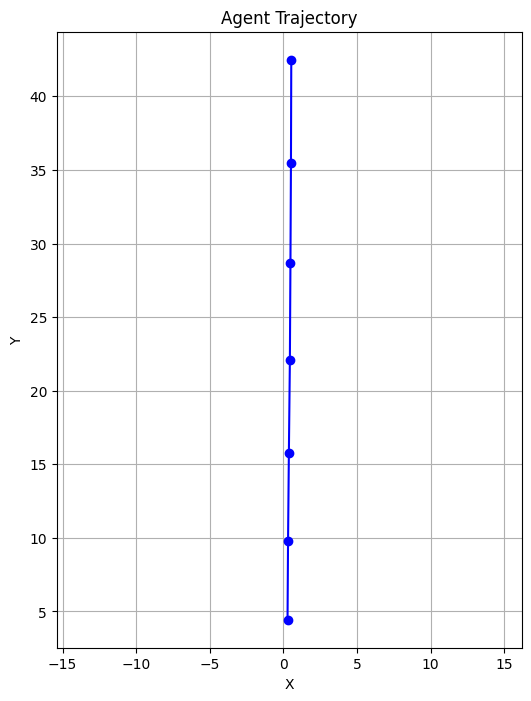

In [1]:
import matplotlib.pyplot as plt

# 给定的轨迹点
trajectory = [
    [0.2805604934692383, 4.436042785644531],
    [0.3152260147035122, 9.790242195129395],
    [0.37199003249406815, 15.782688617706299],
    [0.44002850353717804, 22.081027030944824],
    [0.47804419323801994, 28.675652980804443],
    [0.5132929496467113, 35.4984917640686],
    [0.5344606302678585, 42.487759590148926]
]

# 拆分 x 和 y 坐标
x = [point[0] for point in trajectory]
y = [point[1] for point in trajectory]

# 画图
plt.figure(figsize=(6, 8))
plt.plot(x, y, marker='o', linestyle='-', color='blue')
plt.title('Agent Trajectory')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')  # 保持比例
plt.show()


In [10]:
import matplotlib.pyplot as plt
import json
from collections import defaultdict
import numpy as np
import os
from glob import glob

def plot_agent_trajectories_with_mean(json_path, save_dir):
    # 加载数据
    data = load_json_file(json_path)

    # 获取文件名（不含扩展名）作为保存名
    file_base = os.path.splitext(os.path.basename(json_path))[0]
    save_name = f"{file_base}_mean_trajectories.png"

    # 分组收集轨迹
    agent_trajectories = defaultdict(list)
    for entry in data:
        pos_key = tuple(entry['agent_position'])  # 使用tuple作为key
        agent_trajectories[pos_key].append(entry['trajectory'])

    # 可视化
    plt.figure(figsize=(10, 8))

    for idx, (pos_key, traj_list) in enumerate(agent_trajectories.items()):
        traj_array = np.array(traj_list)  # shape: (num_traj, num_points, 2)

        # 跳过长度不一致的轨迹组
        if not all(len(traj) == len(traj_list[0]) for traj in traj_list):
            print(f"Warning: Skipping agent {idx} due to inconsistent trajectory lengths.")
            continue

        # 计算均值轨迹
        mean_traj = np.mean(traj_array, axis=0)

        # 画原始轨迹
        for traj in traj_list:
            traj = np.array(traj)
            plt.plot(traj[:, 0], traj[:, 1], linestyle='--', alpha=0.4, color=f"C{idx}")

        # 画均值轨迹
        plt.plot(mean_traj[:, 0], mean_traj[:, 1], label=f'Agent {idx} Trend', linewidth=2.5, color=f"C{idx}")

    plt.title("Agent Trajectories with Mean Trend")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.tight_layout()

    # 创建保存目录
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, save_name)
    plt.savefig(save_path)
    plt.close()
    print(f"Trajectory plot saved to: {save_path}")

def process_all_json_in_directory(input_dir, save_dir):
    json_files = sorted(glob(os.path.join(input_dir, "*.json")))
    print(f"Found {len(json_files)} JSON files in {input_dir}")
    for json_path in json_files:
        plot_agent_trajectories_with_mean(json_path, save_dir)

process_all_json_in_directory(
    input_dir="/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40/predict",
    save_dir="/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40/predict_plots"
)

Found 83 JSON files in /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40/predict
Trajectory plot saved to: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40/predict_plots/0000_mean_trajectories.png
Trajectory plot saved to: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40/predict_plots/0001_mean_trajectories.png
Trajectory plot saved to: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40/predict_plots/0002_mean_trajectories.png
Trajectory plot saved to: /bdata/usrdata/zjx/monitor

In [ ]:
import matplotlib.pyplot as plt
import json
from collections import defaultdict
import numpy as np
import os
from glob import glob

def plot_agent_trajectories_with_mean(json_path, save_dir):
    # 加载数据
    data = load_json_file(json_path)

    # 获取文件名（不含扩展名）作为保存名
    file_base = os.path.splitext(os.path.basename(json_path))[0]
    save_name = f"{file_base}_mean_trajectories.png"

    # 通过 agent_position 分组（转换为 tuple 作为 key）
    agent_trajectories = defaultdict(list)

    for entry in data:
        pos_key = tuple(entry['agent_position'])  # 使用tuple作为key
        agent_trajectories[pos_key].append(entry['trajectory'])

    # 可视化每个 agent 的6条轨迹
    plt.figure(figsize=(10, 8))

    for i, (agent_pos, trajectories) in enumerate(agent_trajectories.items()):
        for j, traj in enumerate(trajectories):
            x = [p[0] for p in traj]
            y = [p[1] for p in traj]
            plt.plot(x, y, marker='o', label=f'Agent {i+1} - Traj {j+1}')

        # 画出agent起点
        plt.scatter(agent_pos[0], agent_pos[1], color='black', s=80, marker='x', label=f'Agent {i+1} Start')

    plt.title("Trajectories per Agent (6 each)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    # plt.show()

    # 创建保存目录
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, save_name)
    plt.savefig(save_path)
    plt.close()
    print(f"Trajectory plot saved to: {save_path}")

def process_all_json_in_directory(input_dir, save_dir):
    json_files = sorted(glob(os.path.join(input_dir, "*.json")))
    print(f"Found {len(json_files)} JSON files in {input_dir}")
    for json_path in json_files:
        plot_agent_trajectories_with_mean(json_path, save_dir)

process_all_json_in_directory(
    input_dir="/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40/predict",
    save_dir="/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40/predict_plots"
)

In [12]:
import shutil
import os

def copy_folder(src_folder, dst_folder):
    # 检查源文件夹是否存在
    if not os.path.exists(src_folder):
        print(f"源文件夹不存在: {src_folder}")
        return

    # 确保目标父文件夹存在
    os.makedirs(dst_folder, exist_ok=True)

    # 获取源文件夹名称
    folder_name = os.path.basename(os.path.normpath(src_folder))
    dst_path = os.path.join(dst_folder, folder_name)

    # 执行复制
    try:
        shutil.copytree(src_folder, dst_path)
        print(f"已成功复制 {src_folder} 到 {dst_path}")
    except FileExistsError:
        print(f"目标文件夹已存在: {dst_path}")
    except Exception as e:
        print(f"复制过程中出现错误: {e}")

# 示例使用方式
src = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_14_10_14"
dst = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new"

copy_folder(src, dst)

已成功复制 /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_14_10_14 到 /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_14_10_14


In [ ]:
import os

def rename_result_folders(root_dir):
    for subdir in os.listdir(root_dir):
        subdir_path = os.path.join(root_dir, subdir)
        if os.path.isdir(subdir_path):
            result_path = os.path.join(subdir_path, "result_graph_risk_2")
            new_result_path = os.path.join(subdir_path, "result_scene")
            if os.path.exists(result_path) and os.path.isdir(result_path):
                os.rename(result_path, new_result_path)
                print(f"Renamed: {result_path} -> {new_result_path}")
            else:
                print(f"No 'result' folder in {subdir_path}")

# 使用方法：替换为你的实际目录
root_folder = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge"
rename_result_folders(root_folder)

Renamed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_16_07_58/result -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_16_07_58/result_with_lane_angle_risk_2
Renamed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_14_30_35/result -> /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_14_30_35/result_with_lane_angle_risk_2
Renamed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_ju

In [71]:
from collections import defaultdict
import os
import json

def process_trajectory_folder(trajectory_root):
    agents_dir = os.path.join(trajectory_root, "predict")
    npcs_dir = os.path.join(trajectory_root, "record")
    output_dir = npcs_dir  # 结果输出到record目录中

    if not os.path.exists(agents_dir) or not os.path.exists(npcs_dir):
        return False  # 跳过无效目录

    # 获取所有帧文件名，按帧编号排序
    agent_files = sorted([f for f in os.listdir(agents_dir) if f.endswith('.json')])
    npc_files = sorted([f for f in os.listdir(npcs_dir) if f.endswith('.json') and "_visible" not in f and "_true" not in f])

    if not agent_files or not npc_files:
        return False

    # 加载所有帧
    all_frames_agent_data = []
    all_frames_npc_data = []

    for afile, nfile in zip(agent_files, npc_files):
        with open(os.path.join(agents_dir, afile), 'r') as fa:
            agent_data = json.load(fa)
            all_frames_agent_data.append(agent_data)

        with open(os.path.join(npcs_dir, nfile), 'r') as fn:
            npc_data = json.load(fn)
            all_frames_npc_data.append(npc_data)

    # 匹配处理
    npc_trajectory_dict = defaultdict(lambda: {"agent_positions": [], "npc_angles": []})

    for frame_idx, (agent_data, npc_data) in enumerate(zip(all_frames_agent_data, all_frames_npc_data)):
        # 每6个agent为一组
        agent_groups = []
        for i in range(0, len(agent_data), 6):
            pos = agent_data[i]["agent_position"][:2]
            agent_groups.append({'id': i // 6, 'pos': pos})

        npc_list = []
        npc_angles_map = {}
        for npc_name, npc_info in npc_data.items():
            if npc_name == "ego_vehicle":
                continue
            x = npc_info["lateral_distance"]
            y = npc_info["longitudinal_distance"]
            angle = npc_info["lane_angle"]
            npc_list.append({'name': npc_name, 'rel_pos': [x, y], 'angle': angle})
            npc_angles_map[npc_name] = angle

        # 匹配参数
        TOP_K = 3
        MAX_LAT_ERROR = 3.0
        MAX_LONG_ERROR = 5.0
        used_npc_names = set()

        npc_frame_result = {}
        for agent in agent_groups:
            ax, ay = agent['pos']
            npc_sorted_by_lat = sorted(npc_list, key=lambda npc: abs(ax - npc['rel_pos'][0]))
            best_match = None
            min_long_error = float('inf')

            for npc in npc_sorted_by_lat[:TOP_K]:
                if npc['name'] in used_npc_names:
                    continue
                nx, ny = npc['rel_pos']
                lat_error = abs(ax - nx)
                long_error = abs(ay - ny)
                if lat_error > MAX_LAT_ERROR or long_error > MAX_LONG_ERROR:
                    continue
                if long_error < min_long_error:
                    min_long_error = long_error
                    best_match = npc

            if best_match:
                used_npc_names.add(best_match['name'])
                npc_name = best_match['name']
                npc_trajectory_dict[npc_name]["agent_positions"].append(agent['pos'])
                npc_trajectory_dict[npc_name]["npc_angles"].append(npc_angles_map[npc_name])
                npc_frame_result[npc_name] = {
                    "agent_position": agent['pos'],
                    "npc_angle": npc_angles_map[npc_name]
                }

        # 保存每帧匹配结果
        frame_filename = f"{frame_idx:04d}_true.json"
        frame_output_path = os.path.join(output_dir, frame_filename)
        with open(frame_output_path, 'w') as f:
            json.dump(npc_frame_result, f, indent=2)

    # 保存所有帧的 npc-agent 轨迹
    trajectory_path = os.path.join(trajectory_root, "npc_agent_trajectories.json")
    with open(trajectory_path, "w") as f:
        json.dump(npc_trajectory_dict, f, indent=4)

    print(f"Processed: {trajectory_root}")
    return True

def batch_process_all_folders(root_dir):
    for folder_name in sorted(os.listdir(root_dir)):
        folder_path = os.path.join(root_dir, folder_name)
        if not os.path.isdir(folder_path):
            continue
        process_trajectory_folder(folder_path)

# 执行入口
root_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision"
batch_process_all_folders(root_path)

Processed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40
Processed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_28_11
Processed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_47_38
Processed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_02_02_30
Processed: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_02_53_04
Processed: /bdata/usrdata/zjx/monitor_test/Bench2D

In [70]:
#筛选场景，感知正确的场景
import os
import json

def load_json_file(path):
    with open(path, 'r') as f:
        return json.load(f)

def save_json_file(data, path):
    with open(path, 'w') as f:
        json.dump(data, f, indent=2)

def filter_npcs_by_longitudinal_distance(json_data):
    """
    过滤掉所有非 ego_vehicle 且 longitudinal_distance <= -1 的键值对
    """
    new_data = {}
    for key, value in json_data.items():
        if key == "ego_vehicle":
            continue
        else:
            longitudinal_distance = value.get("longitudinal_distance")
            if longitudinal_distance is not None and longitudinal_distance > -1:
                new_data[key] = value
    return new_data

def process_all_json_files(input_folder):
    """
    遍历指定文件夹，处理所有 JSON 文件，并生成带 `_change.json` 的新文件
    """
    for filename in os.listdir(input_folder):
        if filename.endswith(".json") and not filename.endswith("_true.json"):
            file_path = os.path.join(input_folder, filename)
            try:
                json_data = load_json_file(file_path)
                new_json_data = filter_npcs_by_longitudinal_distance(json_data)

                new_filename = filename.replace(".json", "_visible.json")
                new_file_path = os.path.join(input_folder, new_filename)
                save_json_file(new_json_data, new_file_path)

                print(f"Processed: {filename} → {new_filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

def process_all_scenarios(base_folder):
    """
    遍历 base_folder 下所有子目录中的 record 文件夹并处理 JSON 文件
    """
    for scenario_dir in sorted(os.listdir(base_folder)):
        scenario_path = os.path.join(base_folder, scenario_dir)
        record_path = os.path.join(scenario_path, "record")
        if os.path.isdir(record_path):
            print(f"\nProcessing scenario: {scenario_dir}")
            process_all_json_files(record_path)

# 执行入口
base_folder = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision"
process_all_scenarios(base_folder)


Processing scenario: get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40
Processed: 0082.json → 0082_visible.json
Processed: 0002.json → 0002_visible.json
Processed: 0040.json → 0040_visible.json
Processed: 0066.json → 0066_visible.json
Processed: 0053.json → 0053_visible.json
Processed: 0011.json → 0011_visible.json
Processed: 0076.json → 0076_visible.json
Processed: 0049.json → 0049_visible.json
Processed: 0037.json → 0037_visible.json
Processed: 0058.json → 0058_visible.json
Processed: 0014.json → 0014_visible.json
Processed: 0069.json → 0069_visible.json
Processed: 0064.json → 0064_visible.json
Processed: 0068.json → 0068_visible.json
Processed: 0035.json → 0035_visible.json
Processed: 0063.json → 0063_visible.json
Processed: 0000.json → 0000_visible.json
Processed: 0079.json → 0079_visible.json
Processed: 0073.json → 0073_visible.json
Processed: 0054.json → 0054_visible.json
Processed: 0047.json → 0047_visible.json
Processed: 0081.json 

In [119]:
import os
import json
import shutil
def check_last_visible_file(root_dir):
    """
    遍历所有子文件夹，检查每个子文件夹的record文件夹中
    排序后的最后一个_visbile.json是否为空，如果为空，则打印子文件夹名称
    """
    for folder_name in sorted(os.listdir(root_dir)):
        folder_path = os.path.join(root_dir, folder_name)
        if not os.path.isdir(folder_path):
            continue  # 跳过非文件夹

        record_dir = os.path.join(folder_path, "record")
        if not os.path.exists(record_dir):
            continue  # 跳过没有record文件夹的文件夹

        # 获取所有_visbile.json文件，并按文件名排序
        visible_files = sorted([f for f in os.listdir(record_dir) if f.endswith("_visible.json")])

        if visible_files:
            # 获取最后一个文件的路径
            last_visible_file = os.path.join(record_dir, visible_files[-1])

            # 读取该文件的内容
            with open(last_visible_file, 'r') as f:
                visible_data = json.load(f)

            # 如果文件为空，打印该子文件夹名称
            if not visible_data:
                print(f"Empty last visible file in folder: {folder_name}")
                shutil.rmtree(folder_path)  # 删除该文件夹及其内容

# 设置根目录路径
base_root = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision"

# 执行检查
check_last_visible_file(base_root)


Empty last visible file in folder: get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40
Empty last visible file in folder: get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_04_56_20
Empty last visible file in folder: get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_06_36_26
Empty last visible file in folder: get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_06_48_52
Empty last visible file in folder: get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_07_45_53
Empty last visible file in folder: get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_09_32_39
Empty last visible file in folder: get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_09_44_51
Empty last visible file in folder: get_route_1792_2_vad_traj_RouteScenario_1792_rep

In [122]:
import os
import json

def find_missing_npcs(trajectory_root):
    visible_dir = os.path.join(trajectory_root, "record")
    true_suffix = "_true.json"
    visible_suffix = "_visible.json"

    missing_frames = []

    for filename in sorted(os.listdir(visible_dir)):
        if not filename.endswith(visible_suffix):
            continue

        frame_prefix = filename.replace(visible_suffix, "")
        true_filename = f"{frame_prefix}{true_suffix}"

        visible_path = os.path.join(visible_dir, filename)
        true_path = os.path.join(visible_dir, true_filename)
        # 如果true文件不存在，认为是缺失
        if not os.path.exists(true_path):
            missing_frames.append(frame_prefix)
            continue

        # 读取 visible 中的 NPC（排除 ego_vehicle）
        with open(visible_path, 'r') as f:
            visible_data = json.load(f)
        visible_npcs = [name for name in visible_data if name != "ego_vehicle"]

        # 读取 true 中的 NPC
        with open(true_path, 'r') as f:
            true_data = json.load(f)
        true_npcs = list(true_data.keys())
        # 如果 visible_npcs 比 true_npcs 多，说明有缺失
        if len(visible_npcs) > len(true_npcs):
            missing_frames.append(frame_prefix)

    return missing_frames

def check_all_trajectories(root_dir):
    ture_frame_list = []
    print(len(sorted(os.listdir(root_dir))))
    for folder_name in sorted(os.listdir(root_dir)):
        folder_path = os.path.join(root_dir, folder_name)
        if not os.path.isdir(folder_path):
            continue  # 跳过非文件夹

        missing_frames = find_missing_npcs(folder_path)
        if not missing_frames: 
            ture_frame_list.append(folder_name)
            print("zjx1",folder_name)
                # print(folder_name)
                # print(missing_frames)
            # print(f"Folder with missing NPCs: {folder_name}")
            # print(f"  → Missing frames: {missing_frames}")
        else:
            if len(missing_frames) <= 1:
                ture_frame_list.append(folder_name)
    return ture_frame_list

def delete_other_folders(root_dir, keep_list):
    for folder_name in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder_name)
        if os.path.isdir(folder_path) and folder_name not in keep_list:
            shutil.rmtree(folder_path)

base_root = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new"

ture_frame_list = check_all_trajectories(base_root)
print(ture_frame_list)
# # 删除非保留文件夹
delete_other_folders(base_root, ture_frame_list)


19
zjx1 get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_02_02_30
zjx1 get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_02_53_04
zjx1 get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_05_52_58
zjx1 get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_05_59_33
zjx1 get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_12_22_46
zjx1 get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_13_15_10
zjx1 get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_13_56_18
zjx1 get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_18_53_06
zjx1 get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_12_22_52
zjx1 get_route_1792_center_1_vad_traj_RouteScenario_1

In [ ]:
#计算预测错误
import os
import json
import math
def load_json_file(file_path):
    """加载JSON文件"""
    with open(file_path, 'r') as f:
        return json.load(f)

def get_predict_file_list(predict_dir):
    """返回排序后的predict帧文件名列表"""
    return sorted([f for f in os.listdir(predict_dir) if f.endswith('.json')])

# def extract_npc_trajectory_at_indices(visible_npcs_in_m, visible_npcs_in_n, true_npcs_in_m, true_npcs_in_n, true_npcs_in_m_data, true_npcs_in_n_data):
#     npcs_in_m = set(visible_npcs_in_m) & set(true_npcs_in_m)
#     npcs_in_n = set(visible_npcs_in_n) & set(true_npcs_in_n)

#     """提取指定帧m、n的agent_positions"""
#     result = {}

#     # 处理第m帧的agent_position
#     for npc, traj in true_npcs_in_m_data.items():
#         if npc in npcs_in_m:
#             if npc not in result:
#                 result[npc] = {}
#             result[npc]["agent_position_at_m"] = traj.get("agent_position", None)
#             result[npc]["lane_angle_at_m"] = traj.get("npc_angle", None)

#     # 处理第n帧的agent_position
#     for npc, traj in true_npcs_in_n_data.items():
#         if npc in npcs_in_n:
#             if npc not in result:
#                 result[npc] = {}
#             result[npc]["agent_position_at_n"] = traj.get("agent_position", None)
#             result[npc]["lane_angle_at_n"] = traj.get("npc_angle", None)

#     return result

def extract_npc_trajectory_at_indices(visible_npcs_in_m, visible_npcs_in_n, true_npcs_in_m, true_npcs_in_n, true_npcs_in_m_data, true_npcs_in_n_data):
    npcs_true = set(true_npcs_in_m) & set(true_npcs_in_n) & set(visible_npcs_in_m) & set(visible_npcs_in_n) 

    """提取指定帧m、n的agent_positions"""
    result = {}

    # 处理第m帧的agent_position
    for npc, traj in true_npcs_in_m_data.items():
        if npc in npcs_true:
            if npc not in result:
                result[npc] = {}
            result[npc]["agent_position_at_m"] = traj.get("agent_position", None)
            result[npc]["lane_angle_at_m"] = traj.get("npc_angle", None)

    # 处理第n帧的agent_position
    for npc, traj in true_npcs_in_n_data.items():
        if npc in npcs_true:
            if npc not in result:
                result[npc] = {}
            result[npc]["agent_position_at_n"] = traj.get("agent_position", None)
            result[npc]["lane_angle_at_n"] = traj.get("npc_angle", None)

    return result

def load_npcs(file_path):
    npc_list = []
    data = load_json_file(file_path)
    for npc_name in data:
        npc_list.append(npc_name)
    return npc_list


def find_trajectories_for_npcs(pos_n, trajectory_list, tolerance=0.2):
    """
    根据每个NPC的agent_position_at_m，在trajectory_list中匹配agent_position，
    """
    matched_npc_trajectories = []
    x_m, y_m = pos_n[:2]

    # 遍历 trajectory_list 匹配
    matched = False
    index = 0
    for traj_entry in trajectory_list:
        index += 1
        agent_pos = traj_entry.get("agent_position", [])
        if len(agent_pos) < 2:
            continue

        x_t, y_t = agent_pos[:2]

        # 使用简单欧几里得距离进行容差匹配
        if abs(x_m - x_t) <= tolerance and abs(y_m - y_t) <= tolerance:
            trajectory = traj_entry.get("trajectory", [])
            matched_npc_trajectories.append(trajectory)

    # print(index)
    return matched_npc_trajectories

def calculate_angle_with_y_axis(p1, p2):
    """
    计算从p1到p2的方向与y轴正方向的夹角（单位：度）
    """
    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]
    magnitude = math.hypot(dx, dy)
    if magnitude == 0:
        return 0  # 没有移动

    dot_product = dy  # 向量 (dx, dy) · (0, 1) = dy
    cos_theta = dot_product / magnitude
    angle_rad = math.acos(max(min(cos_theta, 1), -1))  # 防止数值误差
    angle_deg = math.degrees(angle_rad)
    return angle_deg

import math

def calculate_angle_with_y_axis(p1, p2):
    """
    计算向量与y轴正方向的夹角（单位：度）
    """
    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]
    if dy == 0:
        return 90.0
    angle = math.degrees(math.atan(abs(dx) / abs(dy)))
    return angle

def has_lane_change(trajectories, min_angle=0.5):
    """
    判断是否存在变道行为，并返回方向："left", "right", "none"
    """
    for trajectory in trajectories:
        if len(trajectory) < 2:
            continue
        p1 = trajectory[0]
        p2 = trajectory[-1]
        angle = calculate_angle_with_y_axis(p1, p2)  # 保留原始角度计算
        dx = p2[0] - p1[0]

        if angle > min_angle:
            if dx > 0:
                return "right"
            elif dx < 0:
                return "left"
    return "none"


def process_single_folder(folder_path, m, n):
    """
    处理单个轨迹目录：
    - 验证有效性
    - 加载指定帧数据
    - 返回包含trajectory与predict信息的结果
    """
    trajectory_file = os.path.join(folder_path, "npc_agent_trajectories.json")
    predict_dir = os.path.join(folder_path, "predict")
    record_dir = os.path.join(folder_path,"record")
    visible_suffix = "_visible.json"
    true_suffix = "_true.json"
    visible_frames = []
    true_frames = []

    for filename in sorted(os.listdir(record_dir)):
        if not filename.endswith(visible_suffix):
            continue
        else: 
            path = os.path.join(record_dir, filename)
            visible_frames.append(path)
    visible_frames = sorted(visible_frames)

    for filename in sorted(os.listdir(record_dir)):
        if not filename.endswith(true_suffix):
            continue
        else: 
            path = os.path.join(record_dir, filename)
            true_frames.append(path)
    true_frames = sorted(true_frames)

    predict_files = get_predict_file_list(predict_dir)
    predict_file_m = os.path.join(predict_dir, predict_files[m])
    predict_file_n = os.path.join(predict_dir, predict_files[n])
    predict_count = len(predict_files)

    if m >= predict_count or n >= predict_count:
        return None
    
    # 加载数据
    visible_npcs_in_m = load_npcs(visible_frames[m])
    visible_npcs_in_n = load_npcs(visible_frames[n])
    true_npcs_in_m = load_npcs(true_frames[m])
    true_npcs_in_n = load_npcs(true_frames[n])
    true_npcs_in_m_data = load_json_file(true_frames[m])
    true_npcs_in_n_data = load_json_file(true_frames[n])
    predict_data_m = load_json_file(predict_file_m)
    predict_data_n = load_json_file(predict_file_n)
    npc_positions = extract_npc_trajectory_at_indices(visible_npcs_in_m, visible_npcs_in_n, true_npcs_in_m, true_npcs_in_n, true_npcs_in_m_data, true_npcs_in_n_data)
    # 加载第 m 和 n 帧 predict 数据
    for npc_name, npc_info in npc_positions.items():
        position_m = npc_info.get("agent_position_at_m")
        position_n = npc_info.get("agent_position_at_n")
        trajectories_m = find_trajectories_for_npcs(position_m, predict_data_m, tolerance=0.2)
        trajectories_n = find_trajectories_for_npcs(position_n, predict_data_n, tolerance=0.2)
        npc_info["position_m"] = trajectories_m
        npc_info["position_n"] = trajectories_n
        # 判断是否变道
        lane_change_m = has_lane_change(trajectories_m, min_angle=1)
        lane_change_n = has_lane_change(trajectories_n, min_angle=1)
        npc_info["lane_change_pass"] = lane_change_m
        npc_info["lane_change_now"] = lane_change_n
    return npc_positions

def predict_action_folders(root_dir, m, n):
    """
    遍历根目录下所有子文件夹，批量提取有效轨迹结果
    """
    all_results = []
    for subfolder in sorted(os.listdir(root_dir)):
        folder_path = os.path.join(root_dir, subfolder)
        if not os.path.isdir(folder_path):
            continue
        result = process_single_folder(folder_path, m, n)
        # if result is not None:
        #     print(folder_path)
        #     print_result_summary(result, m, n)
    return all_results

def print_result_summary(results, m, n):
    """
    简要打印结果：NPC轨迹的第m和n帧位置
    """
    for npc, pos in results.items():
        print(f"  NPC: {npc}")
        print(f" Predict action at m={m}: {pos['lane_change_pass']}")
        print(f" Predict action at n={n}: {pos['lane_change_now']}")
    print("-" * 40)

root_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new"
m = 0
n = 3

results = predict_action_folders(root_path, m, n)
print(results)


[]


In [41]:
pair = {"dangerous_npc":["NPC1", "NPC2"]}
raw_dangerous_npc = pair.get("dangerous_npc", [])
dangerous_npc_list = []
if isinstance(raw_dangerous_npc, str):
    dangerous_npc_list = [npc.strip() for npc in raw_dangerous_npc.split(",")]
elif isinstance(raw_dangerous_npc, list):
    for item in raw_dangerous_npc:
        if isinstance(item, str) and "," in item:
            # 列表中是像 "NPC1, NPC2" 这样的元素，继续拆分
            dangerous_npc_list.extend([npc.strip() for npc in item.split(",")])
        else:
            dangerous_npc_list.append(item)
for idx, dangerous_npc in enumerate(dangerous_npc_list):
    print(dangerous_npc)
    npc_id = int(dangerous_npc[3:]) - 1


NPC1
NPC2


In [246]:
base_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_13_15_10"
current_frame = 34
process_single_folder(base_path, current_frame -5, current_frame)

{'npc1': {'agent_position_at_m': [-3.469740867614746, 5.003669738769531],
  'lane_angle_at_m': 3.54632568359375,
  'agent_position_at_n': [-2.9469985961914062, 5.578094482421875],
  'lane_angle_at_n': 14.575119018554688,
  'position_m': [[[-3.469740867614746, 5.003669738769531],
    [-3.43768023326993, 7.6104583740234375],
    [-3.3824927285313606, 11.042040824890137],
    [-3.329719614237547, 14.975638151168823],
    [-3.265755970031023, 18.993149995803833],
    [-3.2114178501069546, 23.064173936843872],
    [-3.1529678367078304, 27.24515700340271]],
   [[-3.469740867614746, 5.003669738769531],
    [-3.460173163563013, 6.5775710344314575],
    [-3.440677650272846, 8.974440693855286],
    [-3.414202746003866, 12.105287432670593],
    [-3.385034427046776, 15.589288115501404],
    [-3.3600430861115456, 19.17981731891632],
    [-3.3406905978918076, 22.786558985710144]],
   [[-3.469740867614746, 5.003669738769531],
    [-3.4521274380385876, 6.35848867893219],
    [-3.444231979548931, 7.851

In [31]:
#信任度切换
def action_judge(predict_npcs, base_path, current_frame):
    """
    比较VLM预测与实际变道方向是否一致。实际变道方向通过 lane_angle 判断。
    predict_npcs 格式: {npc1: "left"/"right"/"none"}
    """
    id = f"{(current_frame - 5):04d}"
    file_path = os.path.join(base_path, 'record', f"{id}.json")
    actual_npc_action = load_json_file(file_path)

    actual_npcs = {}
    for npc, npc_data in actual_npc_action.items():
        if npc == "ego_vehicle":
            continue
        angle = npc_data.get("lane_angle", 0)
        if angle > 1:
            actual_npcs[npc] = "right"
        elif angle < -1:
            actual_npcs[npc] = "left"
        else:
            actual_npcs[npc] = "none"

    # 判断每个NPC的预测是否与实际一致
    for npc, pred_dir in predict_npcs.items():
        actual_dir = actual_npcs.get(npc, None)
        if actual_dir is None or pred_dir != actual_dir:
            return False

    return True

dir_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new"
dir_list = sorted(os.listdir(dir_path))
tp,tn,fp,fn = 0, 0, 0, 0
total = 0
tp_list = []
for dir_index in range(len(dir_list)):
    name = dir_list[dir_index]
    base_path = os.path.join(dir_path, name)
    # print(base_path)
    record_dir = os.path.join(base_path, 'record/')
    key_frames = find_key_frames(record_dir)
    key_frames = key_frames[:-1]
    total += len(key_frames)
    # print(key_frames)
    flag = False
    last_judge = -1
    for id_frame in range(0, len(key_frames)):
        current_frame = int(os.path.splitext(key_frames[id_frame])[0])
        # print(current_frame)
        result = process_single_folder(base_path, current_frame -5, current_frame)
        # print(result)
        npc_predict = {npc: pos["lane_change_pass"] for npc, pos in result.items()}
        # print(npc_predict)
        # 当前帧是否第一帧 / 最后一帧
        is_first = (id_frame == 0)
        is_last = (id_frame == len(key_frames) - 1)
        is_gap_valid = (
            id_frame > 0 and 
            int(os.path.splitext(key_frames[id_frame])[0]) - int(os.path.splitext(key_frames[id_frame - 1])[0]) == 5
        )
        is_gap_no_valid = (id_frame > 0 and 
            int(os.path.splitext(key_frames[id_frame])[0]) - int(os.path.splitext(key_frames[id_frame - 1])[0]) != 5)
        # 1. 只有一帧（既是第一帧也是最后一帧）
        id = f"{current_frame:04d}"
        result_path = os.path.join(base_path, 'result', f"{id}.txt")
        score, dangerous_npc = get_fp_collision(result_path)\
        
        if is_first and is_last:
            if score == 0:
                tp += 1
                tp_list.append(result_path)
            elif score == 1 :
                tn += 1
        # 2. 第一帧（且不是最后第一帧）
        elif is_first and not is_last:
            if score == 0:
                fp += 1
                flag = False
                last_judge = 0
            elif score == 1 :
                fn += 1 
                flag = True
                last_judge = 1
        # 3. 不是第一帧（已经进入危险区域,且跟上一帧是连续的,且是最后一帧）
        elif is_gap_valid and is_last:
            if last_judge == score:#如果两次的判断结果相同则信任VLM
                if score == 0:
                    tp += 1
                    tp_list.append(result_path)
                elif score == 1:
                    tn += 1
            elif (action_judge(npc_predict,base_path,current_frame) and flag) or (not action_judge(npc_predict,base_path,current_frame) and flag) or (not action_judge(npc_predict,base_path,current_frame) and not flag):#上一时刻,两者都正确,或者ADS错误,VLM正确,或者都错误,则信任VLM
                if score == 0:
                    # print("zjx",base_path)
                    tp += 1
                    tp_list.append(result_path)
                elif score == 1:
                    tn += 1
            else:
                tn += 1
        # 4. 不是第一帧（已经进入危险区域,且跟上一帧是连续的,且不是最后一帧）
        elif is_gap_valid and not is_last:
            if last_judge == score:#如果两次的判断结果相同则信任VLM
                if score == 0:
                    fp += 1
                    flag = False
                elif score == 1:
                    fn += 1
                    flag = True
            elif (action_judge(npc_predict,base_path,current_frame) and flag) or (not action_judge(npc_predict,base_path,current_frame) and flag) or (not action_judge(npc_predict,base_path,current_frame) and not flag):#上一时刻,两者都正确,或者ADS错误,VLM正确,或者都错误,则信任VLM
                if score == 0:
                    fp += 1
                    flag = False
                    last_judge = 0
                elif score == 1:
                    fn += 1
                    flag = True
                    last_judge = 1
            else:
                print("zjx", score)
                fn += 1
                if score == 0:
                    flag = False
                    last_judge = 0
                elif score == 1:
                    flag = True
                    last_judge = 1
        # 5. 间隔不为5（重新进入危险区域,并且不是最后一帧）
        elif is_gap_no_valid and not is_last:
            if score == 0:
                fp += 1
                flag = False
                last_judge = 0
            elif score == 1:
                fn += 1
                flag = True
                last_judge = 1
        # 6. 间隔不为5（重新进入危险区域,并且是最后一帧）
        elif not is_gap_valid and is_last:
            if score == 0:
                tp += 1
                tp_list.append(result_path)
            elif score == 1:
                tn += 1

        # print("zjx", action_judge(npc_predict,base_path,current_frame), current_frame, flag)
        # print(f"tp: {tp}, tn: {tn}, fp: {fp}, fn: {fn}, total: {total}")
for tp_file in tp_list:
    print(tp_file)
print(f"tp: {tp}, tn: {tn}, fp: {fp}, fn: {fn}, total: {total}")

zjx 1
zjx 1
zjx 1
zjx 1
zjx 1
zjx 1
zjx 1
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_02_53_04/result/0088.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_05_59_33/result/0092.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_13_15_10/result/0079.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_15_58_45/result/0083.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town

In [231]:
dir_path = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3"
dir_list = sorted(os.listdir(dir_path))
tp,tn,fp,fn = 0,0,0,0
tn_list = []
f_number = 0
f_list = [0]*10
t_number = 0
t_list = [0]*10
for dir_index in range(len(dir_list)):
    name = dir_list[dir_index]
    base_path = os.path.join(dir_path, name)
    record_dir = os.path.join(base_path, 'record/')
    key_frames = find_key_frames(record_dir)
    # key_frames = key_frames[:-1]
    # print(key_frames)
    for id_frame in range(0, len(key_frames)):
        current_frame = int(os.path.splitext(key_frames[id_frame])[0])
        # 保存结果文本
        id = f"{current_frame:04d}"
        result_path = os.path.join(base_path, 'result', f"{id}.txt")
        score, dangerous_npc = get_fp_collision(result_path)
        # if score != 0 and score != 1:
        #      print(f"Invalid score: {score} in {result_path}")
        if id_frame == len(key_frames) - 1:
            t_number += 1
            if score ==2 or score == 1:
                tn += 1
                tn_list.append(result_path)
            else:
                print(t_number)
                t_list[int(t_number/13.1)] += 1
                tp += 1
        else:
            f_number += 1
            if score ==2 or score == 1:
                fp += 1
            else:
                fn += 1
                f_list[int(f_number / 139)] += 1
for tn_file in tn_list:
    print(tn_file)
print(f"tp: {tp}, tn: {tn}, fp: {fp}, fn: {fn}")
print(f_list)
print(t_list)

1
4
6
7
9
10
13
15
16
19
20
23
24
25
28
29
30
33
34
35
36
39
40
42
45
46
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_27_17_22_24/result/0082.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_27_19_05_05/result/0082.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_27_21_33_50/result/0083.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_3/get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_27_15_14_11/result/0136.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad

23.956834532374103 76.66666666666666 37.12230215827338 74.30434782608697


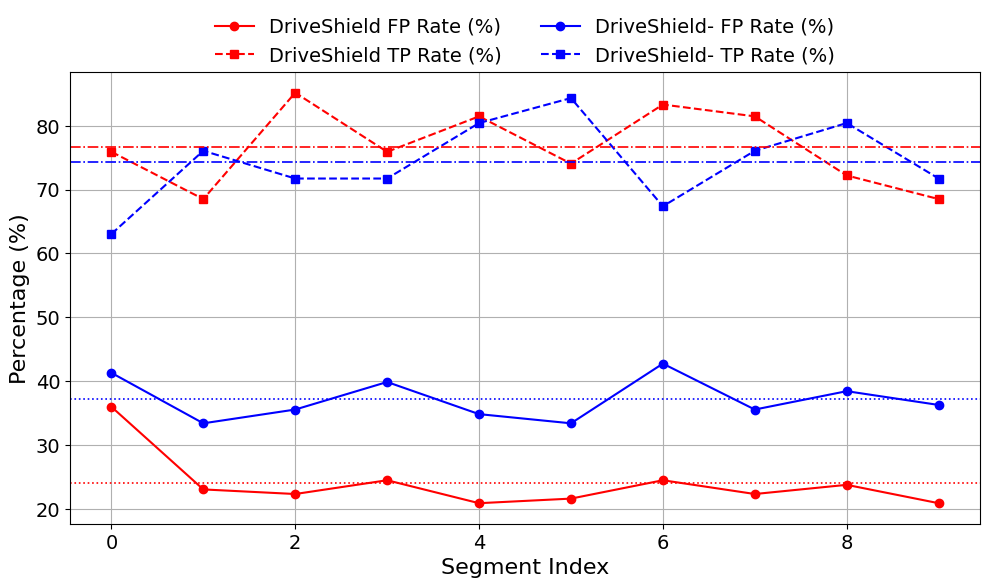

In [319]:
import matplotlib.pyplot as plt

# Tool
f_list = [50, 32, 31, 34, 29, 30, 34, 31, 33, 29]
t_list = [23, 21, 25.5, 23, 24.5, 22.5, 25, 24.5, 22, 21]  # True positives

# Tool-
fz_list = [56, 45, 48, 54, 47, 45, 58, 48, 52, 49]  # False positives Tool-
tz_list = [17, 20,  19, 19, 21, 21.9, 18, 20, 21, 19]  # True positives Tool-

x = list(range(len(f_list)))

# Percent conversion
y = [val / 139 * 100 for val in f_list]            # FP rate Tool
y2 = [(val - 2.5) / 27 * 100 for val in t_list]      # TP rate Tool
z = [(val+1.4) / 139 * 100 for val in fz_list]           # FP rate Tool-
z2 = [(val - 2.5) / 23 * 100 for val in tz_list]     # TP rate Tool-

# Compute averages
avg_y = sum(y) / len(y)
avg_y2 = sum(y2) / len(y2)
avg_z = sum(z) / len(z)
avg_z2 = sum(z2) / len(z2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='r', label='DriveShield FP Rate (%)')
plt.plot(x, y2, marker='s', linestyle='--', color='r', label='DriveShield TP Rate (%)')
plt.plot(x, z, marker='o', linestyle='-', color='b', label='DriveShield- FP Rate (%)')
plt.plot(x, z2, marker='s', linestyle='--', color='b', label='DriveShield- TP Rate (%)')


# # Average lines
# plt.axhline(avg_y, color='r', linestyle=':', linewidth=1.2, label=f'DriveShield Avg FP: {24.07:.2f}%')
# plt.axhline(avg_y2, color='r', linestyle='-.', linewidth=1.2, label=f'DriveShield Avg TP: {74.69:.2f}%')
# plt.axhline(avg_z, color='b', linestyle=':', linewidth=1.2, label=f'DriveShield- Avg FP: {35.75:.2f}%')
# plt.axhline(avg_z2, color='b', linestyle='-.', linewidth=1.2, label=f'DriveShield- Avg TP: {71.91:.2f}%')
# Average lines
plt.axhline(avg_y, color='r', linestyle=':', linewidth=1.2)
plt.axhline(avg_y2, color='r', linestyle='-.', linewidth=1.2)
plt.axhline(avg_z, color='b', linestyle=':', linewidth=1.2)
plt.axhline(avg_z2, color='b', linestyle='-.', linewidth=1.2)
print(avg_y,avg_y2,avg_z,avg_z2)
# Enlarge tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.title('Prediction Accuracy Comparison between DriveShield and DriveShield-', fontsize=14)
plt.xlabel('Segment Index', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.grid(True)

# Horizontal legend at the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.16),
           ncol=2, fontsize=14, frameon=False)

plt.tight_layout()
plt.savefig("prediction_accuracy_comparison.pdf", format='pdf')
plt.show()


/home/zjx/.conda/envs/b2d_zoo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zjx/.conda/envs/b2d_zoo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zjx/.conda/envs/b2d_zoo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zjx/.conda/envs/b2d_zoo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zjx/.conda/envs/b2d_zoo/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-76

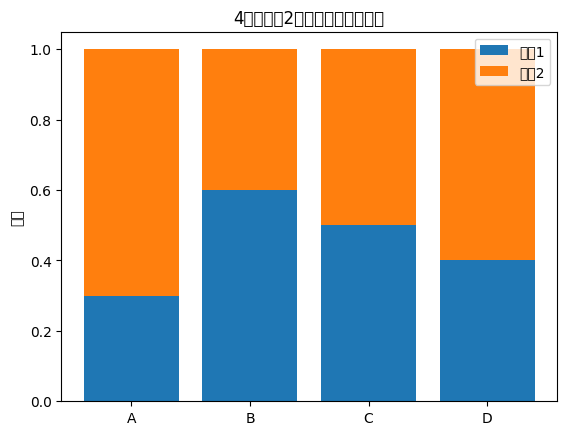

In [292]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['A', 'B', 'C', 'D']

# 每个标签对应两个分类的比率，确保每组加起来是1
category1 = np.array([0.3, 0.6, 0.5, 0.4])
category2 = np.array([0.7, 0.4, 0.5, 0.6])

x = np.arange(len(labels))

plt.bar(x, category1, label='分类1')
plt.bar(x, category2, bottom=category1, label='分类2')

plt.xticks(x, labels)
plt.ylabel('比例')
plt.title('4个标签，2个分类的堆叠柱状图')
plt.legend()

plt.show()


In [144]:
def compute_metrics(tp, fp, fn, tn, beta=3.0):
    # Recall (Re)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    
    # Precision (Pr)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    
    # F-beta score (Fβ)，此处 β = 3
    beta_squared = beta ** 2
    if precision + recall > 0:
        f_beta = (1 + beta_squared) * (precision * recall) / (beta_squared * precision + recall)
    else:
        f_beta = 0.0

    return {
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn,
        'Recall': recall,
        'Precision': precision,
        f'F{int(beta)}': f_beta
    }
tp_graph, fp_graph, fn_graph, tn_graph = 101, 26, 1013, 356 
tp, fp, fn, tn = 167, 31, 1463, 429
metrics = compute_metrics(tp, fp, fn, tn, beta=3.0)

# 输出结果
for k, v in metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")


TP: 167
FP: 31
FN: 1463
TN: 429
Recall: 0.1025
Precision: 0.8434
F3: 0.1123


In [ ]:
def compute_metrics(tp, fp, fn, tn):
    # Recall (Re)
    recall = tp / (tp + fn) 
    
    # Precision (Pr)
    precision = tp / (tp + fp)
    # F1 score
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0.0

    return {
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn,
        'Recall': recall,
        'Precision': precision,
        'F1': f1
    }
tp, fn, tn, fp = 152, 47, 1463, 429
# tp_1,fn_1, fp_1,tn_1 = 90, 37, 1013, 356
# tp_2, fp_2, fn_2, tn_2 = tp+tp_1, fp+fp_1, fn+fn_1, tn+tn_1
metrics = compute_metrics(tp, fp, fn, tn)

# 输出结果
for k, v in metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")


TP: 87
FP: 553
FN: 40
TN: 816
Recall: 0.6850
Precision: 0.1359
F1: 0.2269


In [66]:
import os
import glob

def find_files_with_historical(folder_A):
    matching_files = []

    # 遍历文件夹A下的所有子文件夹
    for subfolder_name in os.listdir(folder_A):
        subfolder_path = os.path.join(folder_A, subfolder_name)
        if os.path.isdir(subfolder_path):
            out_graph_path = os.path.join(subfolder_path, "output_graph")
            if os.path.isdir(out_graph_path):
                # 获取该out_graph文件夹下的所有文件，按文件名排序
                files = sorted(glob.glob(os.path.join(out_graph_path, "*")))
                files = files[:-1]
                for file_path in files:
                    try:
                        with open(file_path, 'r', encoding='utf-8') as f:
                            for line in f:
                                if "a collision happened in reality" in line:
                                    matching_files.append(file_path)
                                    break  # 找到后就跳出循环，避免重复添加
                    except UnicodeDecodeError:
                        print(f"无法解码文件（跳过）: {file_path}")
                    except Exception as e:
                        print(f"读取文件出错: {file_path}, 错误: {e}")
    
    return matching_files

# 示例用法
folder_A = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2"  # 替换为你的实际路径
result = find_files_with_historical(folder_A)

# 输出包含 "[Historical" 的文件路径
print("包含 [Historical 的文件有：")
print("length:", len(result))
for path in result:
    print(path)


包含 [Historical 的文件有：
length: 119
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_17_17_45_46/output_graph/0058.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_18_05_29_40/output_graph/0030.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_3_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_4_None_05_18_03_01_42/output_graph/0034.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_18_00_56_43/output_graph/0063.txt
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_

In [113]:
import os
import glob
import shutil

# 示例用法
folder_A = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2"  # 替换为你的实际路径



# 遍历文件夹A下的所有子文件夹
for subfolder_name in os.listdir(folder_A):
    subfolder_path = os.path.join(folder_A, subfolder_name)
    if os.path.isdir(subfolder_path):
        source_path = os.path.join(subfolder_path, "result_graph")
        target_path = os.path.join(subfolder_path, "result_graph_risk_2")
        
        # 如果原始文件夹存在
        if os.path.exists(source_path):
            # 如果目标文件夹已存在，先删除它以避免冲突
            if os.path.exists(target_path):
                shutil.rmtree(target_path)
            
            # 复制整个文件夹
            shutil.copytree(source_path, target_path)
            print(f"已复制 {source_path} 到 {target_path}")
        else:
            print(f"未找到文件夹: {source_path}")

已复制 /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_17_17_45_46/result_graph 到 /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_17_17_45_46/result_graph_risk_2
已复制 /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_18_05_29_40/result_graph 到 /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_18_05_29_40/result_graph_risk_2
已复制 /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_3_va

In [67]:

def delete_visible_json_files(folder_path):
    """
    删除文件夹中所有以 visible.json 结尾的文件
    """
    deleted_files = []
    for filename in os.listdir(folder_path):
        if filename.endswith("visible_visible.json"):
            file_path = os.path.join(folder_path, filename)
            try:
                os.remove(file_path)
                deleted_files.append(filename)
            except Exception as e:
                print(f"删除失败: {filename}, 原因: {e}")
    
    print(f"共删除 {len(deleted_files)} 个文件:")
    for f in deleted_files:
        print(f" - {f}")

delete_visible_json_files("/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_new/get_route_1792_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_08_01_15_40/record")

共删除 83 个文件:
 - 0073_visible_visible.json
 - 0020_visible_visible.json
 - 0069_visible_visible.json
 - 0001_visible_visible.json
 - 0048_visible_visible.json
 - 0071_visible_visible.json
 - 0064_visible_visible.json
 - 0009_visible_visible.json
 - 0027_visible_visible.json
 - 0051_visible_visible.json
 - 0005_visible_visible.json
 - 0024_visible_visible.json
 - 0028_visible_visible.json
 - 0045_visible_visible.json
 - 0014_visible_visible.json
 - 0034_visible_visible.json
 - 0070_visible_visible.json
 - 0052_visible_visible.json
 - 0033_visible_visible.json
 - 0072_visible_visible.json
 - 0055_visible_visible.json
 - 0008_visible_visible.json
 - 0080_visible_visible.json
 - 0075_visible_visible.json
 - 0058_visible_visible.json
 - 0056_visible_visible.json
 - 0038_visible_visible.json
 - 0007_visible_visible.json
 - 0047_visible_visible.json
 - 0067_visible_visible.json
 - 0077_visible_visible.json
 - 0042_visible_visible.json
 - 0053_visible_visible.json
 - 0018_visible_visible.json
 -

In [47]:
import os
import shutil

# 替换为你自己的文件夹路径
folder_A = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/eval_bench2drive220_vad_traj/collision"
folder_B = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/eval_bench2drive220_vad_traj"

# 遍历 A 中的所有子文件夹
for subfolder_name in os.listdir(folder_A):
    subfolder_A_path = os.path.join(folder_A, subfolder_name)
    subfolder_B_path = os.path.join(folder_B, subfolder_name)
    print(subfolder_A_path)
    print(subfolder_B_path)
    if os.path.isdir(subfolder_B_path):
        for item in os.listdir(subfolder_B_path):
            src_path = os.path.join(subfolder_B_path, item)
            dst_path = os.path.join(subfolder_A_path, item)

            # 如果目标位置已存在，处理冲突（这里简单地重命名）
            if os.path.exists(dst_path):
                print(f"[Warning] {dst_path} already exists. Skipping.")
                continue

            # 移动文件或文件夹
            shutil.move(src_path, dst_path)
            print(f"[Moved] {src_path} → {dst_path}")


/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/eval_bench2drive220_vad_traj/collision/get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_17_03_30_24
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/eval_bench2drive220_vad_traj/get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_17_03_30_24
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/eval_bench2drive220_vad_traj/collision/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_16_23_07_23
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/eval_bench2drive220_vad_traj/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_16_23_07_23
/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/eval_bench2drive220_vad_traj/collision/get_route_1792_center_3_vad_traj_RouteScenario_1

In [114]:
import os
import shutil

def delete_result_folders(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if 'result_graph_risk_2' in dirnames:
            result_path = os.path.join(dirpath, 'result_graph_risk_2')
            try:
                shutil.rmtree(result_path)
                print(f"Deleted: {result_path}")
            except Exception as e:
                print(f"Failed to delete {result_path}: {e}")

# 替换为你的实际路径
folder_A = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2"
delete_result_folders(folder_A)


Deleted: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_17_17_45_46/result_graph_risk_2
Deleted: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_2_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_3_None_05_18_05_29_40/result_graph_risk_2
Deleted: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_3_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_4_None_05_18_03_01_42/result_graph_risk_2
Deleted: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2/get_route_1792_center_1_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_17_23_17_35/result_graph_risk_2
Deleted: /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collis

In [ ]:
import os
import shutil

src_root = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2"  # 原始文件夹 A
dst_root = "/bdata/usrdata/zjx/monitor_test/RQ2/3_lane"  # 目标文件夹 B

# 遍历A下所有子文件夹
for subfolder_name in sorted(os.listdir(src_root)):
    subfolder_path = os.path.join(src_root, subfolder_name)
    if not os.path.isdir(subfolder_path):
        continue

    npc_data_path = os.path.join(subfolder_path, "npc_data.txt")
    result_graph_dir = os.path.join(subfolder_path, "result_graph")
    meta_dir = os.path.join(subfolder_path, "meta")

    # 检查文件是否存在
    if not (os.path.exists(npc_data_path) and os.path.isdir(result_graph_dir)):
        continue

    # 找出 result_graph 中按文件名排序的最后一个文件
    graph_files = sorted(os.listdir(result_graph_dir))
    if not graph_files:
        continue
    last_graph_file = graph_files[-1]
    last_graph_path = os.path.join(result_graph_dir, last_graph_file)

    # 创建 B 中的新子文件夹
    new_folder_path = os.path.join(dst_root, subfolder_name)
    os.makedirs(new_folder_path, exist_ok=True)

    # 复制两个文件
    shutil.copy(npc_data_path, os.path.join(new_folder_path, "npc_data.txt"))
    shutil.copy(last_graph_path, os.path.join(new_folder_path, last_graph_file))
    shutil.copytree(meta_dir, os.path.join(new_folder_path, "meta"), dirs_exist_ok=True)

    print(f"✅ Copied to {new_folder_path}: npc_data.txt and {last_graph_file}")


✅ Copied to /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_17_17_40_53: npc_data.txt and 0105.txt
✅ Copied to /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_17_18_26_23: npc_data.txt and 0096.txt
✅ Copied to /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_17_19_07_32: npc_data.txt and 0036.txt
✅ Copied to /bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_to_judge/get_route_1792_center_0_vad_traj_RouteScenario_1792_rep0_Town12_HazardAtSideLane_1_None_05_17_19_58_03: npc_data.txt and 0057.txt
✅ Copied to /bdata/usrdata/zjx/monitor_test/

In [168]:
import os

root_dir = "/bdata/usrdata/zjx/monitor_test/Bench2Drive/eval_bench2drive220_vad_traj/collision_need_judge_2"  # 修改为你的根目录路径
true_count = 0
false_count = 0

for root, dirs, files in os.walk(root_dir):
    if "label.txt" in files:
        label_path = os.path.join(root, "label.txt")
        with open(label_path, "r") as f:
            for line in f:
                line = line.strip().lower()  # 去掉空格并统一大小写
                if line == "true":
                    true_count += 1
                elif line == "false":
                    false_count += 1

print(f"Total TRUE: {true_count}")
print(f"Total FALSE: {false_count}")


Total TRUE: 66
Total FALSE: 19
